In [67]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
#Variables
jmlh = 10000
panjang = 28
train_iteration = 15 #optimal
EPOCH = 3
BASIZE = 16

In [103]:
def string_biner(num):
    hasil = str(bin(num)[2:])
    hasil = hasil.rjust(panjang, '0')
    return hasil

def list_int_string_biner(string):
    temp = list(string)
    return list(map(float, temp))

def stringto_int_biner(lmit):
    lmit = list(map(round, lmit))
    lmit = list(map(int, lmit))
    return ''.join(list(map(str, lmit)))

def int_biner(string):
    return int(string, 2)

In [104]:
np.random.seed(1)

In [105]:
angka_random = [i for i in range(jmlh)]
random.shuffle(angka_random)
hasil_random = [i**2 for i in angka_random]

In [106]:
angka = [list_int_string_biner(string_biner(i)) for i in angka_random]
hasil = [list_int_string_biner(string_biner(i)) for i in hasil_random]
angka = np.array(angka)
hasil = np.array(hasil)

In [107]:
md = Sequential()

md.add(Dense(panjang, input_dim = panjang, activation = 'relu'))
md.add(Dense(panjang*4, activation = 'relu'))
md.add(Dense(panjang*8, activation = 'relu'))
md.add(Dense(panjang*16, activation = 'relu'))
md.add(Dense(panjang*4, activation = 'relu'))
md.add(Dense(panjang, activation = 'sigmoid'))
md.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])
md.summary()
print(md.input_shape, md.output_shape)
print(angka.shape, hasil.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_51 (Dense)             (None, 112)               3248      
_________________________________________________________________
dense_52 (Dense)             (None, 224)               25312     
_________________________________________________________________
dense_53 (Dense)             (None, 448)               100800    
_________________________________________________________________
dense_54 (Dense)             (None, 112)               50288     
_________________________________________________________________
dense_55 (Dense)             (None, 28)                3164      
Total params: 183,624
Trainable params: 183,624
Non-trainable params: 0
_________________________________________________________________
(Non

In [111]:
for i in range(train_iteration):
    print ("iteration :", i)
    md.fit(angka, hasil, epochs = EPOCH, batch_size = BASIZE)
    #validation
    sementara = [list_int_string_biner(string_biner(random.randint(1, 1000))) for _ in range(10)]
    sementara = np.array(sementara)
    u = 0
    for j in md.predict(sementara):
        print(int_biner(stringto_int_biner(sementara[u])), '-> Real Result ->',
              (int_biner(stringto_int_biner(sementara[u])))**2, 
              '-> AI Result ->', int_biner(stringto_int_biner(j)), end = '')
        if (int_biner(stringto_int_biner(sementara[u]))**2 == int_biner(stringto_int_biner(j))):
            print(" -> AC")
        else:
            print(" -> WA")
        u += 1

iteration : 0
Epoch 1/3
10000/10000 [==============================] - 7s 742us/step - loss: 0.0883 - acc: 0.9566
Epoch 2/3
10000/10000 [==============================] - 7s 670us/step - loss: 0.0818 - acc: 0.9601
Epoch 3/3
10000/10000 [==============================] - 7s 685us/step - loss: 0.0848 - acc: 0.9590
817 -> Real Result -> 667489 -> AI Result -> 683873 -> WA
733 -> Real Result -> 537289 -> AI Result -> 537289 -> AC
465 -> Real Result -> 216225 -> AI Result -> 216225 -> AC
752 -> Real Result -> 565504 -> AI Result -> 581888 -> WA
312 -> Real Result -> 97344 -> AI Result -> 97344 -> AC
941 -> Real Result -> 885481 -> AI Result -> 901865 -> WA
519 -> Real Result -> 269361 -> AI Result -> 269361 -> AC
379 -> Real Result -> 143641 -> AI Result -> 131353 -> WA
621 -> Real Result -> 385641 -> AI Result -> 385641 -> AC
189 -> Real Result -> 35721 -> AI Result -> 35721 -> AC


In [81]:
def MyPrediction(ang):
    angmud = list_int_string_biner(string_biner(ang))
    temp = np.array([angmud])
    tempno = md.predict(temp)[0]
    if (int_biner(stringto_int_biner(tempno)) == ang**2):
        res_string = "AC"
    else:
        res_string = "WA"
    print(res_string, end = ' ')
    return int_biner(stringto_int_biner(tempno)), tempno, stringto_int_biner(tempno), res_string

In [113]:
jmlh_AC = 0
uwah = []
for i in range(1, 10001):
    temp1, temp2, temp3, st = MyPrediction(i)
    if (st == "AC"):
        jmlh_AC += 1
        
    print(temp1, temp2, temp3)
    uwah.append(jmlh_AC)
    
print("Jumlah AC =", jmlh_AC)

AC 1 [0.0000000e+00 0.0000000e+00 0.0000000e+00 8.5574565e-26 0.0000000e+00
 1.6082609e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 8.3500512e-32 1.6772911e-14 9.2466252e-07 5.6711434e-13
 2.2144515e-17 0.0000000e+00 1.1362291e-32 2.6013257e-21 5.7181668e-23
 5.5728146e-28 1.2700031e-34 1.0468861e-34 1.1595504e-24 0.0000000e+00
 2.6733988e-34 0.0000000e+00 1.0000000e+00] 0000000000000000000000000001
AC 4 [0.0000000e+00 2.8674570e-36 0.0000000e+00 1.4777261e-27 0.0000000e+00
 6.4237048e-26 0.0000000e+00 3.5740812e-38 0.0000000e+00 0.0000000e+00
 6.3982169e-35 8.4391181e-29 1.1257960e-07 5.9622678e-04 1.5471380e-12
 1.7531395e-13 0.0000000e+00 3.2832335e-35 8.3800654e-35 9.1133783e-15
 1.4303917e-30 1.5369214e-33 8.3880533e-37 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 4.2421417e-30] 0000000000000000000000000100
AC 9 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6966043e-31 0.0000000e+00
 1.5498744e-25 0.0000000e+00 0.0000000e+00 4.3664162e-36 0

WA 161 [0.0000000e+00 1.5141407e-23 1.3964062e-27 6.2971204e-21 0.0000000e+00
 6.0517607e-13 0.0000000e+00 4.0163673e-36 2.4633145e-16 4.4524790e-16
 1.1831965e-13 3.8167966e-10 7.2750202e-03 9.3733281e-02 8.4649306e-04
 9.0082083e-04 4.5684350e-01 1.4045769e-09 2.7552703e-11 1.6282466e-10
 1.0000000e+00 3.5814344e-05 1.0000000e+00 2.1021971e-11 1.1914446e-16
 1.5018502e-12 4.2232088e-27 1.0000000e+00] 0000000000000000000010100001
AC 2304 [0.0000000e+00 1.0820500e-30 0.0000000e+00 2.5605635e-23 0.0000000e+00
 2.3489048e-25 0.0000000e+00 0.0000000e+00 4.2899161e-32 8.5245925e-16
 4.1224596e-16 1.6449261e-16 1.8650020e-08 5.2255850e-06 8.7907476e-20
 1.5414032e-12 1.0000000e+00 0.0000000e+00 1.2208294e-32 1.0000000e+00
 4.5972314e-25 8.0277943e-20 2.2879483e-23 6.2814121e-19 0.0000000e+00
 1.4526369e-19 0.0000000e+00 4.8597774e-17] 0000000000000000100100000000
AC 2401 [0.0000000e+00 1.9050977e-26 0.0000000e+00 4.0740460e-22 0.0000000e+00
 5.7075973e-23 0.0000000e+00 2.2176566e-31 8.07212

AC 11025 [0.00000000e+00 1.20174365e-29 0.00000000e+00 2.07617023e-17
 0.00000000e+00 6.06951300e-33 0.00000000e+00 1.23005483e-21
 3.07663834e-13 1.69502854e-07 1.80934823e-10 5.15215925e-11
 2.77188810e-05 3.91074866e-02 9.94763851e-01 3.63008949e-05
 1.00000000e+00 8.34528328e-06 1.00000000e+00 1.00000000e+00
 3.52244349e-08 4.44644365e-06 1.04520539e-13 1.00000000e+00
 4.93930746e-15 6.17868795e-30 9.42821660e-35 1.00000000e+00] 0000000000000010101100010001
AC 11236 [0.0000000e+00 9.6027896e-24 2.1745078e-37 2.0308489e-23 0.0000000e+00
 3.3989739e-28 0.0000000e+00 1.1874298e-30 3.7484005e-11 1.3267949e-04
 2.7694869e-10 1.3533764e-08 3.3048936e-04 9.9982403e-04 9.8159838e-01
 4.9518854e-07 9.9999416e-01 1.5372567e-06 1.0000000e+00 9.9998903e-01
 1.0000000e+00 1.0000000e+00 1.0000000e+00 4.5494821e-25 1.3232099e-21
 1.0000000e+00 1.1372737e-33 4.9622275e-18] 0000000000000010101111100100
AC 11449 [9.9335873e-37 6.8174811e-24 1.4448006e-34 3.9054472e-17 0.0000000e+00
 3.7394228e-23 0.

AC 27889 [2.0333998e-30 3.8166762e-27 4.4010831e-28 6.1962722e-15 0.0000000e+00
 3.7826076e-23 9.1001561e-27 3.4591850e-20 6.2751421e-10 4.0033804e-10
 7.0265829e-09 1.2134327e-18 1.3617211e-02 9.9999857e-01 9.2176610e-01
 7.8996822e-02 9.9563414e-01 9.9194068e-01 7.3378719e-03 5.1808793e-09
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.2633648e-10
 4.0568846e-19 1.1447230e-22 1.0000000e+00] 0000000000000110110011110001
AC 28224 [0.0000000e+00 2.7233704e-28 5.7799229e-38 6.3178955e-18 0.0000000e+00
 4.0004027e-29 3.7566591e-34 9.3841902e-20 1.7252065e-12 5.2249637e-12
 1.2115606e-16 5.0102793e-16 1.7645461e-03 9.9999821e-01 9.9789089e-01
 1.2894711e-08 9.9999726e-01 1.0000000e+00 1.0000000e+00 1.2084983e-19
 1.2022889e-11 1.0000000e+00 2.3257457e-21 2.2926817e-10 2.8202516e-32
 6.6673207e-20 4.5284977e-32 6.8965411e-09] 0000000000000110111001000000
WA 26513 [0.0000000e+00 7.8446202e-26 1.3031961e-38 3.5030098e-14 0.0000000e+00
 3.6703213e-27 7.8757392e-27 4.2316345e-16 3.5

AC 53361 [1.1059416e-29 1.4845121e-19 1.5015504e-22 2.5830333e-20 0.0000000e+00
 4.2947469e-17 1.7308916e-24 9.0776544e-12 3.5662146e-04 1.3687490e-07
 4.3835092e-12 1.7177885e-07 9.9330455e-01 9.7792232e-01 1.0972470e-01
 8.7891018e-01 3.4834296e-01 3.4466058e-02 2.5102147e-06 1.7420398e-09
 6.0217897e-09 1.0000000e+00 1.0000000e+00 1.0000000e+00 9.2023307e-13
 2.4856348e-19 4.7934619e-23 1.0000000e+00] 0000000000001101000001110001
AC 53824 [0.00000000e+00 2.24575675e-14 1.27171786e-36 3.56389568e-24
 0.00000000e+00 1.47385647e-22 7.06879123e-28 1.54877443e-06
 1.36364045e-11 8.80719878e-19 4.32221736e-14 4.88271823e-09
 9.09859419e-01 9.97844458e-01 1.18903583e-03 1.00000000e+00
 4.18937905e-11 1.70870665e-10 9.88514245e-01 1.36481646e-30
 2.55540011e-09 1.00000000e+00 4.74323892e-16 3.47972083e-15
 1.16308881e-26 7.48062706e-17 8.74164779e-37 1.45814211e-11] 0000000000001101001001000000
WA 56337 [0.0000000e+00 1.4733889e-16 3.7619864e-38 3.7006646e-25 0.0000000e+00
 2.6367784e-24 1.

AC 81796 [0.0000000e+00 4.6538961e-22 1.7683399e-31 1.2076096e-18 0.0000000e+00
 8.2466080e-23 1.0814905e-27 9.0760912e-28 2.5447221e-14 9.7920057e-38
 2.1064359e-18 1.0000000e+00 2.2284966e-02 7.4301444e-02 9.6218258e-01
 9.8882270e-01 9.9989617e-01 1.0000000e+00 9.9998617e-01 1.0000000e+00
 9.9999404e-01 6.2708443e-11 2.3938729e-13 2.2901251e-21 1.0758497e-26
 1.0000000e+00 1.5261653e-26 1.7918917e-21] 0000000000010011111110000100
WA 65985 [2.86902394e-27 3.84814882e-21 1.25240646e-23 8.46590965e-15
 0.00000000e+00 1.13029797e-17 8.64178608e-21 2.51901967e-23
 1.50454194e-09 1.90238605e-29 1.10892302e-06 1.00000000e+00
 1.12368368e-01 2.87176579e-01 1.00500211e-01 1.03948358e-02
 1.23581616e-02 1.71734788e-03 1.81906668e-08 9.99684334e-01
 1.00000000e+00 1.00000000e+00 5.40886520e-12 1.38871232e-11
 1.67050694e-05 3.02804982e-13 5.41646499e-19 1.00000000e+00] 0000000000010000000111000001
AC 82944 [0.0000000e+00 1.1402409e-25 0.0000000e+00 3.3223671e-27 0.0000000e+00
 9.8324413e-36 1.

 2.0149704e-13 1.3907861e-21 1.0000000e+00] 0000000000011010101111111001
AC 110224 [1.1698718e-31 5.0001064e-22 1.6264437e-32 7.5928799e-21 0.0000000e+00
 8.7587889e-18 6.5639114e-25 1.3966716e-21 6.7413705e-17 2.7281183e-12
 3.9242373e-06 1.0000000e+00 9.9919766e-01 2.4145621e-01 6.6023940e-01
 2.8723518e-03 1.0000000e+00 9.9999952e-01 1.0000000e+00 3.2843610e-20
 1.0000000e+00 6.6384354e-10 1.0522699e-14 1.0000000e+00 5.9524094e-08
 6.8806653e-06 1.7332468e-28 3.5349138e-05] 0000000000011010111010010000
WA 127273 [1.3242916e-27 4.3383338e-24 3.9630005e-25 2.1425510e-15 0.0000000e+00
 7.6978793e-19 3.1388448e-25 1.1545041e-19 8.1754502e-14 3.6003575e-10
 1.3983499e-11 1.0000000e+00 9.9914932e-01 6.3800120e-01 9.6160078e-01
 9.3547791e-01 4.4783548e-01 1.9364318e-01 6.6201217e-05 9.8749793e-01
 1.1981192e-07 8.4424610e-05 1.0000000e+00 5.6069577e-08 1.0000000e+00
 1.1344410e-16 5.1142693e-22 1.0000000e+00] 0000000000011111000100101001
AC 111556 [7.3884845e-32 6.7432341e-21 4.2417075e-2

AC 141376 [2.5667041e-31 1.1593424e-13 1.5481738e-31 1.0497469e-16 1.0645643e-36
 1.4471932e-21 2.1003261e-14 8.6755381e-11 9.8342355e-11 3.3402889e-10
 9.9999452e-01 3.4780955e-04 3.3775125e-02 2.7069181e-01 9.9277967e-01
 6.3523574e-04 1.0000000e+00 5.2604171e-10 4.3511115e-13 2.1464090e-33
 3.4842470e-32 9.9999595e-01 2.5759976e-20 2.5962593e-10 1.1756522e-23
 4.6003278e-21 2.4892833e-30 1.4877972e-05] 0000000000100010100001000000
AC 142129 [1.6364167e-28 2.1887382e-15 9.6781225e-28 6.2542457e-13 2.5066677e-35
 1.9325816e-20 6.1627580e-13 8.2321261e-10 1.6684243e-10 4.6493419e-08
 9.9998748e-01 6.0175771e-05 2.3222510e-03 6.1217666e-02 6.8199158e-01
 3.2631166e-02 9.9999988e-01 1.6430205e-06 9.6613920e-01 1.0000000e+00
 2.3120997e-18 7.8768962e-12 9.9975055e-01 1.0000000e+00 4.1667130e-12
 1.3685502e-21 7.6511570e-26 1.0000000e+00] 0000000000100010101100110001
AC 142884 [1.8012767e-33 2.5895264e-19 3.9025206e-21 3.6410457e-22 8.6387190e-29
 1.7361342e-18 1.7673458e-19 3.7489190e-09 

WA 185129 [4.8572259e-22 1.6615060e-12 1.9348515e-22 1.9153632e-09 1.7902616e-25
 3.6188186e-16 1.7319550e-09 3.6423921e-06 2.2061808e-05 4.1523745e-13
 9.6084362e-01 1.3660080e-03 9.7943479e-01 9.9344712e-01 3.1132609e-01
 6.9283849e-01 2.0766411e-02 3.5210401e-02 9.9999976e-01 9.9998629e-01
 4.2548777e-06 2.9859341e-14 9.9320120e-01 5.7235532e-17 1.0000000e+00
 9.5442554e-15 3.9808328e-18 1.0000000e+00] 0000000000101101001100101001
AC 190096 [1.1985987e-21 2.1578228e-16 2.7448429e-22 8.1434285e-07 1.3150902e-33
 4.3968837e-15 1.7097635e-13 1.5124341e-09 2.6560556e-09 3.3189336e-20
 9.9989879e-01 8.9625901e-05 9.8837799e-01 9.1866434e-01 5.4101837e-01
 8.2280664e-03 2.3205808e-01 1.0000000e+00 1.0000000e+00 6.0702149e-07
 9.9999976e-01 6.7293532e-11 6.2699793e-12 1.0000000e+00 1.4595634e-08
 7.3219308e-10 8.4266757e-20 3.6392578e-09] 0000000000101110011010010000
WA 166393 [2.6745513e-19 4.3571852e-12 3.6235887e-21 1.0136306e-07 7.0447719e-30
 2.9089078e-11 1.3287599e-12 1.6474986e-07 

AC 231361 [3.4850149e-26 7.9587782e-16 7.6409057e-22 5.0857654e-08 3.0911848e-24
 4.7510806e-12 2.5253180e-06 9.5195052e-09 2.1765873e-04 1.3621294e-12
 9.9999988e-01 9.8820192e-01 9.9494064e-01 2.5779575e-01 1.9321816e-02
 7.2237634e-04 5.6572485e-06 1.0000000e+00 1.0000000e+00 9.9999964e-01
 9.9999952e-01 1.0000000e+00 5.2575997e-17 6.8606074e-16 9.9634001e-10
 1.0579449e-14 1.9174478e-19 1.0000000e+00] 0000000000111000011111000001
AC 232324 [4.4803625e-27 1.1688788e-13 5.0326832e-19 2.4971697e-10 3.0938150e-17
 5.8579985e-13 6.4041856e-04 1.1827024e-07 6.2747955e-07 1.2711164e-10
 9.9999893e-01 9.9972206e-01 9.2420167e-01 2.3916633e-01 6.4077780e-05
 3.3447279e-05 9.9999928e-01 1.1576268e-05 1.0000000e+00 9.9999988e-01
 9.9999857e-01 1.3076873e-07 2.1063017e-12 1.1650348e-17 9.5545849e-11
 1.0000000e+00 5.9705001e-23 2.7283034e-10] 0000000000111000101110000100
AC 233289 [5.3760228e-24 1.3928276e-17 9.7833650e-19 1.1448707e-06 7.0570769e-19
 1.2070521e-11 8.9324545e-05 1.9155595e-10 

AC 285156 [0.00000000e+00 2.80278587e-28 2.55517626e-16 1.61413902e-15
 5.95855120e-24 9.74305407e-14 4.42780618e-10 8.26074469e-38
 5.83412937e-23 1.00000000e+00 6.17453571e-13 5.27843076e-06
 3.28677088e-01 8.36139917e-01 1.76709514e-09 9.94583070e-01
 9.83282804e-01 5.05104083e-07 1.99943173e-16 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 3.91727991e-13
 1.40954835e-30 1.00000000e+00 1.03654048e-30 2.08017570e-15] 0000000001000101100111100100
AC 286225 [6.3559858e-35 2.9424819e-24 2.4894210e-19 8.8388409e-18 6.3053829e-23
 2.5892691e-12 9.6671965e-14 8.2342626e-36 4.8512153e-19 1.0000000e+00
 7.6706029e-12 1.6497739e-09 6.6509860e-04 9.9993825e-01 5.1521380e-02
 9.9994540e-01 9.9998522e-01 1.0000000e+00 1.0000000e+00 3.4239085e-06
 4.3033285e-11 2.4744772e-14 1.3546666e-04 1.0000000e+00 8.5275161e-17
 5.0193468e-31 5.5897044e-26 1.0000000e+00] 0000000001000101111000010001
AC 287296 [0.0000000e+00 2.1437883e-20 4.7188832e-20 2.1275899e-22 1.0386937e-30
 4.4519509e-17

WA 380868 [9.37798538e-23 1.26254318e-14 1.35417846e-17 3.51632734e-20
 4.68017133e-23 2.19240651e-15 9.84944412e-14 9.19394643e-20
 3.74804386e-18 1.00000000e+00 8.20445152e-08 1.00000000e+00
 5.40820539e-01 9.72468674e-01 7.89884999e-02 4.60636914e-01
 6.89060330e-01 9.99957442e-01 9.99991417e-01 9.99999762e-01
 9.99998927e-01 1.00000000e+00 4.98740859e-02 1.96390712e-12
 1.02308488e-13 9.99964595e-01 4.26140373e-18 1.13869115e-04] 0000000001011100111111000100
AC 349281 [1.6402254e-25 1.2073530e-12 6.1777327e-19 6.4953768e-21 6.4187566e-26
 4.7751948e-11 7.7326324e-13 1.5418601e-18 1.5208645e-19 1.0000000e+00
 1.7034145e-06 1.0000000e+00 3.4163254e-01 9.9215454e-01 2.5379252e-02
 8.2556331e-01 8.2290760e-04 9.9998438e-01 5.9172667e-10 2.0164266e-06
 1.5164789e-08 1.0000000e+00 1.0000000e+00 1.1565601e-06 1.1849649e-09
 5.1968033e-13 3.9946264e-20 1.0000000e+00] 0000000001010101010001100001
AC 350464 [0.0000000e+00 1.5355923e-13 3.0617479e-34 1.7225277e-30 0.0000000e+00
 4.3344297e-13

WA 416260 [0.0000000e+00 8.6775608e-29 9.8643288e-30 9.5889901e-24 4.1454054e-23
 8.3298406e-19 6.3445443e-11 8.0598484e-38 5.2909090e-09 1.0000000e+00
 1.0000000e+00 9.9633601e-33 1.3409205e-03 1.0000000e+00 1.2127177e-06
 5.3796828e-01 1.0000000e+00 1.0228591e-08 1.0000000e+00 2.7046248e-14
 6.8048557e-16 2.2989795e-24 2.4944334e-13 1.1880670e-25 1.2965064e-24
 1.0000000e+00 1.2124188e-34 3.5058995e-13] 0000000001100101101000000100
AC 413449 [1.5672258e-29 2.3050341e-28 5.5277798e-21 5.3397906e-22 1.3983654e-23
 1.5359191e-18 5.4471722e-12 0.0000000e+00 1.4264814e-08 1.0000000e+00
 1.0000000e+00 5.5169252e-23 1.5883480e-04 9.9999988e-01 7.9554440e-03
 6.3682646e-02 9.9995363e-01 9.9758184e-01 1.0000000e+00 1.0000000e+00
 1.3663708e-12 1.6202468e-11 1.1839719e-11 7.2824024e-14 9.9999976e-01
 4.4486811e-14 1.7405594e-23 1.0000000e+00] 0000000001100100111100001001
AC 414736 [0.0000000e+00 2.7040880e-18 5.0461440e-25 5.7006054e-18 2.2109254e-30
 1.6181652e-11 7.8158285e-10 9.3859453e-35 

AC 473344 [2.15997758e-26 1.13079817e-17 4.44280746e-09 9.87989564e-20
 4.49877427e-19 1.81732125e-13 2.60432249e-11 8.38362602e-10
 2.76166247e-07 9.99989629e-01 9.99998569e-01 9.99823272e-01
 8.64222273e-02 1.05330534e-01 9.70680237e-01 9.86788690e-01
 1.00000000e+00 4.16438599e-19 2.22732288e-05 1.00000000e+00
 2.97728798e-19 1.43046113e-17 3.32900022e-13 8.39540097e-18
 9.07931678e-27 3.40244118e-11 6.83692866e-26 3.83707786e-08] 0000000001110011100100000000
WA 478817 [4.0719198e-21 1.4026237e-15 1.5708967e-08 1.3953158e-18 5.2741946e-16
 2.0099688e-13 4.3436330e-09 2.4684497e-13 1.7989581e-06 9.9993563e-01
 9.9989271e-01 9.9660021e-01 1.2848945e-01 9.4925177e-01 2.0397526e-01
 1.7150059e-01 9.9874699e-01 9.9997687e-01 9.9999928e-01 7.3957216e-07
 2.2208389e-13 9.9992120e-01 1.0000000e+00 3.0425508e-14 3.7840213e-12
 6.4629003e-21 7.2579962e-18 1.0000000e+00] 0000000001110100111001100001
AC 476100 [4.5520556e-23 1.1472283e-10 1.8201181e-12 2.0043990e-20 4.0544329e-15
 1.9104623e-10

AC 531441 [4.1303270e-25 6.0376720e-13 3.1537384e-18 1.1525779e-17 8.3434347e-23
 2.1980141e-14 2.0979416e-05 9.3504314e-18 9.9999821e-01 8.5040308e-05
 2.3099834e-07 1.8081420e-05 3.2718402e-01 3.4406164e-01 3.6244234e-01
 7.7801287e-01 9.7397059e-01 1.6216466e-01 1.0000000e+00 1.0000000e+00
 9.9999928e-01 9.9999976e-01 9.9999940e-01 9.9999988e-01 6.7135041e-08
 1.5387751e-18 8.5275964e-21 1.0000000e+00] 0000000010000001101111110001
AC 532900 [2.19460333e-26 6.02520423e-16 3.10359599e-10 1.32802664e-17
 1.48025521e-25 1.47381139e-15 6.03529782e-10 4.00208463e-20
 9.99999404e-01 2.06964440e-04 1.34590978e-03 1.48114888e-03
 1.48894757e-01 4.27639335e-01 8.11906636e-01 3.44852179e-01
 2.67883763e-04 6.56755045e-02 6.83493401e-11 9.99998808e-01
 9.99985814e-01 7.07910903e-14 1.00000000e+00 1.40588001e-16
 7.12815051e-07 1.00000000e+00 4.26941922e-21 8.48567256e-13] 0000000010000010000110100100
WA 554841 [1.3564756e-22 1.7073115e-11 1.3026341e-16 9.8492735e-18 2.5038623e-24
 2.0147731e-18

AC 619369 [2.6177977e-23 5.9869787e-19 1.8629942e-22 5.3932211e-22 1.5216414e-20
 4.3918610e-12 1.9832256e-19 6.8816758e-14 1.0000000e+00 2.7516434e-17
 2.4031771e-10 9.9991477e-01 8.4765248e-02 9.9918121e-01 8.1502271e-01
 8.1327462e-01 1.5266445e-05 1.0965363e-03 1.0000000e+00 9.9999809e-01
 2.9996696e-07 1.0000000e+00 9.9999988e-01 3.5594475e-08 1.0000000e+00
 3.0456350e-13 3.4355661e-20 1.0000000e+00] 0000000010010111001101101001
WA 616848 [9.7759345e-35 1.6849474e-26 9.2525387e-25 2.7379691e-32 6.0608197e-31
 4.3862802e-22 1.4560726e-17 1.5917130e-20 9.9964750e-01 1.3364416e-26
 6.1123974e-13 1.0000000e+00 1.6217425e-02 7.8242940e-01 9.7237039e-01
 4.1716054e-01 1.0000000e+00 8.1948362e-15 1.3391626e-02 1.0000000e+00
 1.0000000e+00 6.9916789e-16 8.0568199e-08 1.0000000e+00 1.4604586e-10
 8.8950030e-15 2.9985451e-34 9.7730882e-15] 0000000010010110100110010000
AC 622521 [5.2824437e-26 2.8784699e-22 1.7172596e-22 1.8514153e-25 5.0873147e-24
 3.3273577e-16 5.0322085e-17 8.9480845e-17 

WA 707524 [2.2648781e-21 3.6386415e-12 5.5202891e-17 1.7569753e-17 1.7214836e-22
 4.2334126e-15 1.3308772e-09 8.9922150e-12 1.0000000e+00 7.2481610e-10
 9.9999988e-01 2.7630176e-02 9.5402682e-01 6.1169332e-01 4.8334193e-01
 1.9715388e-01 9.1914970e-01 3.9414158e-03 9.9996018e-01 9.9999988e-01
 9.9998450e-01 1.0000000e+00 2.9925240e-02 3.2912141e-13 8.1854868e-13
 9.9999964e-01 1.7240547e-20 6.0386085e-08] 0000000010101100101111000100
WA 718433 [3.2186659e-25 1.6753481e-09 2.7778021e-22 4.8327359e-15 1.2190508e-26
 2.0514308e-09 4.4129058e-11 1.0573755e-15 1.0000000e+00 1.7234472e-08
 1.0000000e+00 5.0517786e-02 9.9570709e-01 8.4900606e-01 6.3774472e-01
 9.0217710e-01 2.3247502e-03 5.1290184e-01 9.9999976e-01 1.0455827e-06
 5.0876224e-14 1.0000000e+00 1.0000000e+00 6.8624695e-15 2.4074950e-07
 4.3039884e-07 2.0789876e-21 1.0000000e+00] 0000000010101111011001100001
AC 719104 [2.8974656e-35 1.1168387e-19 4.8714582e-22 5.5456590e-17 1.2911559e-32
 3.9304989e-16 1.4570974e-14 5.2006548e-15 

AC 801025 [2.4895012e-38 4.6171529e-21 7.0485401e-21 3.6106132e-24 6.1538403e-25
 2.0034746e-27 2.4567880e-12 2.1425900e-13 1.0000000e+00 1.0000000e+00
 1.9369040e-02 4.1212163e-09 4.7985982e-06 5.5034088e-05 7.0390290e-01
 8.7798786e-01 9.9997842e-01 9.1388112e-11 1.2599682e-08 1.0000000e+00
 1.6085638e-15 3.7247034e-30 3.8981601e-14 1.6856301e-17 2.6987381e-08
 3.2762467e-16 5.2619788e-30 1.0000000e+00] 0000000011000011100100000001
AC 802816 [0.00000000e+00 0.00000000e+00 2.87837768e-25 2.61117328e-17
 2.84651098e-28 1.25042787e-34 2.95376861e-08 8.07732471e-17
 1.00000000e+00 9.99040067e-01 3.40592378e-17 8.98551307e-38
 9.78797562e-15 1.00000000e+00 4.41848840e-07 1.48055165e-10
 2.99754428e-23 1.45389855e-11 2.47587622e-13 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.54509541e-22
 0.00000000e+00 1.98292360e-26 7.91751031e-37 1.01291507e-23] 0000000011000100000000000000
AC 804609 [0.00000000e+00 1.04392468e-31 1.06239443e-20 3.55541769e-19
 2.41263010e-24 7.619991

AC 891136 [7.19481575e-25 4.21588400e-20 1.00279575e-16 5.62206980e-15
 2.84412786e-17 2.70624280e-27 1.76796833e-09 2.50528523e-17
 1.00000000e+00 9.98825967e-01 3.34883844e-05 9.67431009e-01
 1.00000000e+00 8.03976133e-02 7.70069566e-03 9.91339624e-01
 9.99996901e-01 2.63460560e-25 1.00429420e-09 1.00000000e+00
 7.03695999e-14 3.16146306e-12 1.50851076e-12 1.11534198e-12
 9.29240754e-24 7.22343583e-12 7.65540157e-23 1.17794070e-05] 0000000011011001100100000000
WA 901217 [1.5532935e-20 6.1841995e-17 3.1237249e-16 1.7078167e-18 3.1463172e-15
 4.6303319e-27 4.4923942e-07 1.2196239e-17 1.0000000e+00 9.9560660e-01
 1.0190132e-05 9.8330355e-01 9.9999511e-01 5.9142160e-01 1.5680216e-01
 2.1332826e-03 2.0651853e-04 9.0713031e-04 3.3317271e-08 1.8371870e-04
 1.9596423e-07 1.0000000e+00 1.0000000e+00 1.9031082e-14 3.6736200e-12
 2.1286821e-18 9.0850100e-17 1.0000000e+00] 0000000011011100000001100001
WA 903108 [8.4445409e-26 5.7006359e-15 2.5785099e-16 8.7778504e-19 4.6879484e-10
 3.3739750e-29

WA 985529 [2.5366294e-29 1.4970819e-13 1.4370166e-20 5.2499380e-19 6.7752851e-13
 8.5501256e-31 2.2656369e-07 5.3453352e-14 1.0000000e+00 1.0000000e+00
 1.0000000e+00 9.9639159e-01 4.7700133e-02 4.9017146e-01 7.0143864e-02
 4.1825294e-01 9.9511921e-01 4.2453455e-16 4.3345892e-08 9.9999154e-01
 1.0000000e+00 2.7537483e-10 9.9999952e-01 1.0000000e+00 1.0000000e+00
 3.6457868e-21 1.1641393e-36 1.0000000e+00] 0000000011110000100110111001
AC 1008016 [1.9468120e-26 3.3819196e-14 1.3469497e-14 1.6250977e-17 1.5715812e-10
 3.5878740e-25 6.8855788e-09 1.3576615e-14 1.0000000e+00 9.9999988e-01
 1.0000000e+00 9.1158098e-01 5.6557853e-02 8.5643756e-01 9.8653549e-01
 3.9316816e-04 9.4906233e-13 1.8024346e-22 1.0275526e-11 1.0000000e+00
 9.9999976e-01 3.3134821e-12 1.9268456e-14 1.0000000e+00 1.4268537e-09
 4.6248574e-13 1.1220082e-37 2.6725369e-08] 0000000011110110000110010000
AC 1010025 [2.20747944e-22 1.08236325e-16 4.81573433e-14 6.41923821e-21
 1.08651467e-12 1.88336902e-19 4.64522941e-07 2.834

AC 1121481 [0.0000000e+00 3.7467415e-19 2.2651249e-24 1.9960388e-25 5.4673528e-09
 4.6413011e-25 1.3830574e-27 1.0000000e+00 1.0230825e-14 4.1781425e-15
 6.1524725e-07 9.9964046e-01 2.2151353e-04 3.7450299e-01 7.1118968e-03
 9.9877387e-01 1.0000000e+00 1.0000000e+00 4.0064315e-08 5.0096277e-13
 1.0000000e+00 1.0000000e+00 4.5456991e-18 2.1760566e-17 1.0000000e+00
 1.3098498e-08 1.5283123e-37 1.0000000e+00] 0000000100010001110011001001
AC 1123600 [0.0000000e+00 1.0800903e-24 3.9018476e-30 4.6967695e-30 1.1282773e-10
 7.1806011e-28 5.7568704e-28 1.0000000e+00 7.6221656e-20 1.6500321e-20
 2.4998744e-04 9.9843282e-01 4.3143169e-05 3.2679322e-01 9.0015459e-01
 3.3612046e-15 2.7544490e-16 1.0000000e+00 1.6390786e-20 1.0000000e+00
 1.3413601e-26 3.5700203e-38 0.0000000e+00 1.0000000e+00 1.9869121e-28
 6.9283920e-36 0.0000000e+00 1.5876714e-12] 0000000100010010010100010000
WA 1133913 [0.0000000e+00 3.0191862e-24 1.0509556e-26 7.3747135e-25 6.8815155e-11
 2.0720790e-25 2.7578372e-29 1.0000000e+

AC 1247689 [2.5058172e-27 1.9784456e-16 1.6056135e-17 6.6137274e-14 4.5548873e-07
 1.1375268e-23 9.1569642e-17 1.0000000e+00 8.8437828e-06 7.9344579e-07
 9.9999487e-01 9.9819106e-01 6.4456840e-03 1.1431973e-01 4.5412505e-01
 2.0806207e-01 9.9972612e-01 8.7625340e-10 7.6483753e-10 1.0000000e+00
 9.8458582e-01 1.0000000e+00 5.5453689e-15 4.5482739e-11 1.0000000e+00
 2.3690477e-22 2.3415129e-27 1.0000000e+00] 0000000100110000100111001001
AC 1249924 [1.71418043e-33 3.85515399e-15 1.09717577e-22 1.73505463e-11
 1.85396179e-15 1.11858656e-27 1.53354570e-21 1.00000000e+00
 3.27588552e-15 3.98687462e-06 9.99968767e-01 9.75834370e-01
 1.83617949e-01 1.04592375e-01 1.34734362e-01 9.80132937e-01
 9.07294307e-05 6.93010926e-10 1.00000000e+00 3.81057760e-07
 1.00000000e+00 4.38716819e-14 4.89101849e-11 2.46131934e-19
 2.09983211e-19 1.00000000e+00 4.11850489e-28 1.72257448e-14] 0000000100110001001010000100
AC 1252161 [2.15373264e-26 6.92415309e-13 1.13462116e-19 2.06756351e-13
 2.08469118e-08 8.672

AC 1392400 [5.3204434e-26 8.4229819e-12 3.8076646e-17 2.4442037e-10 5.7421970e-05
 4.8625518e-20 1.3476179e-10 1.0000000e+00 1.1230755e-09 1.0000000e+00
 1.7176611e-05 9.9401408e-01 2.3399608e-02 2.4692200e-01 7.9633611e-01
 8.9945626e-01 9.9998128e-01 9.9999917e-01 9.9995172e-01 1.0000000e+00
 1.3158388e-09 8.9798727e-20 1.0615659e-24 1.0000000e+00 6.9769863e-12
 1.4133198e-19 2.8192506e-25 3.5204051e-10] 0000000101010011111100010000
AC 1394761 [1.7732829e-18 1.0945854e-08 2.1733629e-15 1.7971919e-06 9.6524449e-04
 2.7881937e-16 7.2289050e-09 9.9987078e-01 1.2741248e-03 9.9999964e-01
 9.4392708e-06 9.9936110e-01 2.6999721e-02 8.8149768e-01 9.8331369e-02
 1.6619915e-01 9.9637538e-01 3.3972947e-07 6.9813113e-06 3.3153000e-03
 6.4682332e-08 1.0000000e+00 3.4093980e-15 2.1125864e-12 1.0000000e+00
 6.7070937e-19 2.0718955e-19 1.0000000e+00] 0000000101010100100001001001
AC 1397124 [1.03943357e-25 7.09127312e-10 1.92207194e-16 1.20883028e-08
 2.20516886e-05 3.48717446e-23 8.92536775e-07 9.99

AC 1527696 [1.4111351e-23 7.1061325e-12 1.0892806e-16 5.5250755e-08 1.2771150e-12
 8.6254589e-19 2.9488657e-08 1.0000000e+00 1.5999726e-14 1.0000000e+00
 9.9998105e-01 9.7940505e-01 2.4296467e-01 6.6322976e-01 2.9610127e-01
 3.3615541e-02 9.9999821e-01 1.0000000e+00 9.9999988e-01 1.0000000e+00
 1.0000000e+00 7.2477167e-22 1.6494261e-07 1.0000000e+00 1.6223325e-06
 8.5432719e-14 5.9071774e-24 1.6983763e-07] 0000000101110100111110010000
AC 1530169 [7.34805476e-20 5.24854404e-05 2.57128783e-18 1.02717053e-07
 1.60281797e-08 1.25210265e-20 8.04127086e-15 1.00000000e+00
 2.57048754e-07 9.99997497e-01 9.95961726e-01 7.82680690e-01
 9.67112258e-02 8.65338802e-01 4.29786801e-01 8.62376153e-01
 9.99413848e-01 3.84695530e-02 7.53041240e-05 9.99904990e-01
 3.97338651e-09 1.79974698e-12 1.00000000e+00 1.00000000e+00
 1.00000000e+00 3.04099617e-25 2.75802890e-20 1.00000000e+00] 0000000101110101100100111001
AC 1532644 [1.8536529e-20 6.9051975e-10 2.1690922e-12 1.9582252e-04 3.3578689e-07
 6.5663043e

AC 1640961 [0.0000000e+00 1.9762033e-18 4.2662957e-35 1.3345699e-14 4.1115945e-22
 1.3752532e-15 1.0404894e-09 9.9999797e-01 1.0000000e+00 0.0000000e+00
 7.2773539e-31 1.0000000e+00 3.8038856e-08 1.6130881e-02 6.6690438e-04
 3.6510276e-06 1.0000000e+00 2.6136287e-14 1.0000000e+00 1.2488331e-38
 1.7001665e-25 2.5142517e-28 7.1274087e-29 1.0516976e-11 4.6438760e-22
 3.5571821e-26 1.3223384e-34 9.9998677e-01] 0000000110010000101000000001
WA 1659908 [0.0000000e+00 2.9918336e-22 3.0671076e-23 3.4876412e-15 1.6437045e-14
 1.7678397e-17 2.1640684e-11 1.0000000e+00 1.0000000e+00 0.0000000e+00
 2.0991460e-24 1.0000000e+00 2.2034316e-04 6.1788410e-01 2.9601073e-03
 9.9999928e-01 5.7624996e-04 1.0000000e+00 1.5521021e-21 6.1526633e-26
 2.0493756e-26 1.1218939e-20 1.7794682e-27 3.6718891e-35 7.1445915e-35
 1.0000000e+00 0.0000000e+00 7.9668333e-37] 0000000110010101010000000100
AC 1646089 [4.13924313e-38 5.86072974e-19 8.90524467e-25 1.19783895e-15
 2.30663036e-17 1.71827654e-13 7.57714474e-07 1.00

AC 1809025 [0.0000000e+00 3.6701068e-22 6.6276509e-23 3.0958566e-14 3.3106946e-24
 5.5282044e-20 8.7593571e-18 1.0000000e+00 9.9965703e-01 5.5445829e-16
 1.0000000e+00 9.9939442e-01 9.8633170e-01 2.5031306e-02 3.8029980e-03
 9.9997544e-01 1.0000000e+00 1.8368653e-12 1.0000000e+00 1.1052755e-21
 1.0000000e+00 1.8045710e-18 0.0000000e+00 1.2722349e-13 2.5502663e-14
 9.2268629e-21 0.0000000e+00 1.0000000e+00] 0000000110111001101010000001
AC 1811716 [3.3389340e-35 3.9183964e-19 8.0864248e-12 2.1959160e-13 7.1337208e-10
 2.2051263e-19 7.9274330e-12 1.0000000e+00 9.9917990e-01 2.6573093e-07
 1.0000000e+00 9.9999142e-01 9.9522674e-01 4.6157274e-01 9.3785781e-01
 1.5006775e-04 1.5703959e-03 1.0000000e+00 9.2158380e-06 1.0000000e+00
 6.5985251e-12 5.2037312e-15 2.4524766e-23 5.9300616e-27 2.5977939e-22
 1.0000000e+00 2.8815892e-30 2.7618413e-19] 0000000110111010010100000100
WA 1806217 [1.5418053e-28 2.1289685e-16 4.1225465e-12 8.8457568e-14 3.5949776e-14
 4.6103113e-19 1.8770122e-10 1.0000000e+

AC 1968409 [9.2537439e-24 1.6166454e-17 1.9665113e-07 2.6429464e-13 7.0841115e-09
 2.4252010e-14 9.3088624e-07 9.9993682e-01 9.9930310e-01 9.9999142e-01
 9.9800962e-01 4.1276902e-02 6.3639879e-02 1.1373905e-01 1.5066135e-01
 2.4407654e-01 9.8731691e-01 1.9288582e-05 4.6050391e-05 1.0000000e+00
 2.6851686e-11 6.6762788e-20 1.0193572e-12 1.0000000e+00 1.0000000e+00
 3.3187248e-31 4.9487855e-26 1.0000000e+00] 0000000111100000100100011001
WA 1971217 [8.2074690e-24 4.6097411e-11 3.3323615e-09 4.4358488e-12 1.8493347e-08
 8.2521177e-11 4.5620976e-03 9.9998915e-01 9.5806915e-01 9.9999547e-01
 9.9755460e-01 1.7909501e-02 5.5207968e-02 8.9284167e-02 2.2370463e-02
 8.8903916e-01 9.7925806e-07 9.9999344e-01 1.7759459e-15 2.6628728e-09
 1.6609569e-13 5.7922131e-17 1.9792246e-22 9.9993038e-01 1.6257474e-07
 4.1275674e-19 2.0475755e-21 9.8969728e-01] 0000000111100001010000010001
AC 1974025 [2.9187386e-23 7.7787992e-17 2.5203593e-09 1.3078357e-11 9.9510260e-08
 6.1602932e-12 1.4661243e-02 9.9998331e-

WA 2130425 [1.5481458e-14 2.8814001e-13 4.2602126e-09 1.5490948e-13 7.3728184e-09
 2.6463791e-11 9.9842393e-01 3.4385511e-07 2.9367862e-05 2.2252409e-06
 3.5164028e-02 4.3750640e-02 9.6688640e-01 2.9023990e-01 3.8480416e-01
 4.5938048e-01 3.9893989e-02 2.5789373e-05 3.5333566e-04 9.9979490e-01
 9.9999976e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 2.4164089e-22 8.4946909e-17 1.0000000e+00] 0000001000001000000111111001
WA 2162020 [3.4579065e-19 4.2161316e-17 4.7051840e-06 3.1383549e-13 2.4648568e-08
 3.7770443e-14 9.9999964e-01 6.8537161e-06 3.9461432e-03 1.5034590e-07
 5.2573524e-02 3.4582564e-03 7.6543242e-01 6.7339236e-01 6.2948287e-01
 9.4846785e-01 9.9910396e-01 9.9999845e-01 4.5744592e-08 1.0000000e+00
 7.6242486e-06 1.0000000e+00 1.0000000e+00 5.2843526e-13 1.7367550e-20
 9.9695170e-01 2.0698913e-17 3.2485159e-06] 0000001000001111110101100100
AC 2140369 [1.21430040e-15 2.72248749e-13 9.32906197e-09 1.11768186e-13
 1.48654902e-08 8.25258265e-13 9.99996901e-01 2.99

AC 2298256 [1.23431867e-20 6.57174036e-14 1.16688405e-07 3.03047800e-12
 3.23138655e-10 9.10901057e-04 1.00000000e+00 4.38171037e-06
 8.45871284e-07 6.70346594e-07 9.99834776e-01 9.98563349e-01
 2.19122842e-01 2.70641863e-01 3.63211930e-01 9.98099744e-01
 1.03744208e-06 9.72302859e-13 3.16712923e-09 1.00000000e+00
 1.00000000e+00 2.28266538e-12 1.43957101e-12 1.00000000e+00
 5.87037863e-10 7.31698637e-14 2.42405104e-24 1.86172517e-08] 0000001000110001000110010000
WA 2332009 [4.5800278e-16 6.9134665e-16 7.6201308e-05 3.8790212e-12 2.9026053e-08
 7.5790990e-04 1.0000000e+00 4.2008961e-07 5.3595197e-03 2.3452593e-04
 9.9987710e-01 9.9432629e-01 5.3556567e-01 3.4706438e-01 2.2932743e-01
 8.1229115e-01 2.7440938e-01 9.9999166e-01 1.4644917e-04 9.9977750e-01
 1.7537666e-11 1.0000000e+00 1.0000000e+00 1.3748716e-07 1.0000000e+00
 3.0792636e-16 6.6547054e-16 1.0000000e+00] 0000001000111001010101101001
WA 2312516 [3.97061588e-23 1.01067574e-17 7.32301196e-05 9.01024251e-08
 1.40388124e-12 1.059

AC 2458624 [0.0000000e+00 1.8239399e-13 4.9105566e-14 4.4708392e-18 1.0137513e-13
 1.0768099e-12 1.0000000e+00 7.4622196e-31 4.1395842e-11 9.9999464e-01
 1.6064469e-07 9.5429218e-01 9.9501246e-01 2.9232869e-01 3.1488423e-09
 1.3926100e-09 6.0701934e-30 1.0000000e+00 0.0000000e+00 1.8514381e-38
 0.0000000e+00 7.2309294e-21 0.0000000e+00 2.2501692e-21 0.0000000e+00
 2.7998130e-22 5.5193776e-34 5.0727947e-26] 0000001001011000010000000000
AC 2461761 [3.9643340e-31 5.5636334e-15 3.5481496e-11 3.0699495e-17 4.8036092e-13
 4.2442876e-11 1.0000000e+00 1.0269818e-27 5.5710007e-08 9.9913222e-01
 1.1957634e-06 9.8966974e-01 9.9685282e-01 9.0834774e-02 2.5398610e-02
 9.9664766e-01 6.3754313e-05 2.3734347e-06 5.0160670e-26 0.0000000e+00
 4.4501726e-15 1.0000000e+00 5.9287712e-20 5.3724961e-13 7.3491160e-21
 3.7016388e-25 1.4275600e-26 1.0000000e+00] 0000001001011001000001000001
AC 2464900 [2.9392570e-35 5.1833172e-18 6.8614792e-10 1.0887640e-07 1.5026712e-14
 3.6691473e-11 1.0000000e+00 3.0673451e-

WA 2653760 [1.9469253e-24 1.8416390e-13 4.4517854e-15 4.8934462e-14 2.6708514e-11
 5.3386770e-12 1.0000000e+00 4.4364755e-23 1.0000000e+00 4.1548042e-06
 9.7575389e-07 9.3596792e-03 4.1880447e-01 6.2919945e-01 9.9904555e-01
 9.9981493e-01 9.9999678e-01 1.0000000e+00 1.0000000e+00 1.9515424e-17
 3.3428663e-12 1.0000000e+00 2.5494372e-12 2.1370192e-09 4.5008812e-21
 2.9784742e-12 4.3748048e-20 3.5019294e-09] 0000001010000111111001000000
WA 2657009 [2.5465937e-16 3.4716268e-11 1.2309657e-13 2.1399526e-16 1.2517346e-13
 5.4843530e-10 1.0000000e+00 2.3143932e-19 9.9999607e-01 3.0563728e-04
 3.5937278e-06 3.2417931e-02 5.5279642e-01 4.6623260e-01 4.4443342e-01
 1.1599059e-01 9.9993682e-01 4.2641041e-05 1.0000000e+00 8.6102853e-16
 9.9995065e-01 9.9999952e-01 1.0000000e+00 1.0000000e+00 3.0007216e-10
 8.7896244e-16 3.1042686e-15 1.0000000e+00] 0000001010001000101011110001
WA 2676644 [2.5827896e-18 2.0776909e-10 2.8928085e-10 7.0536655e-17 1.1711267e-12
 3.9622503e-11 9.9999964e-01 4.7231947e-

AC 2782224 [3.06508790e-28 2.64282263e-15 5.23843122e-13 8.22311359e-15
 1.06754150e-09 7.58508360e-12 1.00000000e+00 1.27633889e-15
 9.99999642e-01 3.07972564e-10 9.98960376e-01 1.27949124e-10
 3.09477806e-01 9.99915957e-01 5.83853006e-01 9.15273309e-01
 2.88485535e-06 1.00000000e+00 3.85100492e-07 1.00775876e-22
 2.04912537e-26 0.00000000e+00 2.11853815e-27 1.00000000e+00
 1.17375967e-18 2.42693878e-23 1.47347276e-24 7.79806775e-13] 0000001010100111010000010000
AC 2785561 [3.06134085e-18 4.66810424e-10 8.05211064e-10 1.10193426e-11
 3.23488081e-07 3.68643711e-08 9.99999881e-01 4.83956171e-15
 1.00000000e+00 3.29597016e-09 9.99500871e-01 1.02897100e-02
 9.27622199e-01 2.90256381e-01 1.04812898e-01 4.15920317e-02
 3.93709689e-02 3.70351086e-06 9.57272202e-03 9.99999762e-01
 7.48328688e-08 8.67824008e-25 1.02273329e-10 1.00000000e+00
 1.00000000e+00 8.63422053e-33 1.99258261e-20 1.00000000e+00] 0000001010101000000100011001
WA 2805284 [5.5781532e-28 6.8314278e-11 9.2104038e-14 3.4139304e

WA 2917977 [5.1484595e-17 1.9323545e-11 1.0743788e-12 4.6288880e-14 2.5715666e-15
 1.1230562e-09 9.4934207e-01 1.1095122e-14 1.0000000e+00 9.9900001e-01
 3.0470716e-03 3.4937996e-02 5.3867894e-01 8.3172068e-02 4.7159854e-01
 3.7718754e-02 6.3495445e-03 8.1821412e-01 9.9931467e-01 2.3515968e-08
 5.2427328e-07 1.0000000e+00 5.5275386e-13 1.0000000e+00 1.0000000e+00
 1.8102868e-33 5.0937774e-18 1.0000000e+00] 0000001011001000011001011001
WA 2888612 [9.3794351e-19 1.5859797e-08 1.3053224e-09 1.6298792e-16 1.0724225e-14
 2.5062345e-11 9.9964285e-01 1.1956965e-05 9.9999988e-01 9.9963367e-01
 6.3345920e-05 5.0286163e-02 2.0949063e-01 4.9384469e-01 4.3086478e-01
 9.1729414e-01 2.5067423e-03 2.2275099e-03 1.0000000e+00 1.0000000e+00
 9.9991763e-01 5.3582642e-08 1.0000000e+00 2.6102752e-11 7.6708638e-16
 1.0000000e+00 3.3931167e-14 1.3927491e-08] 0000001011000001001110100100
WA 2883825 [1.6372636e-12 4.6728190e-09 1.6223675e-08 3.7336857e-12 3.1342661e-15
 3.4316593e-06 9.6299654e-01 1.0798040e-

WA 3136272 [1.1359527e-23 1.3568891e-08 2.7158503e-12 2.5571990e-28 7.7026838e-15
 2.2775389e-11 9.9994135e-01 1.1369603e-06 9.9966896e-01 9.9999988e-01
 9.9878603e-01 8.9208925e-01 5.0165111e-01 8.6318952e-01 3.1447285e-01
 9.9994922e-01 9.9977022e-01 8.9872060e-07 1.0000000e+00 1.0000000e+00
 8.0064393e-11 1.2136595e-18 7.7103657e-20 1.0000000e+00 4.7558698e-15
 1.2719769e-18 4.6422527e-27 4.1520032e-09] 0000001011111101101100010000
WA 3131609 [1.0436842e-19 1.2910807e-08 6.5611606e-13 1.9417991e-25 2.9228237e-18
 3.3108447e-10 9.8936313e-01 5.3111413e-09 9.9999559e-01 1.0000000e+00
 9.9722773e-01 9.4778264e-01 7.2924328e-01 5.3388965e-01 2.1665603e-01
 1.6133761e-01 6.7724872e-01 8.2866047e-03 1.6357735e-02 1.7842725e-04
 9.9999928e-01 1.0000000e+00 1.7156088e-08 1.0000000e+00 1.0000000e+00
 1.6683956e-25 1.4782139e-23 1.0000000e+00] 0000001011111100100011011001
WA 3135140 [1.3925206e-23 6.2924408e-09 1.6440833e-11 8.1329800e-24 6.2678004e-13
 3.5141806e-13 9.9984229e-01 1.0680270e-

AC 3312400 [1.8238470e-23 4.7133710e-07 5.9699034e-17 3.3260148e-22 1.0176735e-11
 1.4054060e-19 1.0000000e+00 1.0000000e+00 3.9180144e-12 1.4678200e-10
 9.9982530e-01 1.5785528e-03 5.5360055e-01 1.6425139e-01 7.8113556e-02
 2.8660260e-03 1.0000000e+00 1.5928155e-16 1.0000000e+00 1.0000000e+00
 3.6681170e-12 4.6127990e-16 5.2804553e-16 9.9096817e-01 1.9390271e-10
 7.4327030e-23 2.5086974e-26 4.7741270e-07] 0000001100101000101100010000
WA 3324233 [3.9136946e-17 4.3425205e-10 8.3319202e-12 1.0030870e-15 3.8787083e-13
 3.4303120e-14 1.0000000e+00 1.0000000e+00 1.7563923e-06 2.6304940e-07
 9.9947304e-01 4.1657989e-04 7.9908127e-01 1.6141419e-01 6.5013832e-01
 8.6395836e-01 9.6972275e-01 7.5003150e-06 1.8103339e-08 9.9999917e-01
 4.6205244e-11 9.9997485e-01 5.2427930e-07 3.6003227e-14 1.0000000e+00
 2.5851710e-21 2.5777134e-16 1.0000000e+00] 0000001100101011100101001001
AC 3319684 [1.5049955e-24 4.7957479e-07 2.3715425e-15 2.6074793e-18 1.4856587e-16
 1.5259037e-18 1.0000000e+00 9.9999988e-

WA 3538833 [1.12687273e-14 4.81538073e-12 1.20261066e-04 1.17758612e-24
 2.52916688e-09 4.79886353e-10 1.00000000e+00 1.00000000e+00
 3.87874906e-11 9.99980688e-01 1.70109712e-03 9.63218033e-01
 6.58775449e-01 8.31557751e-01 5.05939126e-01 9.01174307e-01
 9.00740087e-01 9.40766692e-01 1.00000000e+00 9.99995470e-01
 9.55052793e-01 2.86631577e-04 1.45481536e-07 9.98991191e-01
 7.77526509e-07 2.01959902e-17 1.88391986e-14 1.00000000e+00] 0000001101011111111110010001
AC 3534400 [3.2227234e-23 8.5716556e-14 1.6152140e-11 5.7040664e-32 3.9503438e-14
 2.6818583e-10 1.0000000e+00 1.0000000e+00 2.9310378e-13 1.0000000e+00
 2.7666643e-05 9.8800194e-01 9.7150201e-01 6.3133949e-01 8.4014243e-01
 5.5805659e-03 1.0000000e+00 9.9999988e-01 1.0000000e+00 9.0301869e-15
 6.4118367e-13 1.0000000e+00 2.9886958e-15 1.7949657e-11 1.7158163e-25
 1.1737273e-12 2.2195711e-22 5.4563202e-06] 0000001101011110111001000000
WA 3521777 [1.69536126e-17 6.20066576e-09 4.89280751e-12 6.96449178e-26
 6.51042991e-15 5.168

AC 3724900 [2.4487400e-28 2.5658292e-07 8.2583166e-16 2.4571654e-25 7.6185195e-12
 7.6043535e-15 1.0000000e+00 9.9999952e-01 1.0000000e+00 8.2992910e-09
 3.5175853e-03 5.5660415e-03 9.4310641e-01 8.6592728e-01 1.5398096e-01
 8.9645249e-01 1.2528443e-05 9.9999762e-01 1.0000000e+00 2.9872289e-09
 1.3035310e-13 1.0000000e+00 1.0000000e+00 1.7819819e-19 6.3809041e-11
 1.0000000e+00 6.4216600e-22 1.2610254e-09] 0000001110001101011001100100
WA 3720569 [1.9997403e-20 8.5447072e-10 1.3288385e-12 2.9367755e-23 1.6989103e-08
 2.4067282e-13 1.0000000e+00 9.9999774e-01 1.0000000e+00 6.8494359e-07
 4.3170311e-04 3.4048900e-03 9.4792050e-01 8.9793736e-01 2.4245334e-01
 2.2106552e-02 9.9310577e-02 9.9918896e-01 3.0863475e-07 1.0000000e+00
 4.0068042e-09 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 8.6798996e-24 3.1532678e-19 1.0000000e+00] 0000001110001100010101111001
WA 3724432 [2.2071836e-23 3.6265453e-15 9.8025215e-09 1.5866637e-19 2.1711773e-13
 3.9988118e-16 1.0000000e+00 1.0000000e+

AC 3984016 [1.02513339e-29 1.80620452e-24 1.17052540e-13 2.06205854e-31
 1.01871852e-18 8.74556348e-19 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 4.71504172e-04 6.60933834e-03
 9.83414829e-01 9.20994759e-01 1.10608619e-02 2.10491902e-13
 1.00000000e+00 6.46158311e-13 1.00000000e+00 1.15651404e-19
 1.00000000e+00 9.10175046e-09 2.54719090e-20 1.00000000e+00
 4.74537770e-11 3.08425160e-14 1.25039775e-29 3.52399776e-11] 0000001111001100101010010000
AC 3988009 [1.4587521e-25 1.0185994e-23 7.3774251e-11 1.7092622e-27 2.7542835e-14
 3.7602785e-12 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 6.9051347e-04 5.5880728e-03 9.3325478e-01 8.1148016e-01 3.2122138e-01
 9.9966419e-01 9.9329847e-01 4.5807802e-12 9.9998200e-01 4.1818524e-10
 5.7508538e-07 1.5077310e-05 1.0000000e+00 2.0868047e-11 1.0000000e+00
 5.7737973e-23 1.1371487e-24 1.0000000e+00] 0000001111001101101000101001
AC 3992004 [1.14098695e-29 6.25676323e-13 1.59202810e-13 3.04851946e-27
 1.79541885e-17 1.260

AC 4231249 [0.0000000e+00 2.4427499e-36 4.0062189e-15 1.2827779e-36 0.0000000e+00
 1.0000000e+00 2.6427823e-30 2.5802628e-30 1.3979102e-18 1.8640041e-14
 1.8957104e-14 1.5963673e-07 9.8543149e-01 2.1062171e-01 3.0068380e-03
 9.9434447e-01 2.9348604e-23 1.1819211e-22 2.8043286e-07 6.6887993e-34
 5.5736087e-18 9.9999654e-01 1.4986444e-21 1.0000000e+00 3.1342262e-25
 0.0000000e+00 1.0249962e-37 1.0000000e+00] 0000010000001001000001010001
AC 4235364 [0.0000000e+00 4.7986906e-32 2.0086698e-13 0.0000000e+00 0.0000000e+00
 1.0000000e+00 6.3052163e-30 2.4010848e-20 4.9291394e-24 4.9791036e-14
 1.3565723e-17 5.0883813e-05 9.9995244e-01 3.9945495e-01 9.9888891e-01
 5.5893045e-04 4.0171996e-26 2.3927175e-21 2.7111818e-27 5.2241855e-27
 8.1873424e-21 1.0000000e+00 1.0000000e+00 1.8401077e-32 4.2613228e-33
 1.0000000e+00 0.0000000e+00 5.6813273e-33] 0000010000001010000001100100
WA 4255865 [2.6946571e-32 2.1515168e-25 1.6471154e-11 7.1526708e-33 1.1141299e-31
 1.0000000e+00 2.2696400e-24 7.1348955e-

WA 4472961 [0.00000000e+00 0.00000000e+00 6.61973891e-24 0.00000000e+00
 0.00000000e+00 1.00000000e+00 1.80434609e-38 5.41779685e-12
 6.98063908e-14 1.00000000e+00 6.38347862e-24 1.31281158e-11
 2.84094241e-08 9.36634779e-01 2.52870709e-01 5.53095422e-04
 1.00503225e-16 1.48147414e-19 3.38576705e-17 5.82132287e-16
 1.00000000e+00 7.38492737e-19 5.20367433e-29 2.54877497e-09
 2.90264926e-12 1.21673536e-29 7.81850772e-34 1.00000000e+00] 0000010001000100000010000001
WA 4485380 [0.0000000e+00 5.6399728e-34 2.8361113e-24 0.0000000e+00 0.0000000e+00
 1.0000000e+00 5.3162762e-29 2.0754435e-15 1.5820426e-16 1.0000000e+00
 2.4353652e-26 1.8629666e-10 9.0378424e-04 7.7744305e-01 8.6556882e-01
 9.0506935e-01 6.5885951e-33 9.4203676e-15 3.0081360e-18 1.0000000e+00
 1.5912875e-07 2.4517381e-15 2.5711964e-28 2.4018731e-27 1.6131885e-18
 9.9996376e-01 2.8695860e-32 3.6118553e-07] 0000010001000111000100000100
AC 4473225 [0.0000000e+00 8.7177556e-33 9.9755571e-20 0.0000000e+00 2.1954284e-37
 1.0000000e

AC 4700224 [3.4886807e-29 2.1396397e-11 7.6408828e-13 1.0471693e-27 3.0334181e-33
 1.0000000e+00 2.2457398e-25 1.6882440e-08 5.9132326e-06 9.9999785e-01
 9.9999809e-01 5.6569964e-01 9.0006989e-01 4.0351234e-02 7.0512837e-01
 9.9990535e-01 1.0000000e+00 1.4618227e-12 2.9507181e-11 5.4182541e-30
 6.8528457e-29 1.0000000e+00 4.2125905e-19 4.5760659e-15 2.0662460e-25
 5.3050448e-17 1.7557682e-26 5.6987483e-06] 0000010001111011100001000000
AC 4704561 [1.3963985e-23 5.0735539e-13 2.6996734e-13 7.7350967e-24 1.7978978e-27
 9.9999988e-01 4.1018818e-22 5.0419199e-05 2.1194133e-03 9.9998033e-01
 9.9939287e-01 6.7103249e-01 9.4437754e-01 8.0044162e-01 2.8207090e-01
 4.4398110e-02 1.0000000e+00 8.9057419e-09 5.0940265e-08 9.9999976e-01
 5.2144963e-17 9.1155137e-08 9.9999988e-01 1.0000000e+00 4.7156133e-14
 1.2743408e-20 1.7399837e-21 1.0000000e+00] 0000010001111100100100110001
AC 4708900 [1.1218396e-25 9.7809141e-07 1.8127228e-14 3.7063880e-24 2.5410135e-24
 9.9999988e-01 3.8651832e-22 7.7683890e-

WA 4991641 [1.21048625e-20 3.06046577e-10 8.61931526e-10 2.41958865e-24
 5.90283126e-16 1.00000000e+00 6.41087183e-09 1.36362033e-10
 9.99829173e-01 9.99995828e-01 1.66848907e-03 3.49067226e-02
 2.89696548e-02 8.78429419e-05 5.63251615e-01 3.41172695e-01
 9.91588175e-01 1.11422283e-04 9.38876688e-01 7.21912460e-12
 1.00000000e+00 2.82392687e-14 2.46793086e-10 1.00000000e+00
 9.60427940e-01 7.47075201e-19 3.99357468e-20 1.00000000e+00] 0000010011000010101010011001
AC 4999696 [1.91410624e-21 5.83827223e-11 1.39450201e-10 4.59224610e-28
 2.12577501e-20 1.00000000e+00 5.45646361e-10 4.02886301e-11
 9.99703467e-01 9.99621272e-01 7.85470083e-02 3.39402445e-02
 1.07881121e-01 7.98984766e-01 8.84576887e-02 2.65807491e-02
 9.99994278e-01 1.70076382e-13 1.00000000e+00 1.19153585e-08
 3.89685546e-08 3.63303409e-14 4.80173903e-21 1.00000000e+00
 9.53510221e-19 2.77644466e-12 2.66005097e-20 2.37280601e-05] 0000010011000100101000010000
AC 5004169 [1.3770930e-19 8.2797748e-14 3.5547931e-08 9.0391838e

WA 5245561 [2.6834240e-25 8.5143107e-19 2.2381976e-09 3.4049487e-25 2.8106490e-25
 1.0000000e+00 1.4501680e-11 9.9999976e-01 2.9974790e-05 2.7313214e-03
 2.6954929e-04 1.2083097e-03 4.9238423e-01 4.9341205e-01 2.0069927e-01
 4.0533689e-01 9.9753249e-01 1.2656244e-03 1.0000000e+00 4.2365903e-07
 4.2717616e-15 1.0000000e+00 1.0000000e+00 9.9999917e-01 1.0000000e+00
 2.1023775e-22 3.3307447e-18 1.0000000e+00] 0000010100000000101001111001
WA 5295204 [2.4726538e-31 4.4111355e-20 1.8671651e-09 1.0297078e-28 4.5251373e-29
 1.0000000e+00 8.9429558e-12 1.0000000e+00 3.4706034e-05 6.3068175e-05
 8.8780494e-03 4.1191382e-03 5.1647484e-01 7.5850832e-01 1.8688928e-02
 4.0060356e-02 9.9997330e-01 1.0000000e+00 2.3745822e-13 1.1170958e-24
 1.7748462e-14 1.0000000e+00 1.0000000e+00 2.6244256e-24 1.5038833e-30
 1.0000000e+00 1.6411207e-17 1.8040084e-16] 0000010100001100110001100100
AC 5267025 [9.1454979e-28 1.3417515e-15 4.3723423e-13 2.3553831e-25 2.0396946e-28
 1.0000000e+00 6.3768033e-11 1.0000000e+

AC 5531904 [7.6751362e-24 1.3783580e-10 9.5503219e-07 3.2640670e-26 6.2771505e-26
 1.0000000e+00 3.3234432e-04 1.0000000e+00 4.2639297e-08 9.9999702e-01
 7.0321163e-05 2.6038042e-03 3.1070744e-03 9.8604488e-01 9.9995017e-01
 3.5147229e-04 1.0000000e+00 1.6966240e-12 6.0292400e-12 1.0000000e+00
 6.3604037e-19 5.1368729e-06 4.4920832e-13 2.8867907e-13 1.2957777e-27
 7.5324649e-11 2.1271165e-17 1.0500340e-07] 0000010101000110100100000000
AC 5536609 [1.4901049e-21 2.0110004e-07 4.0206818e-10 5.8254530e-24 1.0649213e-22
 1.0000000e+00 1.3070814e-09 1.0000000e+00 3.0317659e-09 9.9999952e-01
 8.4153571e-06 3.5196096e-02 1.7636289e-01 8.9549553e-01 7.7801585e-01
 9.3957978e-01 9.9999440e-01 1.4352732e-04 9.9999738e-01 9.9998057e-01
 1.7573643e-13 9.9999976e-01 1.0000000e+00 5.3024432e-14 1.4772413e-12
 8.4961799e-10 3.9212252e-14 1.0000000e+00] 0000010101000111101101100001
WA 5549508 [2.7544959e-20 1.2290422e-09 5.3171384e-10 2.0258376e-28 1.6642047e-20
 1.0000000e+00 3.1079397e-09 1.0000000e+

WA 5768592 [1.4623858e-16 5.6400299e-14 2.6475937e-09 4.1746631e-18 1.0458745e-11
 1.0000000e+00 3.9958776e-04 9.9999440e-01 9.9387449e-01 2.3766036e-06
 2.1391141e-01 3.4261700e-02 1.8873282e-01 4.8910487e-01 2.1706387e-01
 4.3827342e-03 3.2143200e-07 9.9965370e-01 5.9135601e-07 9.9996579e-01
 9.9988604e-01 6.8173733e-10 1.0481727e-08 1.0000000e+00 2.9927602e-07
 1.1645152e-09 7.4641026e-15 2.1874495e-05] 0000010110000000010110010000
WA 5818473 [6.6516828e-13 8.2240811e-16 1.0381276e-03 8.7517477e-13 7.6703062e-09
 9.9999690e-01 2.1520733e-05 9.9776268e-01 9.9226379e-01 5.3143449e-05
 3.6614761e-02 1.0667684e-02 7.9402572e-01 6.1333209e-01 2.6996490e-01
 2.4229714e-01 9.6666640e-01 6.9582211e-03 2.7592645e-03 3.8401163e-07
 3.1424672e-11 9.9965334e-01 9.9999988e-01 1.2718865e-08 1.0000000e+00
 1.4052702e-10 6.0799740e-11 1.0000000e+00] 0000010110001100100001101001
WA 5819204 [2.3570826e-17 2.2944193e-13 2.1216493e-04 6.1022437e-19 2.9032180e-13
 9.9999988e-01 2.1546544e-05 9.9995327e-

WA 6114033 [1.3439777e-18 6.8448583e-07 1.5010406e-11 1.3348890e-24 1.8040408e-18
 1.0000000e+00 1.2006607e-09 9.9999976e-01 9.9999654e-01 9.9999905e-01
 1.0921640e-03 8.9715457e-01 1.8937236e-01 8.1621826e-01 2.8902695e-01
 5.3848356e-02 9.9718285e-01 1.7128901e-01 9.9980468e-01 2.3277364e-05
 1.0000000e+00 9.9999988e-01 9.9989212e-01 1.0000000e+00 5.1688306e-07
 1.2499338e-16 7.9427677e-15 1.0000000e+00] 0000010111010100101011110001
WA 6061632 [4.2540889e-21 1.0919875e-11 1.7750937e-05 1.3174919e-23 2.8632964e-11
 1.0000000e+00 3.8313478e-06 9.9999988e-01 9.9989450e-01 9.9994075e-01
 4.8158099e-03 4.9140698e-01 2.1480007e-01 5.7160187e-01 7.6081651e-01
 9.9998188e-01 9.9913305e-01 1.0000000e+00 9.9999976e-01 3.3987042e-19
 1.3056734e-13 1.0000000e+00 4.7010004e-11 5.3184094e-06 8.7383310e-18
 2.3699069e-14 3.7422048e-16 3.5847734e-06] 0000010111000111111001000000
AC 6115729 [1.8754426e-16 7.8768476e-09 1.9307015e-06 1.5990412e-19 1.2908422e-11
 1.0000000e+00 1.9676586e-06 9.9999917e-

WA 6380196 [6.5040052e-21 7.2064099e-13 9.4631213e-11 3.9928363e-16 4.0492474e-11
 1.0000000e+00 9.9999654e-01 2.1513907e-04 1.0030648e-06 2.4558501e-06
 1.2057559e-01 6.1389881e-01 4.6155185e-01 8.5050368e-01 1.4649583e-01
 9.8554891e-01 9.9999821e-01 7.3881252e-05 1.0000000e+00 1.3746811e-12
 1.0000000e+00 4.0968054e-08 9.9999809e-01 1.8099100e-11 1.4620496e-18
 1.0000000e+00 2.8004627e-16 2.0480255e-13] 0000011000010101101010100100
WA 6442609 [3.9226498e-16 7.5026723e-14 6.4181355e-10 1.7835480e-17 6.6246167e-12
 1.0000000e+00 9.9992216e-01 3.1480532e-02 5.3105497e-04 6.2833843e-03
 8.4378201e-01 2.2764491e-01 2.1667457e-01 5.8714026e-01 1.3006049e-01
 2.5946228e-02 9.9833834e-01 9.9999940e-01 9.9999964e-01 7.6250764e-08
 6.1654539e-08 9.9999905e-01 9.9996245e-01 1.0000000e+00 2.1786642e-10
 5.6384490e-14 1.8570213e-13 1.0000000e+00] 0000011000100100111001110001
WA 6447680 [1.24289445e-20 5.48138181e-18 1.41511070e-08 3.58212813e-19
 6.42520542e-13 9.99997497e-01 9.99839902e-01 1.48

AC 6697744 [1.9175177e-30 1.1458364e-08 2.1454070e-21 8.6755766e-36 6.4049252e-11
 1.0000000e+00 1.0000000e+00 1.1564875e-19 2.0851405e-06 9.9999928e-01
 9.9983978e-01 6.4503185e-02 4.4298470e-01 3.5302201e-01 7.2834724e-01
 9.9976987e-01 9.8531839e-14 1.3153610e-06 1.0000000e+00 1.0000000e+00
 5.8626796e-14 4.7837305e-21 1.6464503e-25 1.0000000e+00 6.1743619e-27
 6.6452450e-23 1.3242377e-32 2.6073723e-16] 0000011001100011001100010000
WA 6739785 [3.0007032e-22 7.8768103e-11 1.1043549e-13 2.2130965e-28 1.3126553e-09
 1.0000000e+00 1.0000000e+00 6.8342115e-20 4.4289690e-02 9.9808538e-01
 9.9808758e-01 7.6132447e-02 8.0885524e-01 6.2187493e-01 2.9125646e-01
 6.3188487e-01 2.9583374e-05 9.9999988e-01 1.0000000e+00 1.0000000e+00
 2.2140805e-09 1.0000000e+00 3.4074576e-04 8.4252707e-14 9.9999988e-01
 6.2247512e-22 2.2042408e-21 1.0000000e+00] 0000011001101101011101001001
AC 6708100 [4.7108656e-26 9.0406498e-18 1.3374067e-07 9.7221370e-32 9.3796926e-10
 1.0000000e+00 1.0000000e+00 2.6972549e-

WA 7035524 [3.2639759e-21 3.7452489e-11 4.5361986e-10 1.0836372e-28 1.6697963e-25
 1.0000000e+00 1.0000000e+00 1.1962125e-13 9.9999988e-01 1.7178899e-02
 9.9945003e-01 9.9915802e-01 1.1345627e-01 6.4005476e-01 4.5806888e-01
 5.3450215e-01 9.9997067e-01 7.4819271e-09 1.0000000e+00 3.1888362e-06
 1.0000000e+00 6.3918942e-10 1.9904284e-13 2.0252992e-18 1.1740011e-11
 1.0000000e+00 8.4321187e-18 1.1497617e-08] 0000011010110101101010000100
WA 7016257 [1.4232966e-19 4.0021526e-13 2.1737840e-09 9.9801702e-26 1.2616535e-20
 1.0000000e+00 1.0000000e+00 1.1924946e-07 9.9995863e-01 1.2366392e-03
 9.9999106e-01 9.9239987e-01 3.9265442e-01 4.7719103e-01 2.4845594e-01
 8.4305733e-02 9.9884111e-01 9.9999988e-01 1.0000000e+00 1.0000000e+00
 1.4686468e-09 1.0000000e+00 1.5895918e-07 3.7042727e-10 3.1028796e-10
 4.5538923e-10 5.1445603e-14 1.0000000e+00] 0000011010110000111101000001
WA 7070720 [3.2360640e-31 4.8472988e-13 3.0732430e-09 1.0352670e-32 4.7374002e-15
 1.0000000e+00 1.0000000e+00 8.7701629e-

AC 7333264 [5.1695909e-19 1.8853578e-05 1.3429306e-13 2.8257629e-26 9.7562852e-12
 1.0000000e+00 1.0000000e+00 2.6339372e-05 9.9989700e-01 9.9427384e-01
 9.8333907e-01 5.7810795e-01 9.2250609e-01 5.1387978e-01 9.1325194e-01
 1.1438218e-02 4.0469338e-05 1.0000000e+00 5.8211127e-12 9.9999237e-01
 1.0000000e+00 3.6767477e-15 1.3661677e-08 1.0000000e+00 3.6122309e-04
 7.7328907e-11 1.2064176e-17 3.0079454e-07] 0000011011111110010110010000
WA 7203513 [3.4498077e-13 6.0225384e-06 9.0834453e-07 5.9181029e-21 4.2461822e-11
 1.0000000e+00 9.9974328e-01 6.6925241e-03 9.9239653e-01 9.7323984e-01
 9.4206490e-02 6.6366404e-01 7.9361838e-01 6.9210583e-01 5.1882464e-01
 4.4471079e-01 9.4642216e-01 9.4628287e-03 9.9999988e-01 4.0761029e-06
 9.9801421e-01 2.8052292e-04 1.0000000e+00 9.9995589e-01 9.9999988e-01
 6.0189325e-16 2.3176911e-13 1.0000000e+00] 0000011011011110101010111001
WA 7393252 [4.2388982e-19 1.7060955e-07 1.4983684e-08 7.0957249e-21 3.5890948e-09
 1.0000000e+00 9.9999785e-01 8.7419605e-

WA 7661412 [1.2547618e-19 2.1023154e-09 8.1699984e-13 9.5230105e-24 8.7891521e-13
 1.0000000e+00 9.9970490e-01 9.9997711e-01 9.2807510e-05 9.9716848e-01
 6.4333359e-04 3.9055714e-01 5.1867568e-01 7.1729791e-01 7.3692894e-01
 9.2063388e-03 1.4069701e-04 9.9999344e-01 1.0000000e+00 1.0000000e+00
 4.5117535e-10 1.0000000e+00 9.9999845e-01 8.8265424e-18 6.8431677e-14
 1.0000000e+00 9.0526826e-13 5.5314597e-10] 0000011101001110011101100100
WA 7654649 [3.8172360e-16 1.6541323e-08 1.2968292e-11 4.1996996e-22 4.0970306e-16
 1.0000000e+00 9.9966180e-01 9.9975866e-01 2.9706155e-04 9.9995434e-01
 6.5346761e-04 2.6434517e-01 7.4051493e-01 7.7795738e-01 4.7542706e-01
 4.7190872e-01 8.6108744e-01 9.9999726e-01 7.5098284e-04 1.5434279e-11
 1.0000000e+00 9.9999738e-01 1.0000000e+00 9.9999952e-01 1.0000000e+00
 8.9858508e-13 4.1282095e-13 1.0000000e+00] 0000011101001100110011111001
WA 7713424 [5.71717254e-20 4.03308609e-10 1.30685190e-13 1.07568557e-26
 1.02465485e-17 1.00000000e+00 9.97669876e-01 1.00

AC 7963684 [5.4575547e-33 2.8698322e-13 2.1725861e-09 7.3392469e-23 1.3988101e-07
 1.0000000e+00 9.9998569e-01 1.0000000e+00 1.0000000e+00 8.2343779e-16
 2.0429185e-07 9.9983537e-01 6.4726502e-01 4.1745383e-01 3.3533636e-01
 3.5788517e-02 2.1677956e-04 1.0000000e+00 2.2507919e-17 4.9471812e-11
 4.8313438e-19 5.7555367e-11 1.0000000e+00 1.9862429e-15 6.8125681e-24
 1.0000000e+00 3.3603079e-22 4.9319410e-17] 0000011110011000010000100100
WA 7985713 [8.4636609e-27 1.9026229e-13 1.0052403e-14 7.8048492e-29 2.0279726e-12
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 4.9223977e-15
 1.3110438e-09 9.9999595e-01 7.1215934e-01 7.5082493e-01 1.9768444e-01
 8.0728608e-01 9.9999619e-01 1.6711958e-06 9.9999988e-01 3.7126635e-28
 1.8669983e-16 1.4424886e-14 1.0000000e+00 1.0000000e+00 2.0953446e-10
 2.7400182e-16 1.6358910e-22 9.9999833e-01] 0000011110011101101000110001
WA 8122432 [0.0000000e+00 4.0692941e-29 5.8190425e-10 3.1419994e-30 4.0103281e-17
 1.0000000e+00 1.0000000e+00 1.0000000e+

AC 8300161 [3.7659606e-32 8.4403352e-23 6.2597150e-07 1.7632609e-31 3.8906975e-09
 1.0000000e+00 9.9999928e-01 1.0000000e+00 9.9999988e-01 9.9998164e-01
 9.9999964e-01 2.7219096e-04 9.9280566e-01 3.4133971e-01 6.6648191e-01
 1.6230959e-02 1.2726759e-04 9.9998331e-01 1.0000000e+00 1.5935553e-18
 1.0000000e+00 2.2632749e-18 1.2485067e-27 1.8444052e-07 5.2938500e-15
 1.6505641e-16 8.9933381e-29 1.0000000e+00] 0000011111101010011010000001
AC 8305924 [2.5934808e-34 2.5838907e-20 4.8051233e-12 2.8722522e-36 1.4846889e-10
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 9.9976486e-01
 9.9999523e-01 1.5158203e-02 9.9439043e-01 1.6907512e-01 5.7220554e-01
 9.9989307e-01 9.9999726e-01 1.0000000e+00 4.4551687e-10 9.9999928e-01
 1.9256819e-07 1.3320103e-16 4.7788607e-21 4.1200982e-25 4.8627767e-19
 1.0000000e+00 2.6943276e-25 2.7967841e-09] 0000011111101011110100000100
WA 8309641 [6.5092753e-26 9.7357156e-18 1.4790085e-09 4.7842873e-32 1.6608187e-08
 1.0000000e+00 1.0000000e+00 1.0000000e+

AC 8684809 [5.4998667e-29 2.7633934e-17 3.1303136e-07 1.0449417e-14 9.9994457e-01
 2.0285377e-08 8.8578781e-05 1.4407753e-02 1.0865876e-04 9.9999952e-01
 2.4289615e-09 3.5094018e-03 9.4114333e-01 2.9579487e-01 1.8667184e-01
 4.9809101e-01 3.6019437e-02 9.9270952e-01 8.5106400e-08 1.0000000e+00
 1.3011331e-18 2.2731226e-17 5.2932173e-14 9.0489116e-11 1.0000000e+00
 1.3919798e-14 5.5962847e-23 1.0000000e+00] 0000100001001000010100001001
WA 8686608 [4.8926009e-35 9.6090735e-13 2.7558980e-07 9.6272157e-17 1.0000000e+00
 7.6631949e-07 6.8292557e-06 2.5758243e-04 2.2694242e-06 1.0000000e+00
 1.8866767e-06 5.8888316e-05 9.1641891e-01 3.7632486e-01 1.9325728e-02
 1.3907240e-01 9.9999428e-01 1.0000000e+00 9.2045120e-08 2.6408075e-37
 7.6510078e-27 0.0000000e+00 9.5808301e-25 1.0000000e+00 1.5824331e-26
 8.1061598e-16 4.7940688e-29 2.2228235e-23] 0000100001001000110000010000
WA 8684313 [3.3294355e-26 3.1850317e-12 6.9774957e-05 8.8189039e-14 9.9999619e-01
 3.1393718e-03 1.0825895e-06 2.4607489e-

AC 9036036 [2.0765093e-26 1.9754166e-21 8.9036422e-03 2.0440128e-14 9.5679510e-01
 5.0196491e-10 3.5157464e-06 8.3253857e-05 9.9225897e-01 1.5948238e-03
 2.8073606e-01 9.9793410e-01 7.0379978e-01 8.9069873e-01 6.9572824e-01
 1.6050303e-03 2.8471352e-13 5.1188640e-19 7.6640454e-17 1.0000000e+00
 8.7050002e-13 1.1909318e-15 2.2768462e-13 1.7274359e-23 9.5692470e-26
 1.0000000e+00 3.2667827e-26 3.2715712e-11] 0000100010011110000100000100
WA 9033857 [3.1954151e-29 1.9026472e-14 5.2610062e-11 2.5249398e-09 9.9960774e-01
 8.3768763e-11 1.6710985e-02 4.5866138e-05 9.8842430e-01 3.0261916e-03
 8.7824412e-02 9.9544442e-01 5.9166688e-01 9.2703855e-01 3.7722883e-01
 7.1895975e-01 9.9914455e-01 6.0818398e-19 2.8792020e-17 1.0514320e-05
 1.0000000e+00 7.6357140e-16 6.3053265e-18 4.4334553e-12 4.7240584e-10
 4.9767829e-12 2.4891693e-30 1.0000000e+00] 0000100010011101100010000001
AC 9048064 [0.0000000e+00 1.1845794e-30 1.3809585e-13 2.4781077e-19 9.9992645e-01
 3.0270019e-11 7.3751245e-09 4.6111946e-

AC 9394225 [1.0883885e-29 1.8911095e-14 3.6963501e-16 2.6511605e-17 9.9964285e-01
 3.9576622e-09 1.5770220e-14 6.3886320e-05 9.9999857e-01 1.0000000e+00
 1.0000000e+00 8.8885689e-01 1.0019983e-01 8.7839031e-01 1.3996239e-01
 9.0175533e-01 9.8068649e-01 3.1443737e-11 2.2735943e-14 3.7003061e-13
 2.5373036e-13 1.9711844e-15 1.0000000e+00 1.0000000e+00 4.8439074e-13
 6.6238726e-19 2.6177557e-32 1.0000000e+00] 0000100011110101100000110001
WA 9392164 [3.9449470e-32 7.2406924e-12 1.2936410e-13 2.2836829e-17 9.9654073e-01
 1.3542838e-14 1.0208651e-12 1.4684452e-06 9.9769729e-01 1.0000000e+00
 9.9999988e-01 9.9719596e-01 2.9566464e-01 8.4952581e-01 2.1621114e-01
 8.4414381e-01 2.6566604e-15 2.1627451e-21 5.9894717e-18 4.9571760e-14
 6.5818261e-14 7.1253986e-10 1.0000000e+00 5.2008690e-13 2.7218399e-12
 9.9999964e-01 1.4884637e-35 1.0856699e-04] 0000100011110101000000100100
WA 9422873 [2.48656909e-30 1.05136304e-14 1.13869868e-16 3.82735517e-16
 9.99856949e-01 1.03461033e-12 8.25436594e-12 6.80

WA 9719969 [2.7321213e-28 2.4760887e-13 1.4776156e-09 1.1923361e-12 1.0000000e+00
 8.7986408e-14 4.6663351e-24 1.0000000e+00 2.0630248e-05 9.9995160e-01
 4.3688477e-05 7.3401377e-02 2.6900795e-01 8.8496828e-01 1.2711842e-01
 9.5465249e-01 6.3137792e-04 3.5123696e-04 3.5679166e-12 6.9871907e-11
 1.0000000e+00 6.4666814e-04 1.0000000e+00 1.3817338e-12 6.7253650e-14
 2.7785120e-11 2.0262261e-26 1.0000000e+00] 0000100101000101000010100001
WA 9799936 [0.00000000e+00 1.08318665e-21 1.87131582e-12 1.09958852e-12
 9.99687195e-01 1.21870306e-17 1.46930244e-24 1.00000000e+00
 1.10824026e-08 1.00000000e+00 6.93460461e-05 8.83757353e-01
 9.99999404e-01 2.20052549e-03 6.63753599e-04 5.73521201e-03
 9.99972105e-01 2.22269495e-32 1.70860957e-28 1.00000000e+00
 2.17313058e-15 2.35388864e-09 5.20679848e-19 1.24383075e-13
 6.09433152e-35 1.76122303e-17 2.02759302e-35 1.52261502e-11] 0000100101011000100100000000
WA 9797985 [2.6378330e-33 2.8392752e-22 4.4388604e-09 2.7182946e-07 9.9999917e-01
 1.0763754e

WA 10016361 [2.2082272e-16 3.5964575e-11 9.7896482e-09 2.5631759e-06 9.9999142e-01
 3.7855608e-11 9.6662989e-09 9.9999344e-01 9.9996233e-01 5.9530605e-03
 3.3495641e-01 1.5874600e-01 5.6972814e-01 7.8092843e-01 4.2500862e-01
 6.1605549e-01 9.6467137e-03 9.9014437e-01 9.9866939e-01 6.2283672e-09
 7.4551677e-11 9.9999988e-01 9.9999881e-01 1.2788550e-07 1.0000000e+00
 1.0438132e-16 1.0377506e-16 1.0000000e+00] 0000100110001101011001101001
WA 9985860 [5.2951729e-19 1.3187008e-06 3.3334750e-08 8.3364782e-09 9.9952507e-01
 4.7600804e-15 2.7031600e-04 9.9999976e-01 9.9994755e-01 3.9063543e-02
 4.3118790e-02 3.3984661e-01 3.3726647e-01 6.1594671e-01 3.0412263e-01
 9.9929750e-01 9.9999976e-01 9.9999976e-01 9.9999714e-01 9.9998772e-01
 1.7693456e-08 9.9993801e-01 4.4242283e-03 1.3309422e-18 9.7750395e-20
 1.0000000e+00 1.2756566e-16 1.2617766e-12] 0000100110000101111101000100
WA 9963553 [1.4523836e-17 1.8890478e-10 7.1413700e-07 1.4281150e-08 9.9997258e-01
 3.2889614e-13 2.0272012e-06 9.9996936e

AC 10510564 [1.2886667e-16 3.9134807e-08 2.6016089e-06 1.3400388e-10 9.9985766e-01
 6.9722472e-13 1.0000000e+00 2.7453658e-04 1.3565716e-03 2.3387628e-02
 2.8715707e-02 4.9753287e-01 3.3776149e-01 9.1338485e-01 8.1532085e-01
 1.5549995e-01 3.6383054e-04 2.5847308e-02 2.6941643e-05 1.2460772e-13
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.9896701e-12 4.7372905e-07
 9.9953949e-01 2.7485264e-18 2.0286604e-04] 0000101000000110000011100100
WA 10504761 [3.5250252e-15 1.0435909e-07 1.0116682e-07 2.7749320e-05 9.9047196e-01
 8.1926289e-12 9.9993241e-01 7.1296051e-02 1.2656020e-02 5.4393476e-03
 7.9404764e-02 2.1519597e-01 4.8424718e-01 8.7496126e-01 4.9645576e-01
 7.7996396e-02 9.7298491e-01 5.6137383e-06 9.9995422e-01 1.1378147e-09
 8.7457364e-10 8.7537779e-07 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.8003251e-22 6.5380388e-20 1.0000000e+00] 0000101000000100101000111001
WA 10539920 [1.92411756e-17 4.40222948e-06 2.65613789e-08 1.62466563e-07
 9.99944806e-01 7.76627720e-12 9.99999762e-01 1

WA 10900032 [7.5883598e-22 1.3125970e-03 4.0853074e-10 2.2459729e-12 9.9999344e-01
 6.3089589e-11 1.0000000e+00 2.2564109e-06 2.2366353e-07 9.9984002e-01
 9.9777538e-01 2.0113043e-01 2.0446680e-01 8.4024471e-01 2.5831562e-01
 9.9981326e-01 7.4397093e-08 4.2355108e-12 9.9999797e-01 3.5155617e-28
 3.3093797e-10 1.0000000e+00 1.2902957e-15 1.1840658e-09 6.3471276e-17
 5.7836341e-10 5.2303721e-25 8.2089240e-13] 0000101001100101001001000000
WA 10898449 [3.3449583e-16 8.4737188e-04 6.3891674e-09 3.8691456e-10 9.9892658e-01
 2.0993048e-06 9.9999952e-01 7.2176925e-07 1.7284965e-05 9.9983525e-01
 9.9263555e-01 4.5757315e-01 2.4652283e-01 8.0472946e-01 1.6118523e-01
 4.8896545e-03 9.9986589e-01 1.0000000e+00 1.2192008e-03 6.3079630e-10
 6.3630290e-10 2.9138935e-08 6.4159747e-07 1.0000000e+00 8.2609074e-07
 9.2387633e-22 1.5924684e-17 1.0000000e+00] 0000101001100100110000010001
WA 10905060 [1.91205457e-22 4.67405137e-08 9.31347360e-12 2.64418833e-08
 9.97935891e-01 1.44020684e-10 9.99985576e-01 5

WA 11391689 [7.29948457e-24 3.20962634e-08 1.37927586e-10 3.26199020e-04
 1.00000000e+00 6.73406408e-04 9.99972701e-01 1.55209743e-12
 9.99956608e-01 9.94324446e-01 1.19726385e-04 5.59867263e-01
 6.33799732e-01 8.24839413e-01 2.21665666e-01 8.09410453e-01
 1.57469064e-02 3.36386785e-02 9.99992847e-01 3.48457266e-13
 1.00000000e+00 1.00000000e+00 1.20651441e-13 2.71314395e-11
 9.99996066e-01 3.84545729e-09 1.88200869e-22 1.00000000e+00] 0000101011011101001011001001
AC 11316496 [5.9571984e-28 1.2923117e-09 3.9721465e-07 5.5120890e-11 1.0000000e+00
 3.6402853e-05 1.0000000e+00 3.1684308e-11 9.9999607e-01 9.9921632e-01
 1.7626683e-03 1.1437546e-01 5.9357983e-01 4.0489066e-01 8.1545311e-01
 3.5230137e-04 9.9999964e-01 1.0000000e+00 2.5905040e-12 1.0000000e+00
 1.1944636e-13 4.9699311e-28 1.6867177e-24 1.0000000e+00 1.0164244e-18
 5.4651978e-19 5.1666547e-26 9.7096997e-10] 0000101011001010110100010000
WA 11388761 [1.9588018e-22 6.3448078e-07 3.8345403e-11 2.5456094e-07 1.0000000e+00
 2.39007

WA 11786628 [9.2038765e-20 9.9659751e-12 1.9080289e-05 2.7694032e-06 1.0000000e+00
 1.1613764e-09 9.9999475e-01 9.9921048e-01 3.3053348e-04 1.4072834e-03
 8.1319070e-01 8.4709638e-01 7.2002739e-01 7.4246925e-01 2.7472070e-01
 9.9883431e-01 9.9997950e-01 1.3377531e-04 2.0832373e-07 9.9999893e-01
 1.0000000e+00 4.0278169e-07 1.0058960e-11 5.8754918e-05 8.2278114e-17
 9.9999952e-01 7.9228398e-19 2.7256324e-12] 0000101100111101100110000100
WA 11752521 [1.1040703e-21 8.5199111e-16 3.9720973e-07 3.3880078e-04 1.0000000e+00
 9.4833545e-08 9.9999714e-01 9.8398662e-01 9.3595497e-03 5.0372054e-04
 9.7144181e-01 9.5157969e-01 4.7743896e-01 7.2892356e-01 4.3511227e-01
 9.9282879e-01 4.7840957e-02 9.9999988e-01 3.0177503e-04 6.4904708e-07
 2.6075638e-04 1.0000000e+00 2.0835664e-08 2.3951005e-10 1.0000000e+00
 2.2616193e-13 7.2354037e-20 1.0000000e+00] 0000101100110101010001001001
WA 11783952 [1.0819478e-21 1.5909568e-07 8.6281386e-16 3.8683009e-08 1.0000000e+00
 1.4678675e-10 1.0000000e+00 9.999700

WA 12083364 [1.3547353e-26 1.4940383e-09 8.8158436e-10 2.5014621e-12 9.9811292e-01
 7.8432998e-12 1.0000000e+00 9.9999392e-01 9.9961615e-01 1.6108588e-03
 2.1880844e-01 3.8613513e-01 3.5286236e-01 9.4337642e-01 6.2690741e-01
 4.9426995e-07 5.1407656e-04 3.4225296e-04 5.4571236e-16 7.5837825e-08
 1.0000000e+00 3.1678161e-14 1.0000000e+00 1.2367433e-13 3.8680569e-12
 1.0000000e+00 7.8645958e-21 1.9436448e-17] 0000101110000110000010100100
WA 12082137 [4.7359295e-18 1.0359614e-07 1.2190985e-13 4.0851801e-11 9.9999583e-01
 4.9334919e-10 1.0000000e+00 9.9999905e-01 9.9993241e-01 2.3821725e-03
 1.7911246e-02 3.3102089e-01 4.1156384e-01 6.5481454e-01 4.6493044e-01
 6.7549396e-01 9.9713600e-01 6.9985367e-06 9.9999988e-01 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.9881251e-07 1.0000000e+00 1.0000000e+00
 2.8753371e-18 3.7074704e-20 1.0000000e+00] 0000101110000101101111011001
WA 12173072 [7.4704489e-24 3.9047240e-10 4.2511700e-13 3.7494538e-10 9.9999964e-01
 1.1964440e-11 1.0000000e+00 9.999998

WA 12014393 [2.7551754e-15 5.9862009e-07 4.3986451e-15 1.6912016e-06 1.0000000e+00
 3.5837172e-06 1.0000000e+00 9.9982905e-01 3.0603766e-01 6.8365228e-01
 9.9373710e-01 6.0373628e-01 4.7983310e-01 5.9372711e-01 1.5946594e-01
 9.2231894e-01 3.3578971e-01 9.3027839e-04 9.9997294e-01 9.9997032e-01
 3.2407499e-10 9.7964048e-10 9.9999273e-01 1.0000000e+00 1.0000000e+00
 5.2960940e-22 2.1896224e-16 1.0000000e+00] 0000101101110101001100111001
AC 12545764 [1.8264408e-19 1.2354302e-09 3.9859661e-12 3.3109586e-07 1.0000000e+00
 3.3699357e-06 9.9999928e-01 9.9999976e-01 9.9998605e-01 9.7696292e-01
 9.8311609e-01 8.3483291e-01 3.6771202e-01 5.2599359e-01 5.5686867e-01
 6.7989144e-04 9.9989891e-01 9.9999213e-01 9.9997973e-01 1.5384184e-09
 1.0000000e+00 9.9995112e-01 1.0000000e+00 3.4052591e-06 6.0582766e-16
 9.9999011e-01 3.2559986e-17 6.7054298e-06] 0000101111110110111011100100
WA 12573329 [1.4443839e-16 2.4608990e-10 6.6634381e-14 1.4105210e-06 9.9999034e-01
 1.4709564e-03 1.0000000e+00 9.999996

WA 13026833 [9.2823321e-27 7.7396617e-19 1.6977456e-14 1.5786610e-23 1.0000000e+00
 1.0000000e+00 5.0297594e-06 6.8911874e-17 4.3712871e-04 9.9994123e-01
 8.6967105e-01 1.1849704e-01 8.8075542e-01 6.8603522e-01 1.4327349e-01
 3.1453952e-01 6.3097947e-03 1.0000000e+00 9.9981111e-01 4.2524844e-06
 1.2051271e-06 1.0882788e-10 1.6338235e-07 1.0000000e+00 2.7441473e-18
 6.0305435e-22 3.1699692e-28 1.0000000e+00] 0000110001101100011000010001
WA 13034048 [3.2932894e-30 5.6645674e-14 1.3128996e-18 5.3359892e-27 1.0000000e+00
 1.0000000e+00 3.2910343e-08 6.5195836e-20 5.5018472e-06 9.9999630e-01
 9.9915624e-01 1.2988193e-01 9.7700965e-01 5.1386482e-01 1.0000000e+00
 4.6342229e-03 1.3447696e-15 1.6267373e-22 1.0000000e+00 5.7838730e-15
 2.0662119e-20 1.0000000e+00 2.5406084e-15 2.3234413e-06 2.0397635e-29
 2.4715182e-19 1.0639285e-33 2.1905947e-13] 0000110001101110001001000000
WA 13041265 [2.6947195e-24 2.9529532e-11 4.8468199e-16 1.6897544e-20 1.0000000e+00
 1.0000000e+00 2.6020556e-04 6.578731

WA 13436985 [1.0030357e-18 5.2614050e-12 2.3322910e-08 1.0238506e-12 1.0000000e+00
 9.9999976e-01 1.3078545e-09 5.4261790e-07 9.9990785e-01 8.9742541e-01
 4.9182405e-03 7.7689826e-01 4.2167497e-01 4.7416890e-01 3.6965024e-01
 2.2852175e-02 9.6109223e-01 1.1301789e-05 2.4220653e-05 3.2156819e-11
 4.8624378e-07 2.3412936e-06 1.0000000e+00 9.9999022e-01 1.0000000e+00
 3.0851674e-15 1.0703389e-20 1.0000000e+00] 0000110011010000100000111001
AC 13468900 [1.5099820e-23 4.5442869e-10 4.9568764e-13 6.3808273e-16 9.9999976e-01
 1.0000000e+00 3.3415027e-08 2.0342029e-07 9.9997115e-01 9.9454957e-01
 4.7736638e-03 9.7326499e-01 7.6179069e-01 4.5057428e-01 2.5172755e-01
 7.1947309e-03 2.1838510e-07 9.9999940e-01 9.2791237e-13 6.4020339e-10
 1.0000000e+00 9.9999976e-01 1.0000000e+00 4.1484108e-12 8.6007891e-18
 1.0000000e+00 6.3345186e-19 6.3234633e-11] 0000110011011000010011100100
WA 13468049 [7.9949198e-18 1.4526658e-10 3.2571468e-10 4.4133517e-15 9.9999273e-01
 1.0000000e+00 6.9403861e-05 3.493893

 1.6298881e-20 1.1851439e-31 9.8273013e-14] 0000110100101111010000010000
WA 13818649 [3.76375162e-23 1.01250215e-11 2.75617406e-15 2.89779526e-14
 1.00000000e+00 1.00000000e+00 2.87447410e-12 1.00000000e+00
 4.86356200e-09 5.36906964e-06 9.84555662e-01 1.39299512e-01
 9.18000102e-01 6.87507808e-01 2.78944075e-02 6.20426655e-01
 6.66523874e-01 1.73254288e-04 5.59989750e-01 1.00000000e+00
 4.09949325e-06 2.76423616e-25 3.83226480e-12 1.00000000e+00
 1.00000000e+00 2.94591117e-29 3.80531093e-25 1.00000000e+00] 0000110100101101101100011001
AC 13823524 [2.3667527e-30 1.4052776e-11 3.5152446e-18 1.2454699e-15 1.0000000e+00
 9.9999988e-01 3.6299953e-13 9.9999988e-01 2.0246411e-04 5.9594013e-10
 9.9726522e-01 2.1457260e-02 9.2671371e-01 9.1776168e-01 8.4567994e-01
 8.3262697e-02 1.0000000e+00 9.9915159e-01 1.0000000e+00 8.3888232e-14
 2.0341361e-12 1.7661238e-10 1.0000000e+00 7.4961860e-12 5.5491142e-30
 1.0000000e+00 1.4354507e-26 1.0020210e-13] 0000110100101110111000100100
WA 13880113 [5.730

AC 14243076 [9.6769475e-27 8.7119759e-13 1.0988222e-10 3.2340283e-12 1.0000000e+00
 1.0000000e+00 7.4210700e-09 9.9999726e-01 9.9968958e-01 9.2778365e-08
 2.3925169e-04 9.6122307e-01 1.6452374e-01 8.7102616e-01 2.3006941e-01
 9.7565734e-01 1.0160446e-03 1.0000000e+00 9.9819028e-11 1.0000000e+00
 6.8921979e-10 1.8352358e-13 5.6489098e-11 6.1838475e-24 7.1433579e-22
 1.0000000e+00 3.4769141e-19 2.4418724e-11] 0000110110010101010100000100
AC 14250625 [1.1404340e-22 4.4180006e-15 7.0530479e-09 5.4597712e-11 9.9999678e-01
 1.0000000e+00 1.2616417e-04 9.9997473e-01 9.9992275e-01 8.9939313e-08
 1.9226184e-03 9.7368753e-01 3.1507957e-01 9.2114240e-01 7.2856557e-01
 7.2033745e-01 2.2662834e-04 1.9173656e-04 9.9999976e-01 1.2041851e-10
 1.0000000e+00 2.3401550e-20 1.5809689e-16 8.3507732e-12 2.2059405e-07
 3.2834286e-08 6.2598024e-22 1.0000000e+00] 0000110110010111001010000001
AC 14258176 [0.0000000e+00 4.6674817e-21 8.6980035e-15 1.9866280e-09 1.0000000e+00
 9.9999988e-01 2.9334507e-07 9.999990

WA 14708273 [2.4133243e-21 5.9148943e-11 5.1004821e-12 1.9314726e-16 1.0000000e+00
 1.0000000e+00 9.9990511e-01 1.3060621e-02 2.2452617e-04 5.3353157e-09
 4.4123395e-03 5.8247253e-02 2.4856083e-01 6.1008960e-01 8.6842269e-01
 6.6460542e-02 9.8249358e-01 1.0000000e+00 1.0000000e+00 5.8480738e-13
 1.9620194e-09 8.5685876e-09 9.9998391e-01 9.9998808e-01 4.8233391e-09
 1.8861933e-13 5.1041030e-19 1.0000000e+00] 0000111000000110111000110001
WA 14732324 [1.0507437e-25 1.3660523e-13 1.9393804e-08 1.4203124e-13 1.0000000e+00
 9.9999964e-01 1.0000000e+00 5.6934955e-06 2.7625772e-04 1.0011677e-08
 8.2055442e-03 4.3723509e-01 6.0930663e-01 8.7901801e-01 1.8330183e-02
 8.6933008e-04 9.8263645e-01 1.0000000e+00 3.1275118e-07 3.9780458e-15
 1.5299883e-12 2.2749973e-06 1.0000000e+00 8.8693519e-23 5.1760618e-12
 1.0000000e+00 2.0198048e-19 3.0657095e-08] 0000111000001100110000100100
WA 15772185 [2.1262674e-22 1.1928677e-13 1.3801883e-11 4.8696133e-17 9.9999988e-01
 1.0000000e+00 9.9993038e-01 9.358188

WA 15194009 [2.2407493e-19 8.7782082e-10 4.9253055e-09 4.9299665e-13 1.0000000e+00
 1.0000000e+00 9.9999988e-01 9.7314894e-09 8.3974906e-04 9.4249427e-01
 9.9838054e-01 9.4778734e-01 5.7394278e-01 5.1047593e-01 2.8561127e-01
 9.4091707e-01 6.6468720e-03 9.9995184e-01 9.9955362e-01 9.9984848e-01
 9.9998379e-01 2.8530482e-14 4.3267970e-05 1.0000000e+00 1.0000000e+00
 5.4782353e-22 2.0241212e-22 1.0000000e+00] 0000111001111101011110011001
WA 14718480 [6.76236622e-23 7.94232236e-09 9.00861298e-15 1.60557399e-13
 1.00000000e+00 1.00000000e+00 9.99996305e-01 7.50078388e-10
 2.22194493e-01 2.68576579e-04 4.86809164e-01 1.41574860e-01
 7.39424467e-01 1.59122616e-01 1.50586486e-01 9.74767923e-01
 2.77292013e-01 9.99997854e-01 1.00000000e+00 1.07983572e-15
 1.15168266e-11 2.92665203e-17 1.69113522e-19 9.99992013e-01
 1.27607661e-10 4.32186650e-16 1.62596173e-22 1.16184244e-08] 0000111000001001011000010000
WA 15265929 [4.2296821e-16 3.1157646e-07 1.2766506e-11 8.0806191e-14 9.9999475e-01
 1.00000

WA 15714916 [2.6429315e-24 2.8478004e-15 6.9173188e-07 1.6730141e-20 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.4568825e-01 9.9998271e-01 9.9969530e-01
 9.9962413e-01 8.2958299e-01 7.6599771e-01 5.0614256e-01 5.0739013e-02
 8.5433694e-03 9.9871862e-01 1.5036615e-03 9.9999988e-01 2.8400515e-17
 6.2678720e-13 1.0000000e+00 9.9999928e-01 4.7581670e-18 1.1866699e-21
 1.0000000e+00 5.7350122e-22 6.2658012e-10] 0000111011111100101001100100
WA 16755025 [3.1321202e-19 4.2287100e-14 5.3494414e-08 9.0026612e-17 9.9999976e-01
 1.0000000e+00 1.0000000e+00 6.5352577e-01 9.9910790e-01 9.9993908e-01
 9.9755520e-01 9.5892686e-01 6.2147027e-01 3.7838212e-01 5.6342995e-01
 5.6761988e-02 7.4961567e-01 1.3078524e-03 4.9085393e-06 9.9999940e-01
 6.9322478e-11 1.0000000e+00 8.9678739e-05 1.0000000e+00 1.1095199e-02
 9.2062745e-18 3.9323801e-20 1.0000000e+00] 0000111111111010100101010001
AC 15681600 [8.3900069e-29 2.0516205e-11 1.0625944e-10 3.1458634e-21 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.871499

WA 16177092 [6.8395892e-26 1.5967305e-12 1.9463091e-09 6.9454708e-18 1.0000000e+00
 1.0000000e+00 1.0000000e+00 9.9999893e-01 3.2210053e-05 1.0000000e+00
 9.9691188e-01 1.1975180e-01 5.4245549e-01 8.7168735e-01 1.3114704e-01
 9.9725467e-01 1.6427725e-08 1.0000000e+00 9.9999487e-01 9.9999392e-01
 1.0000000e+00 9.9999797e-01 8.4542473e-10 2.3666227e-18 3.2376225e-22
 1.0000000e+00 2.4169714e-22 4.1554920e-15] 0000111101101101011111000100
AC 16152361 [1.5971800e-21 1.2274256e-13 1.0232738e-10 3.4596669e-16 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 3.8889621e-04 9.9999702e-01
 9.9809664e-01 8.0769375e-02 3.9848495e-01 6.6575736e-01 6.4352298e-01
 9.8177528e-01 8.2044812e-07 9.9999988e-01 9.9999058e-01 9.9518943e-01
 1.6585951e-05 1.6116334e-01 1.0000000e+00 1.3451852e-15 1.0000000e+00
 7.5461250e-15 1.5456643e-18 1.0000000e+00] 0000111101100111011100101001
AC 16160400 [7.0736503e-27 1.2733274e-13 6.5185527e-16 1.6953548e-17 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.000000

AC 16670889 [1.28381285e-33 6.59234394e-32 1.29021572e-07 7.80968761e-18
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999166e-01 9.99968767e-01 1.34180812e-02
 3.27782214e-01 8.96564424e-01 5.90182483e-01 6.62097649e-04
 5.72704522e-14 6.36641033e-08 7.74036113e-10 1.67018899e-09
 9.99999166e-01 5.43084927e-04 1.00000000e+00 9.07277864e-11
 1.00000000e+00 1.38099510e-21 1.33439846e-34 1.00000000e+00] 0000111111100110000010101001
WA 16695440 [1.3520659e-34 1.8259964e-25 1.4723392e-07 1.6089887e-21 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 9.9995995e-01 2.5299329e-01 6.6526687e-01 5.6199014e-01 9.1773244e-03
 1.9190929e-07 2.8403066e-28 1.7601816e-10 1.6216176e-13 1.9522114e-18
 9.9999738e-01 1.9841977e-12 3.2485289e-14 1.0000000e+00 2.0767249e-13
 7.6485489e-14 2.6167920e-36 3.5194680e-03] 0000111111101100000010010000
WA 16703609 [1.3977184e-33 1.3481971e-28 4.1642501e-08 5.8080248e-20 1.0000000e+00
 1.00000

WA 17098073 [0.00000000e+00 2.58650280e-36 5.61297924e-24 1.00000000e+00
 0.00000000e+00 9.17262153e-18 1.90951498e-25 9.85187886e-12
 5.32279971e-18 9.99999881e-01 1.14529115e-10 5.63575607e-03
 7.01579750e-01 9.13633108e-01 8.36833000e-01 1.53912572e-09
 1.54295023e-12 1.00000000e+00 1.78189646e-12 9.99982357e-01
 4.15798776e-12 1.00000000e+00 1.55610869e-15 1.00000000e+00
 1.00000000e+00 0.00000000e+00 5.05783278e-36 1.00000000e+00] 0001000001001110010101011001
AC 17089956 [0.0000000e+00 7.1906503e-31 3.3084480e-16 9.9999988e-01 0.0000000e+00
 2.9240102e-15 4.7012378e-28 3.7488784e-23 6.2883392e-12 9.9999654e-01
 3.2159715e-04 7.2817400e-02 7.9298151e-01 9.8934209e-01 2.4729958e-04
 2.8565664e-10 5.6650646e-29 1.0000000e+00 1.9534294e-22 1.0000000e+00
 1.0000000e+00 1.8206851e-11 1.0000000e+00 8.2203844e-15 1.0977003e-27
 1.0000000e+00 0.0000000e+00 3.1142817e-21] 0001000001001100010110100100
WA 17065457 [2.1457918e-36 7.0825194e-31 2.5455111e-12 1.0000000e+00 1.8834429e-32
 3.76250

WA 17582041 [6.7293008e-30 4.1860978e-25 3.3804955e-13 9.9994445e-01 1.3030052e-26
 2.8791264e-16 2.5407292e-19 1.2212460e-05 1.0000000e+00 1.0000000e+00
 9.3403498e-09 9.6094675e-02 2.0532940e-01 8.9766735e-01 8.9239605e-02
 3.9698978e-04 3.2425903e-02 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 9.1731397e-12 1.0000000e+00 9.9999809e-01
 8.2616609e-30 8.4335278e-27 1.0000000e+00] 0001000011000100011111011001
WA 17647780 [3.8332053e-28 1.7407988e-15 2.6886380e-11 9.9999499e-01 1.0875897e-25
 1.8176035e-15 1.1072116e-15 2.2287740e-07 1.0000000e+00 9.9999857e-01
 3.8293278e-04 9.0855074e-01 4.8115531e-01 9.8040318e-01 4.0943271e-01
 1.5160220e-04 9.9917018e-01 2.3415728e-06 4.0110191e-08 1.1319875e-09
 1.0000000e+00 1.9170004e-07 1.0000000e+00 6.5520730e-08 3.7192576e-19
 1.0000000e+00 7.2161493e-24 2.9062099e-13] 0001000011010100100010100100
WA 17647985 [5.89587541e-24 6.83883100e-19 4.72607953e-09 9.99663830e-01
 9.16666126e-21 1.38246662e-12 5.76908762e-15 1

AC 18139081 [7.5804838e-31 7.8505189e-18 1.7931899e-22 9.9999964e-01 6.2375159e-22
 3.2280077e-12 9.5606691e-12 1.0000000e+00 3.3342571e-16 1.0000000e+00
 3.4792037e-11 5.4770399e-02 8.2137936e-01 7.1086580e-01 2.1050742e-01
 6.2884290e-05 1.1312975e-08 9.9998975e-01 9.9999976e-01 1.0000000e+00
 9.9999893e-01 1.0000000e+00 5.2707916e-10 4.5776503e-17 1.0000000e+00
 6.7900387e-19 1.2645124e-25 1.0000000e+00] 0001000101001100011111001001
AC 18147600 [3.2000724e-38 1.6735270e-25 7.0219152e-22 9.9999988e-01 5.5163693e-26
 8.1991426e-17 3.1726433e-09 1.0000000e+00 9.4694664e-17 9.9999988e-01
 3.7167147e-10 1.2293014e-02 7.1339971e-01 8.8351536e-01 5.5140448e-01
 8.1037410e-10 9.9704343e-01 5.3393774e-06 7.1923595e-10 1.0000000e+00
 3.4719730e-10 2.2781554e-19 7.3980021e-21 1.0000000e+00 2.5368086e-14
 9.8831227e-23 6.0114856e-35 4.3345810e-08] 0001000101001110100100010000
AC 18156121 [1.1489488e-30 9.5428754e-22 2.0946670e-16 9.9973732e-01 1.0501614e-20
 8.4471422e-13 6.8744370e-13 1.000000

WA 18697433 [1.3142041e-23 1.3014208e-11 1.7069761e-11 9.9997044e-01 6.7190802e-11
 5.7429447e-12 4.3850261e-05 9.9999952e-01 9.9999571e-01 9.9998534e-01
 1.5759791e-05 9.7958583e-01 9.0981789e-02 7.4906921e-01 1.0699218e-01
 2.8200338e-02 9.1734177e-01 9.9999726e-01 7.7663947e-07 1.6966254e-05
 1.0000000e+00 1.0000000e+00 9.8249975e-10 1.0000000e+00 1.0000000e+00
 2.0899703e-27 9.6024236e-24 1.0000000e+00] 0001000111010100110011011001
WA 18730660 [2.5677024e-24 2.1071605e-07 6.2710299e-09 9.9980646e-01 3.4371560e-14
 5.7035892e-09 6.4948244e-07 9.9999702e-01 1.0000000e+00 9.9998248e-01
 7.3740510e-03 9.9174023e-01 6.3266450e-01 6.5687186e-01 3.6098722e-01
 3.5356644e-03 9.1439384e-01 9.9927062e-01 9.9999940e-01 1.8272392e-11
 9.9999821e-01 6.1540327e-06 1.0000000e+00 8.1783291e-08 2.5445545e-16
 1.0000000e+00 3.0122912e-19 2.0950431e-08] 0001000111011100111010100100
WA 18727025 [1.58948067e-19 1.66770528e-10 1.18346065e-07 9.99995947e-01
 3.47043336e-12 9.91773064e-09 4.02665677e-07 9

AC 19219456 [0.00000000e+00 1.18886885e-26 1.65881325e-32 1.00000000e+00
 0.00000000e+00 4.07818284e-29 1.00000000e+00 4.25763099e-27
 1.78204971e-08 9.99993920e-01 3.91958584e-11 1.00000000e+00
 5.97988488e-04 9.94777560e-01 6.19939994e-04 4.27490057e-11
 2.79580395e-12 1.00000000e+00 2.09647052e-19 3.30028955e-18
 1.17269209e-37 1.58634753e-21 0.00000000e+00 8.59664771e-20
 3.86414890e-38 1.46042049e-20 1.15269405e-29 2.36241701e-20] 0001001001010100010000000000
AC 19228225 [1.7124515e-37 1.9579498e-30 8.0790211e-24 9.9693120e-01 0.0000000e+00
 1.0386768e-17 1.0000000e+00 9.8829602e-14 8.1760702e-11 1.0000000e+00
 9.6527568e-09 9.9995887e-01 1.2138949e-03 9.8161638e-01 9.2096585e-01
 5.8227624e-06 3.2215718e-07 1.0000000e+00 1.0000000e+00 1.8234052e-27
 1.9020088e-14 1.0000000e+00 6.4034432e-27 3.7177462e-12 6.9735321e-18
 3.5874393e-31 3.0862772e-28 1.0000000e+00] 0001001001010110011001000001
WA 19220612 [3.7051910e-29 3.1727216e-24 5.3636093e-24 1.0000000e+00 0.0000000e+00
 3.21856

WA 19712228 [3.1426298e-18 9.7438821e-08 3.4582734e-13 1.0000000e+00 3.9307527e-24
 4.2691691e-16 1.0000000e+00 8.5823206e-07 9.9999905e-01 9.5930564e-01
 4.1905451e-03 5.8954071e-02 9.3227631e-01 9.0214956e-01 3.6181605e-01
 1.5530481e-03 9.9972707e-01 8.8709217e-05 9.1588390e-08 2.4875174e-08
 9.9999952e-01 8.6791497e-01 1.0000000e+00 2.6835874e-04 6.3076877e-13
 9.9935192e-01 4.6824938e-15 7.6610298e-04] 0001001011001100100011100100
WA 19712913 [7.0037749e-15 1.2588685e-11 4.8311672e-12 9.9999928e-01 1.0328371e-17
 2.5964003e-12 1.0000000e+00 2.2434261e-08 9.9960166e-01 9.9874085e-01
 1.9301136e-01 6.2846176e-02 9.2664832e-01 7.4170321e-01 3.5489666e-01
 9.2698807e-05 9.9934727e-01 5.0085302e-02 9.9999988e-01 9.9999964e-01
 8.7085879e-01 2.1533783e-06 3.0201213e-07 1.0000000e+00 4.6391704e-09
 1.6190364e-14 3.2666408e-14 1.0000000e+00] 0001001011001100101110010001
AC 19713600 [3.5326000e-25 2.8713749e-14 5.2035555e-14 1.0000000e+00 1.6826325e-29
 1.2029196e-11 1.0000000e+00 2.196352

WA 20239393 [6.1738029e-25 6.6974094e-06 3.0649513e-18 9.9999857e-01 2.0858560e-16
 2.8904160e-13 9.9999726e-01 1.0000000e+00 7.2935160e-07 9.9723899e-01
 7.6723445e-05 2.1806006e-04 9.4756347e-01 7.1481425e-01 9.7900704e-02
 9.9741083e-01 2.0637978e-02 9.9973267e-01 3.3864970e-05 2.0527136e-06
 8.7429620e-19 9.1211524e-11 1.0000000e+00 8.5924406e-11 1.4120117e-17
 1.3948830e-09 9.1499157e-16 9.9999988e-01] 0001001101001101010000100001
AC 20232004 [1.4904021e-26 5.5847254e-12 1.2215482e-11 9.9998593e-01 2.9782353e-16
 2.8637192e-13 9.9986768e-01 1.0000000e+00 7.2086163e-15 9.9960130e-01
 3.3342687e-04 5.3457235e-04 9.9200684e-01 2.6950100e-01 5.1116037e-01
 9.9408096e-01 5.3144409e-05 1.0000000e+00 1.0000000e+00 1.0000000e+00
 3.4235178e-08 9.9998331e-01 3.1753445e-12 6.7762402e-21 4.4549810e-14
 1.0000000e+00 3.0217401e-19 1.7865694e-19] 0001001101001011011101000100
AC 20241001 [6.40374155e-18 3.46915634e-08 1.15283200e-11 9.99999762e-01
 9.84953508e-11 4.50906708e-11 1.00000000e+00 1

AC 20738916 [1.8109083e-18 1.9753465e-05 2.6779004e-11 9.9996841e-01 1.7000617e-07
 6.2552013e-04 9.9976212e-01 9.9999726e-01 9.9998379e-01 9.9854386e-01
 7.0189250e-05 3.2047829e-01 3.4558925e-01 7.1145791e-01 6.7394590e-01
 9.5531994e-01 2.5084408e-04 5.4110162e-04 1.0000000e+00 1.0000000e+00
 1.6597593e-10 1.0000000e+00 9.9993563e-01 4.9841983e-17 7.3281501e-13
 9.9999976e-01 6.2636469e-15 4.9267312e-10] 0001001111000111001101100100
WA 20754169 [5.41887105e-16 1.09146181e-09 1.86609448e-08 9.99998331e-01
 8.61524859e-06 9.65169820e-05 9.99988198e-01 9.99997258e-01
 1.00000000e+00 9.97079670e-01 1.20065985e-02 3.74278963e-01
 5.67941248e-01 2.84070700e-01 5.10500968e-01 1.11943871e-01
 6.46861434e-01 9.99474108e-01 1.00000000e+00 6.39410473e-06
 9.99873400e-01 9.99997735e-01 1.00000000e+00 9.99998450e-01
 9.99999881e-01 4.81922546e-14 1.95486734e-15 1.00000000e+00] 0001001111001010111011111001
WA 20724368 [2.6947377e-18 9.5925392e-09 1.3063833e-13 9.9999917e-01 6.1214075e-07
 1.57007

AC 21335161 [3.4567859e-34 6.7646148e-22 1.8649806e-12 1.0000000e+00 1.1135129e-10
 1.0000000e+00 1.6756399e-19 8.7987990e-20 3.7220395e-19 1.0000000e+00
 3.5602160e-04 9.7842294e-01 7.6671648e-01 4.4369972e-01 5.0016481e-02
 2.8353217e-03 5.8200586e-01 1.0000000e+00 1.4978558e-13 5.1672917e-16
 3.2146314e-16 1.0000000e+00 9.9999988e-01 1.0000000e+00 9.9999130e-01
 2.3896768e-31 3.0024300e-31 1.0000000e+00] 0001010001011000110001111001
AC 21344400 [0.0000000e+00 8.1821464e-17 5.0110641e-23 1.0000000e+00 9.2816542e-13
 1.0000000e+00 2.4612714e-20 8.2723263e-21 1.6787706e-13 1.0000000e+00
 8.0928288e-02 9.9993765e-01 8.4387517e-01 3.9350384e-01 8.2870287e-01
 9.9996841e-01 5.5818910e-16 1.5957700e-10 4.0922295e-19 2.4120244e-15
 1.0000000e+00 3.0922815e-13 6.8000838e-15 1.0000000e+00 8.9299989e-20
 4.3534314e-19 4.1564441e-37 6.7040196e-09] 0001010001011011000010010000
WA 21320873 [1.23724806e-32 5.87568599e-18 1.28434164e-11 1.00000000e+00
 1.17981234e-08 1.00000000e+00 8.93654604e-19 7

WA 21918784 [7.5205831e-36 1.3398890e-16 2.7924280e-10 1.0000000e+00 7.4700671e-12
 1.0000000e+00 4.1751577e-10 3.0093750e-11 9.9999881e-01 9.9484789e-01
 5.9694606e-01 5.1191035e-03 1.6489124e-01 8.1554186e-01 1.0000000e+00
 9.8643535e-01 5.9391829e-09 1.0000000e+00 3.5822661e-18 4.7342707e-13
 1.4871164e-23 1.0000000e+00 6.2628884e-13 4.4155778e-21 8.7000059e-35
 7.1115288e-08 6.8280479e-24 1.3213053e-18] 0001010011100111010001000000
WA 21907665 [2.7868422e-24 5.9915371e-15 4.4778981e-10 1.0000000e+00 1.1931818e-09
 9.9999988e-01 8.4387846e-13 3.7608668e-08 9.9990594e-01 9.9956340e-01
 8.1372029e-01 1.0900374e-02 2.8954017e-01 7.4064338e-01 1.1571714e-01
 4.0427807e-01 9.9926275e-01 1.0659061e-06 3.6664037e-08 1.1077504e-07
 9.9999964e-01 9.9999976e-01 2.0805710e-09 1.0000000e+00 1.5226774e-13
 4.6927748e-23 1.8396408e-21 1.0000000e+00] 0001010011100100100011010001
AC 21921124 [4.0094832e-26 3.1795319e-16 5.5366584e-08 1.0000000e+00 7.4165684e-13
 1.0000000e+00 1.3733223e-10 6.653234

AC 22429696 [0.00000000e+00 1.34654606e-22 3.11488194e-17 1.00000000e+00
 2.11981289e-22 1.00000000e+00 7.65305117e-08 1.00000000e+00
 1.13256633e-07 9.99644518e-01 9.99999762e-01 1.10085108e-17
 1.66499009e-03 9.99998212e-01 3.75878080e-05 3.73996514e-08
 2.42325771e-15 1.15977124e-17 8.47474003e-20 1.83196503e-29
 5.05598064e-36 3.94885746e-34 3.50725607e-36 2.21496113e-22
 0.00000000e+00 2.44784925e-16 1.86576369e-34 3.98311579e-16] 0001010101100100000000000000
AC 22439169 [6.9550986e-32 3.0615627e-18 8.3295664e-16 9.9999988e-01 1.8601352e-19
 9.9505401e-01 1.2571816e-07 9.9999118e-01 6.3737247e-08 1.0000000e+00
 9.9862158e-01 4.2469630e-17 2.1996317e-03 9.9999928e-01 9.9895799e-01
 1.6364425e-02 4.9647037e-06 1.0000000e+00 7.1409488e-07 9.9996984e-01
 2.0321793e-18 2.2773807e-20 7.4419921e-20 4.7894564e-09 1.4554824e-19
 3.5616792e-17 2.0710493e-20 1.0000000e+00] 0001010101100110010100000001
AC 22448644 [0.0000000e+00 3.1530736e-20 1.2354382e-15 1.0000000e+00 9.0352513e-15
 1.00000

WA 23035601 [2.4643153e-20 2.4067870e-10 2.9406209e-08 1.0000000e+00 8.1913570e-10
 1.0000000e+00 3.6680682e-08 9.9999738e-01 1.0000000e+00 1.0000000e+00
 6.3830501e-01 6.2186950e-01 4.8679245e-01 5.3257823e-01 5.9264839e-01
 8.6252028e-01 9.9111277e-01 9.8591632e-01 9.9999881e-01 1.4560843e-06
 1.0000000e+00 1.0000000e+00 4.6235500e-14 9.9999714e-01 2.6224965e-11
 2.3955588e-20 1.6979437e-17 1.0000000e+00] 0001010111110111111011010001
WA 23028800 [4.9316009e-25 1.4479680e-07 4.4629127e-12 9.9964178e-01 1.0522941e-06
 1.0000000e+00 2.0280531e-04 9.9991369e-01 9.9999988e-01 9.9999690e-01
 9.9658990e-01 6.3327175e-01 3.4639916e-01 9.4795895e-01 9.9999976e-01
 2.6399587e-04 2.5662061e-07 1.0000000e+00 2.0547985e-13 6.5926026e-30
 1.2500016e-22 1.0000000e+00 1.4725458e-09 6.8637782e-15 1.9141168e-25
 7.7625198e-11 1.0537194e-15 3.1652962e-11] 0001010111110110010001000000
WA 22962609 [6.7256020e-16 1.6587465e-10 3.9262472e-06 9.8533094e-01 4.8195488e-07
 9.9999440e-01 5.6935054e-08 9.752728

WA 23565873 [3.0006360e-21 9.9983959e-07 2.7673914e-06 9.9999988e-01 4.5966000e-10
 1.0000000e+00 9.9996161e-01 1.0736311e-03 3.3269243e-04 9.9998128e-01
 9.7614247e-01 7.1153599e-01 7.1970195e-01 3.3762413e-01 3.9627454e-01
 9.8051459e-01 3.0535087e-01 9.9978727e-01 1.0000000e+00 1.0709713e-10
 5.1554274e-13 1.2977236e-09 9.9997401e-01 1.0000000e+00 8.4723405e-07
 3.6125529e-18 1.5328872e-18 1.0000000e+00] 0001011001111001011000110001
WA 23614500 [1.3823461e-26 2.3769739e-10 1.5665787e-04 9.9985301e-01 4.5225530e-08
 1.0000000e+00 9.7133553e-01 3.3009512e-04 6.2444341e-01 1.1293875e-03
 2.6480788e-01 6.4643517e-02 3.7358707e-01 6.3128459e-01 1.5574111e-01
 9.9621308e-01 3.7819391e-01 1.0000000e+00 1.9557825e-10 4.1617839e-18
 2.0990102e-16 5.4868543e-10 9.9999881e-01 4.5874552e-14 4.4466475e-09
 9.9981660e-01 1.0521834e-18 1.1590032e-07] 0001011010000101010000100100
WA 23613977 [1.46196231e-23 7.02475340e-15 6.47369307e-05 9.99999881e-01
 1.23019775e-10 9.99977350e-01 9.99775827e-01 1

AC 24147396 [4.6537891e-22 2.0290995e-11 3.1748739e-11 1.0000000e+00 2.1865862e-06
 1.0000000e+00 1.0000000e+00 9.9971849e-01 1.6707969e-05 1.3834522e-04
 4.0156879e-02 2.3457515e-01 1.8356925e-01 5.2594078e-01 6.2162739e-01
 9.9426299e-01 2.9201982e-07 9.9999988e-01 4.7747739e-07 1.0000000e+00
 1.0000000e+00 9.9999714e-01 6.3488267e-07 2.6483271e-12 5.9052211e-15
 1.0000000e+00 1.8616990e-17 2.5419101e-13] 0001011100000111010111000100
WA 24173609 [1.7319923e-19 2.7162845e-09 3.2228539e-11 1.0000000e+00 2.2372707e-05
 1.0000000e+00 1.0000000e+00 9.9954432e-01 5.4157447e-02 3.4245809e-06
 7.0304954e-03 2.2383446e-01 5.3606170e-01 6.1093324e-01 8.3514214e-02
 7.3631173e-01 8.8302213e-01 9.9991429e-01 3.9204024e-02 2.4650704e-10
 1.0179593e-10 3.4113487e-08 1.0000000e+00 1.9440304e-06 1.0000000e+00
 5.3944598e-13 2.9085803e-15 1.0000000e+00] 0001011100001101110000101001
AC 24167056 [7.9326521e-23 1.5016276e-11 6.2973689e-11 1.0000000e+00 3.8536538e-08
 1.0000000e+00 9.9999964e-01 9.942255

WA 24664033 [4.8620598e-24 1.1609969e-18 6.6212556e-07 9.9999785e-01 1.2591828e-04
 1.0000000e+00 9.9994874e-01 9.9996233e-01 9.9976832e-01 1.9912042e-08
 4.6175748e-02 4.7117493e-01 2.9164112e-01 6.6163027e-01 1.9252659e-01
 6.5452129e-01 2.9673728e-07 1.0000000e+00 9.9989581e-01 9.9998343e-01
 1.0000000e+00 9.9997759e-01 1.0000000e+00 7.8494583e-10 3.4044942e-10
 3.7427058e-06 6.6581261e-18 1.0000000e+00] 0001011110000101011111100001
WA 24796868 [3.6253393e-24 8.7170955e-13 8.3946461e-11 9.9999964e-01 1.7215373e-06
 1.0000000e+00 9.9996686e-01 9.9997079e-01 9.5938563e-01 3.3105620e-09
 8.5758340e-01 2.3149142e-01 8.4859669e-02 7.7578974e-01 2.9215056e-01
 9.9941468e-01 6.4779204e-01 1.0000000e+00 9.9996030e-01 2.8164879e-10
 1.0000000e+00 9.9998784e-01 2.3219036e-09 7.3433945e-15 2.3173513e-20
 1.0000000e+00 2.3048775e-19 8.4490314e-16] 0001011110100101111011000100
AC 24790441 [1.5857183e-21 4.2013455e-13 1.3218603e-10 9.9998009e-01 6.5279992e-06
 1.0000000e+00 9.9998820e-01 9.999977

WA 25546537 [2.7250498e-16 9.9962691e-11 2.2816619e-10 9.9825603e-01 1.0000000e+00
 1.6978528e-02 3.2929247e-03 1.9459295e-04 6.6965801e-04 5.3494763e-01
 8.9683749e-02 5.0402856e-01 7.5212753e-01 8.1296736e-01 1.9549207e-01
 3.8193244e-01 9.5968437e-01 9.9999952e-01 9.9999774e-01 9.8918098e-01
 1.3736175e-11 7.5621593e-08 9.9999976e-01 3.1301248e-08 1.0000000e+00
 3.9042131e-16 4.0705807e-15 1.0000000e+00] 0001100001011100111100101001
WA 25470608 [4.19848101e-15 2.58807271e-13 1.89046867e-09 9.99033093e-01
 9.99998331e-01 3.41630330e-05 5.98761062e-06 1.25011229e-05
 1.06361804e-04 6.22487664e-01 2.00050678e-02 1.92447707e-01
 7.74203420e-01 4.88196552e-01 7.89142609e-01 4.95619982e-01
 8.60164828e-09 1.00000000e+00 1.00000000e+00 2.17302638e-08
 9.99997258e-01 1.38187634e-05 1.75028880e-10 1.00000000e+00
 4.22356372e-08 1.24436550e-08 5.55771245e-16 1.25791194e-05] 0001100001001010011010010000
WA 25222649 [3.39339795e-16 5.60631853e-11 1.27402489e-09 9.64931309e-01
 9.99860287e-01 6.

AC 25897921 [4.8587057e-23 3.7668593e-13 4.4200934e-14 9.9999011e-01 9.9953997e-01
 1.3427226e-10 5.1150751e-06 1.7148487e-09 9.9999988e-01 3.4518144e-04
 9.4466859e-01 9.1761339e-01 3.2671154e-02 1.8103176e-01 6.0280949e-01
 2.6847497e-02 9.9998486e-01 6.6741873e-10 1.0000000e+00 9.9998498e-01
 9.9998534e-01 1.0000000e+00 4.0003526e-16 7.0203029e-08 1.7779417e-08
 2.3359768e-16 3.1279453e-24 1.0000000e+00] 0001100010110010101111000001
AC 25908100 [4.6450007e-26 1.4935326e-11 8.5633741e-17 1.0000000e+00 9.9998927e-01
 6.7692990e-11 3.8674801e-09 2.8178968e-09 9.9590391e-01 1.1101242e-03
 9.9813807e-01 9.9972314e-01 1.8106881e-01 5.4158121e-01 5.0811097e-02
 9.9994934e-01 6.7605022e-10 3.7723896e-16 1.0000000e+00 9.9999952e-01
 9.9999797e-01 7.5590871e-03 1.1703596e-14 4.4143593e-16 2.0121669e-13
 9.9999857e-01 3.2974555e-27 3.0158953e-06] 0001100010110101001110000100
WA 25893705 [2.6883372e-21 2.5456159e-10 3.8584590e-14 1.0000000e+00 9.9999988e-01
 9.3100772e-09 2.4866688e-07 3.989259

WA 26438257 [4.9260256e-29 3.3386710e-10 3.0473676e-20 1.0000000e+00 1.0000000e+00
 3.0304939e-13 6.8322784e-06 9.9999988e-01 1.6277420e-08 4.8188008e-02
 9.5140088e-01 9.2212218e-01 4.0372676e-01 6.0481924e-01 9.2843509e-01
 5.6132410e-02 9.9999952e-01 3.1332218e-06 1.0000000e+00 3.5589925e-12
 6.1715449e-13 9.9999571e-01 9.0905070e-01 1.0000000e+00 1.4889941e-17
 4.9350776e-27 1.5783062e-30 1.0000000e+00] 0001100100110110101001110001
WA 26530468 [1.0694555e-31 4.8886845e-06 1.0678553e-20 1.0000000e+00 1.0000000e+00
 3.1490564e-14 2.4553377e-04 9.9997330e-01 7.8354830e-11 9.9998569e-01
 1.5345287e-03 9.1237977e-02 6.0984457e-01 6.0076106e-01 1.4857951e-01
 9.9999988e-01 5.6669347e-07 3.9559818e-15 1.0000000e+00 2.5231422e-18
 9.9999976e-01 1.0366433e-11 9.9999988e-01 2.9954073e-15 2.9591301e-24
 1.0000000e+00 5.7781196e-29 2.6775208e-20] 0001100101001101001010100100
AC 26491609 [9.2346001e-23 1.2826821e-06 7.2315948e-20 1.0000000e+00 1.0000000e+00
 2.7857659e-11 3.3888457e-05 9.999998

WA 27150065 [8.4514031e-19 3.1574967e-09 4.1962189e-10 1.0000000e+00 1.0000000e+00
 2.8943334e-09 2.1689826e-05 9.9999738e-01 9.9999380e-01 9.9976426e-01
 6.7436379e-01 3.8256437e-01 1.9855043e-01 6.3724524e-01 3.0749771e-01
 2.1212734e-01 2.4141269e-03 9.9999809e-01 9.7069079e-01 3.5148029e-10
 9.9941981e-01 9.9945635e-01 9.9998009e-01 1.0000000e+00 1.1985213e-07
 2.9063590e-17 6.7361771e-17 1.0000000e+00] 0001100111100100011011110001
WA 27193252 [1.8474972e-20 1.5796300e-07 3.7927919e-09 1.0000000e+00 9.9999928e-01
 2.3970360e-08 8.1788814e-05 9.9978334e-01 9.9819261e-01 9.9978822e-01
 7.7862108e-01 3.3392200e-01 6.2473762e-01 8.0924940e-01 5.0083715e-01
 1.2047780e-03 9.9712163e-01 9.9992383e-01 1.0000000e+00 9.9982625e-01
 9.9999785e-01 6.5189204e-07 1.0000000e+00 4.9835176e-08 2.0908525e-11
 1.0000000e+00 4.6185011e-17 2.0174268e-10] 0001100111101110111110100100
WA 27138137 [4.4479468e-16 2.9202308e-08 2.1273311e-10 1.0000000e+00 1.0000000e+00
 3.5448556e-05 1.6891718e-05 9.989588

WA 27679849 [2.60893928e-20 1.13039413e-11 7.14205865e-12 1.00000000e+00
 1.00000000e+00 7.34322991e-10 9.99992609e-01 5.60622493e-10
 5.44935316e-02 9.98309255e-01 9.55098927e-01 4.44187552e-01
 1.07475914e-01 6.75877571e-01 1.04592398e-01 6.65532112e-01
 9.99989271e-01 9.99773443e-01 6.48081914e-06 3.33872085e-05
 3.64137485e-13 9.99726117e-01 9.99999404e-01 4.34624732e-11
 1.00000000e+00 3.53078033e-18 3.00667583e-20 1.00000000e+00] 0001101001100101110001101001
AC 27751824 [8.2595519e-22 5.1085164e-11 1.3781641e-13 1.0000000e+00 1.0000000e+00
 2.5695811e-06 1.0000000e+00 3.7406674e-03 3.3389881e-06 9.9963260e-01
 9.9488729e-01 8.7770879e-01 4.1966054e-01 7.5468069e-01 6.3386101e-01
 9.8429424e-01 3.5111574e-05 1.0000000e+00 2.0868036e-08 9.9997890e-01
 1.0000000e+00 1.9366879e-17 3.9848524e-10 1.0000000e+00 1.0538157e-08
 6.5047336e-11 8.6871302e-22 5.6849030e-04] 0001101001110111010110010000
WA 27745977 [1.8578447e-19 5.2716387e-09 8.9064064e-16 1.0000000e+00 1.0000000e+00
 2.11087

WA 28492516 [3.0538674e-16 1.2944407e-04 3.2613894e-12 1.0000000e+00 1.0000000e+00
 1.4793879e-07 9.9999809e-01 9.9999237e-01 2.1990235e-07 1.6070126e-01
 5.0496280e-01 3.0514380e-01 5.4204839e-01 7.4705088e-01 4.6206158e-01
 1.7832799e-03 1.0978495e-02 2.8611447e-03 9.9986017e-01 9.2983470e-09
 9.9920988e-01 9.9993491e-01 1.0000000e+00 3.1818864e-08 1.1040185e-12
 9.9985325e-01 3.6910680e-15 2.8511033e-05] 0001101100101100001011100100
WA 28794001 [3.1550654e-16 6.3682726e-04 4.1270766e-13 1.0000000e+00 1.0000000e+00
 1.4292355e-11 9.9999964e-01 9.9999738e-01 1.5840869e-01 9.2213798e-01
 8.9921206e-01 7.9525548e-01 3.9387050e-01 6.8668765e-01 3.5775062e-01
 7.3686844e-01 9.9209940e-01 9.9900860e-01 7.8175663e-06 1.4288433e-06
 9.9935752e-01 2.3516674e-07 7.1325270e-09 1.0000000e+00 1.2602687e-08
 7.5562863e-17 6.7246715e-18 9.9996150e-01] 0001101101110101110010010001
AC 28472896 [4.1807606e-21 6.8078263e-09 1.9579912e-11 1.0000000e+00 1.0000000e+00
 2.8421243e-07 1.0000000e+00 1.000000

AC 29084449 [1.8448970e-29 2.8699444e-07 8.4869198e-24 1.0000000e+00 1.0000000e+00
 8.1562894e-06 1.0000000e+00 9.9999917e-01 1.0000000e+00 9.2778042e-05
 9.9651492e-01 8.1782919e-01 9.9026531e-01 8.4342819e-01 1.1895042e-01
 3.4554601e-02 9.9999964e-01 3.3674227e-11 9.9999690e-01 1.0000000e+00
 7.5732683e-21 1.3839961e-13 9.9999857e-01 7.3401945e-13 2.0492374e-16
 1.7960683e-11 2.1628748e-23 9.9999976e-01] 0001101110111100101100100001
WA 29087044 [1.06693369e-30 9.56277990e-09 2.13706247e-18 1.00000000e+00
 1.00000000e+00 2.21749530e-09 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.02973354e-08 9.98149514e-01 8.89625907e-01
 8.32493305e-01 8.51360500e-01 4.01383549e-01 9.99996543e-01
 6.54735893e-04 1.00000000e+00 2.34793296e-10 1.00000000e+00
 6.53525376e-07 9.99060690e-01 5.16147997e-16 1.08097457e-20
 1.88689086e-21 1.00000000e+00 5.96364487e-24 1.02014905e-19] 0001101110111101010101000100
WA 28860265 [4.2621662e-19 1.0196277e-06 5.7948713e-15 1.0000000e+00 1.0000000e+00
 5.72487

WA 29642633 [6.7050360e-22 4.6916178e-09 9.6959855e-14 1.0000000e+00 1.0000000e+00
 9.9998498e-01 6.1449871e-05 4.7749189e-08 5.1305140e-08 9.9893337e-01
 2.8648674e-02 2.3558705e-01 3.7133285e-01 6.1293262e-01 2.1677496e-01
 1.8060319e-01 9.9999762e-01 9.9999821e-01 1.0000000e+00 9.9999893e-01
 1.0000000e+00 1.6551327e-08 3.7520388e-16 5.5242193e-09 1.0000000e+00
 3.9290151e-12 2.1573397e-21 9.9999988e-01] 0001110001000100111110001001
AC 29637136 [3.8894577e-28 7.6695601e-09 8.3148365e-16 1.0000000e+00 1.0000000e+00
 1.0000000e+00 4.6406174e-04 3.4179013e-07 5.3977878e-08 9.9643743e-01
 8.0084512e-03 3.1595653e-01 1.7527708e-01 1.6825758e-01 5.9794497e-01
 9.9845767e-01 1.0000000e+00 5.5010219e-10 1.0000000e+00 1.5847353e-14
 1.3228892e-14 2.4296003e-28 1.6067556e-14 1.0000000e+00 7.0514125e-15
 5.4142732e-20 1.1388748e-27 2.7301983e-10] 0001110001000011101000010000
WA 29623449 [1.45090917e-19 9.50665026e-07 2.50413080e-12 1.00000000e+00
 1.00000000e+00 9.99999166e-01 9.49366222e-05 2

WA 30398528 [4.0692060e-34 1.2936435e-13 4.0073668e-05 1.0000000e+00 1.0000000e+00
 9.9984050e-01 1.1865596e-04 3.5986275e-05 1.0000000e+00 9.9994206e-01
 9.9927586e-01 6.5295678e-01 9.5870179e-01 6.4356983e-01 2.0057036e-04
 9.9998975e-01 1.0000000e+00 8.6858327e-06 2.3617217e-10 9.0692596e-31
 3.9634781e-28 1.0000000e+00 6.1433232e-13 3.3638185e-24 1.6737652e-30
 1.1087790e-09 3.2852730e-29 1.3253703e-16] 0001110011111101100001000000
WA 30294865 [2.8776353e-22 2.1443931e-09 1.2937822e-12 1.0000000e+00 1.0000000e+00
 9.9990511e-01 1.5465538e-08 1.2645601e-04 9.9982905e-01 9.9691367e-01
 9.0689558e-01 3.2007357e-01 4.9892443e-01 7.8774565e-01 1.6561595e-01
 1.8547285e-01 5.2497904e-05 1.4393033e-03 9.9999988e-01 1.0000000e+00
 2.6000240e-11 1.0000000e+00 1.9259649e-09 1.0000000e+00 2.8039147e-09
 6.9807588e-29 5.5815365e-21 1.0000000e+00] 0001110011100100001101010001
WA 30330468 [1.4842293e-26 1.0894136e-12 3.1686088e-07 1.0000000e+00 9.9999809e-01
 9.9941635e-01 4.6210519e-07 1.971127

WA 31015561 [4.45203329e-18 2.92337378e-12 6.42171362e-05 1.00000000e+00
 1.00000000e+00 9.99974728e-01 1.07842912e-09 9.99816358e-01
 9.98571992e-01 2.30333507e-02 3.43644817e-04 9.72435653e-01
 3.38644594e-01 8.50050032e-01 1.84690058e-01 3.46149743e-01
 1.14290945e-01 2.24949401e-02 9.99999762e-01 3.99859891e-06
 9.99999523e-01 1.73204398e-07 1.49081359e-16 8.90355914e-11
 1.00000000e+00 3.37529379e-11 2.17450480e-17 1.00000000e+00] 0001110110010100001010001001
WA 31178256 [9.0094762e-29 3.6921753e-14 6.8920139e-07 1.0000000e+00 1.0000000e+00
 9.9999893e-01 6.9256885e-08 9.9985135e-01 9.9997258e-01 2.0752065e-03
 8.1477857e-01 9.6199524e-01 8.5062635e-01 1.2862080e-01 7.1172804e-01
 9.7958976e-01 9.9999988e-01 1.0000000e+00 1.0000000e+00 6.9026360e-12
 5.9258375e-18 0.0000000e+00 3.1367613e-18 1.0000000e+00 9.5318094e-12
 6.0363061e-19 1.9023817e-26 6.7928614e-12] 0001110110111011111000010000
WA 31050137 [4.4543970e-17 2.9221308e-06 2.4264726e-11 1.0000000e+00 1.0000000e+00
 9.99992

AC 31719424 [0.0000000e+00 1.3777876e-25 2.7824966e-25 1.0000000e+00 1.0000000e+00
 9.9999952e-01 1.0000000e+00 5.4089056e-20 1.3814766e-18 1.0000000e+00
 1.2983713e-18 4.0091874e-10 7.0607889e-06 3.6042640e-03 3.1226677e-06
 5.1912787e-07 1.3928626e-20 1.2767004e-28 0.0000000e+00 4.7400762e-30
 0.0000000e+00 1.1405830e-35 0.0000000e+00 4.4963961e-31 0.0000000e+00
 2.9126623e-25 0.0000000e+00 1.6752432e-27] 0001111001000000000000000000
AC 31730689 [0.0000000e+00 1.2407024e-18 2.2180124e-23 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 7.3917157e-20 4.3927794e-21 1.0000000e+00
 2.5505290e-14 7.0711582e-11 1.5658440e-04 6.5633446e-02 9.9362046e-01
 8.6307473e-04 1.0000000e+00 9.9999988e-01 8.4423938e-31 8.5285155e-34
 1.7568481e-17 1.2430265e-21 4.1260225e-20 1.0265486e-13 4.7874168e-29
 2.6482603e-24 2.0124984e-34 1.0000000e+00] 0001111001000010110000000001
AC 31741956 [0.0000000e+00 1.0445537e-24 1.0380034e-17 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.408128

WA 32415248 [5.3172709e-21 2.1372310e-07 1.6545833e-12 1.0000000e+00 1.0000000e+00
 9.9999988e-01 9.9999988e-01 9.6954685e-04 9.8416823e-01 8.1270033e-01
 9.9922299e-01 6.5497749e-02 9.3501991e-01 2.2670865e-01 3.7974983e-02
 9.9927264e-01 9.9998903e-01 9.9999976e-01 9.9609357e-01 1.1921272e-15
 2.7555078e-14 1.2093882e-12 8.4876581e-18 9.9998784e-01 3.1275738e-10
 7.6330556e-18 6.0030105e-19 1.4239910e-06] 0001111011101001111000010000
WA 32418441 [2.79726786e-14 4.22977246e-05 1.13627493e-07 1.00000000e+00
 9.99999642e-01 9.99998808e-01 9.99992847e-01 5.42019401e-03
 9.99979258e-01 8.80549073e-01 9.99580085e-01 9.87892970e-02
 8.45750630e-01 1.89383447e-01 5.94172657e-01 2.31605083e-01
 7.99319863e-01 2.08786310e-04 9.98444736e-01 4.59777567e-07
 9.99904037e-01 2.41786729e-05 4.24228074e-06 1.05849404e-14
 9.99999762e-01 1.02715092e-07 4.64415453e-13 1.00000000e+00] 0001111011101010101010001001
AC 32421636 [2.82836643e-23 2.51367601e-05 2.50388016e-10 9.99999881e-01
 1.00000000e+00 9.

AC 32993536 [1.9054058e-23 2.2567429e-08 8.1232283e-09 1.0000000e+00 9.9958915e-01
 1.0000000e+00 9.9998271e-01 9.9997342e-01 1.4709769e-02 9.9998367e-01
 6.3426822e-01 9.2608160e-01 2.3931043e-01 9.9900681e-01 9.8551130e-01
 9.9946183e-01 1.1889253e-05 5.0605814e-18 1.2351738e-16 1.0000000e+00
 2.0655387e-12 7.6472873e-12 1.0137539e-23 3.0338048e-11 2.1034783e-28
 1.4457919e-13 1.0735612e-20 1.4735626e-13] 0001111101110111000100000000
AC 33005025 [1.0055173e-20 4.2406367e-07 1.2500390e-08 1.0000000e+00 9.9999166e-01
 1.0000000e+00 9.9986899e-01 9.9999142e-01 3.3038858e-02 9.9994624e-01
 5.4628718e-01 8.4240258e-01 7.2391558e-01 4.9616551e-01 3.7457129e-01
 9.3489611e-01 9.9869031e-01 1.0000000e+00 6.0321012e-04 9.9995852e-01
 1.0000000e+00 1.0000000e+00 9.9999726e-01 1.6343286e-11 1.9062067e-05
 4.0385942e-08 1.1931417e-15 1.0000000e+00] 0001111101111001110111100001
WA 32950980 [7.8238439e-20 2.2483000e-06 6.0708424e-11 1.0000000e+00 9.9990034e-01
 1.0000000e+00 9.9782455e-01 1.000000

AC 33767721 [2.7538388e-13 1.9464060e-16 9.9999928e-01 3.0310028e-09 2.1032015e-07
 5.2283209e-09 9.9570411e-07 5.9816293e-06 6.6144230e-06 1.9176401e-02
 8.4335065e-01 5.1531208e-01 2.7966177e-01 9.4219512e-01 1.9576904e-01
 7.8538530e-02 2.3905514e-03 2.0163512e-01 4.0930603e-03 9.9046046e-01
 1.0165114e-11 7.2132144e-04 1.0000000e+00 1.9966174e-14 1.0000000e+00
 1.1890512e-17 6.3375535e-15 1.0000000e+00] 0010000000110100000100101001
WA 33771152 [4.2271454e-14 2.1584625e-18 1.0000000e+00 5.1826792e-06 2.9742241e-05
 9.4675161e-06 6.7005076e-06 2.8263434e-04 4.2316206e-05 2.8238117e-04
 9.4792336e-01 8.1980139e-01 3.9385810e-01 5.9829503e-01 2.3320837e-01
 2.6220305e-02 9.9987400e-01 9.9990928e-01 1.0000000e+00 3.3188128e-06
 1.0000000e+00 1.2269447e-04 3.0726886e-11 9.9999988e-01 2.0502432e-07
 4.3669585e-13 5.9844731e-17 4.4905152e-02] 0010000000110100111010010000
WA 33812473 [4.6026791e-14 3.6603215e-21 1.0000000e+00 4.9445280e-06 1.4972932e-07
 1.0872862e-05 1.6846678e-07 3.013684

WA 34465252 [4.3844489e-18 5.8972297e-15 9.9999416e-01 2.5455454e-12 2.8189581e-07
 1.1125507e-04 3.8009666e-06 4.4688377e-07 9.9998641e-01 9.9942052e-01
 6.2430110e-03 9.5326370e-01 5.8247346e-01 5.3330266e-01 6.1863840e-01
 9.1567216e-03 4.3390891e-01 1.0000000e+00 1.3345409e-08 9.9999762e-01
 1.0000000e+00 1.0000000e+00 9.9999988e-01 1.3608921e-10 3.8551717e-10
 9.9999964e-01 7.2150775e-16 4.9794298e-09] 0010000011011110010111100100
WA 34466745 [1.5381078e-16 7.9341333e-16 9.9995673e-01 7.3792757e-13 5.5112768e-08
 3.8022249e-06 3.0634246e-07 8.3483217e-05 9.9999630e-01 9.9998975e-01
 6.3917437e-04 9.5985591e-01 7.0181221e-01 5.7846040e-01 6.3738638e-01
 4.7851947e-01 5.7589567e-01 7.4161091e-03 9.9999726e-01 9.9991274e-01
 9.9999976e-01 3.1248382e-03 9.9999881e-01 9.9999857e-01 9.9999917e-01
 5.8052451e-16 4.1790423e-19 1.0000000e+00] 0010000011011110101110111001
AC 34433424 [5.6472364e-16 2.2915573e-14 9.9999976e-01 6.7971990e-13 7.3423512e-06
 7.7513355e-04 1.7681846e-04 5.972707

WA 35246820 [1.0575468e-19 1.5230211e-23 1.0000000e+00 1.1158601e-06 7.0199415e-12
 7.1254525e-10 1.2091240e-06 9.9995458e-01 9.9996960e-01 4.6864646e-03
 3.2919150e-02 7.4794000e-01 5.9685361e-01 5.6351095e-01 3.1115228e-01
 9.4782847e-01 9.3377884e-03 3.1174053e-04 9.9995792e-01 2.7605435e-13
 1.0000000e+00 1.0000000e+00 1.0000000e+00 8.3042505e-12 3.5391954e-14
 9.9999940e-01 3.1685434e-20 2.5385050e-12] 0010000110011101001011100100
WA 35143993 [3.31395209e-18 2.00547438e-23 1.00000000e+00 2.92790209e-10
 1.90482977e-10 1.53266921e-09 2.48839115e-07 9.99999046e-01
 9.99999285e-01 3.92482070e-06 2.58427918e-01 1.27793014e-01
 1.56003058e-01 8.77113283e-01 2.92481244e-01 6.40732199e-02
 1.85083617e-02 3.16761225e-01 1.93977075e-06 9.99997616e-01
 2.65759359e-11 1.19222816e-04 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.35184012e-25 1.35396895e-21 1.00000000e+00] 0010000110000100000100111001
WA 35205008 [4.7342478e-19 6.8708270e-22 1.0000000e+00 1.5269501e-06 4.7192649e-11
 3.78728

WA 35912868 [3.25601434e-15 1.38312864e-12 9.99999762e-01 1.24538114e-04
 2.54010724e-09 5.46297713e-07 9.99021888e-01 1.15019018e-02
 6.41804072e-04 3.90821584e-02 9.61651027e-01 8.05054009e-01
 8.19146812e-01 6.93978846e-01 6.76253498e-01 9.78904784e-01
 9.41257656e-01 9.99998689e-01 2.66237126e-04 6.00175520e-10
 1.00000000e+00 3.49855362e-08 1.00000000e+00 1.10839355e-05
 1.27508327e-15 9.99985218e-01 8.03032720e-15 3.04367842e-09] 0010001000111111110010100100
WA 36080497 [1.3654928e-12 3.6442078e-14 9.9992716e-01 1.9172949e-05 2.3369437e-06
 4.5236316e-08 9.9962044e-01 2.4801284e-02 6.2160078e-04 5.0171709e-01
 8.3688867e-01 2.2748604e-01 6.1728728e-01 3.6804292e-01 1.4650214e-01
 3.3310825e-01 9.8702663e-01 3.8254012e-03 9.9999988e-01 9.9999738e-01
 3.7562127e-09 1.0000000e+00 9.9994957e-01 1.0000000e+00 2.5669977e-05
 2.9803235e-18 5.6506415e-16 1.0000000e+00] 0010001001101000101101110001
WA 35707456 [9.38705962e-19 1.22265403e-21 1.00000000e+00 1.06717364e-08
 2.22743579e-09 2.

AC 36614601 [3.1406972e-20 4.9237517e-22 9.9989665e-01 1.4958064e-09 4.7662660e-08
 2.3773147e-13 1.0000000e+00 1.8742177e-04 9.5506293e-01 9.7339433e-01
 9.9999940e-01 6.6222241e-03 9.2975575e-01 4.4362190e-01 7.8106850e-01
 9.5368224e-01 6.4876326e-04 5.8482555e-03 2.2245122e-05 9.9999988e-01
 9.9993920e-01 1.0000000e+00 5.2769806e-09 1.0771152e-17 1.0000000e+00
 1.6450440e-10 6.6206825e-21 1.0000000e+00] 0010001011101011000111001001
WA 36593936 [5.5522974e-20 1.9260269e-17 9.9999797e-01 2.2515406e-08 5.0564934e-09
 7.3982799e-11 1.0000000e+00 9.8892660e-06 9.9596870e-01 9.9958748e-01
 9.9891758e-01 5.1795162e-02 4.3510494e-01 7.3276293e-01 5.0823146e-01
 5.6168720e-02 2.6582639e-10 3.4541998e-05 8.6431242e-13 1.0000000e+00
 7.8204371e-10 1.8823171e-15 1.3952050e-24 1.0000000e+00 1.9148245e-11
 3.3086106e-17 1.0873679e-21 1.0303036e-08] 0010001011100110000100010000
WA 36639833 [4.3641558e-19 2.3210848e-20 9.9999404e-01 6.9904462e-07 2.7000685e-10
 1.7026749e-10 9.9999750e-01 5.128493

WA 37336561 [9.4314356e-24 3.1975098e-23 9.9977118e-01 2.3372977e-11 1.0685156e-06
 1.2358583e-06 1.0000000e+00 1.0000000e+00 9.9999976e-01 4.3669321e-02
 4.5367025e-02 5.5410153e-01 9.1586846e-01 1.8190478e-01 6.4782757e-01
 9.9890804e-01 5.4879874e-09 9.9999869e-01 2.3541122e-10 9.9999630e-01
 1.0000000e+00 9.9719006e-01 1.0000000e+00 1.0000000e+00 5.5403873e-08
 4.0422091e-19 7.2000423e-22 1.0000000e+00] 0010001110011011010111110001
WA 37348772 [7.70348790e-27 3.60465605e-23 1.00000000e+00 1.48311636e-12
 1.04538537e-06 2.79491097e-10 1.00000000e+00 1.00000000e+00
 1.00000000e+00 4.41522598e-02 7.19907181e-03 6.73796415e-01
 9.61385310e-01 7.76697516e-01 9.99173820e-01 1.86641884e-07
 5.56121251e-12 1.00000000e+00 4.53757601e-17 9.99999881e-01
 9.99952793e-01 3.10191837e-08 1.00000000e+00 1.42097775e-11
 7.10139022e-12 1.00000000e+00 2.31784635e-20 2.54193774e-14] 0010001110011110010110100100
WA 37328217 [5.89777101e-22 4.09867119e-24 9.99984503e-01 5.10942115e-08
 4.32690719e-08 1.

WA 38269369 [1.1955759e-28 2.4615005e-32 1.0000000e+00 1.8414069e-13 6.9269185e-19
 1.0000000e+00 7.1656314e-10 2.9241383e-19 1.2866433e-08 9.8992246e-01
 9.4578159e-01 9.9942327e-01 8.5373586e-01 9.1312528e-01 8.0467910e-01
 9.9997234e-01 9.8321480e-06 9.8860654e-15 5.9962628e-07 1.0000000e+00
 1.0000000e+00 3.7699664e-08 1.0000000e+00 1.0000000e+00 9.9603325e-01
 1.9415559e-24 2.0089366e-29 1.0000000e+00] 0010010001111111000110111001
WA 38068708 [2.5143397e-34 2.7444759e-30 1.0000000e+00 3.4544016e-14 1.6161212e-17
 1.0000000e+00 5.3869510e-14 7.7528583e-22 4.4457318e-09 9.9999857e-01
 3.7134513e-01 2.0108178e-02 6.0760993e-01 7.8134161e-01 5.9958303e-01
 1.1013181e-02 3.1675767e-20 6.9376895e-17 8.1929527e-17 1.0000000e+00
 9.9999988e-01 1.0000000e+00 1.0000000e+00 9.8554713e-19 1.1321736e-27
 1.0000000e+00 2.2748784e-29 2.1826710e-20] 0010010001001110000111100100
WA 38064657 [1.5140987e-25 1.2012343e-30 1.0000000e+00 1.7255504e-14 4.4534577e-19
 1.0000000e+00 1.3783238e-10 5.446644

WA 38758817 [1.30867800e-20 1.35608856e-28 1.00000000e+00 5.29626039e-20
 2.99189915e-24 1.00000000e+00 1.38414271e-11 1.68736039e-10
 9.98948514e-01 9.99999762e-01 9.98999655e-01 9.97391224e-01
 1.05413385e-01 8.03665996e-01 5.32948971e-01 5.00781134e-05
 1.00000000e+00 7.81870825e-21 2.82741780e-07 9.99999523e-01
 1.00000000e+00 8.55285107e-05 9.99999881e-01 3.84782252e-05
 6.23960468e-16 9.09531866e-15 5.44411970e-19 1.00000000e+00] 0010010011110110100110100001
AC 38763076 [4.0904333e-27 3.0119574e-27 9.9999988e-01 8.9617159e-13 2.0900324e-21
 1.0000000e+00 7.2491884e-09 1.0138935e-11 9.9995077e-01 9.9998212e-01
 9.6530092e-01 9.9691063e-01 1.5703791e-01 6.9140035e-01 8.4521413e-01
 9.9997365e-01 1.0000000e+00 1.7322556e-05 1.0000000e+00 5.9358566e-08
 2.0742370e-03 1.0000000e+00 1.5652592e-15 3.4067321e-23 8.7749351e-27
 1.0000000e+00 7.1150467e-22 5.1772621e-21] 0010010011110111101001000100
AC 38775529 [2.4843576e-17 5.1526655e-24 9.9999857e-01 1.0432938e-12 4.0617374e-16
 1.00000

WA 39567905 [6.4382279e-26 3.0522929e-25 9.9999642e-01 4.9106920e-16 5.4856906e-18
 1.0000000e+00 5.7752922e-09 9.9889910e-01 1.0000000e+00 7.8179828e-06
 9.8833627e-01 9.9800366e-01 6.1588353e-01 8.1115794e-01 2.1156760e-01
 2.0743918e-02 1.5719476e-07 9.4754449e-10 1.0000000e+00 5.5455834e-10
 1.3732155e-09 2.4791428e-12 1.0000000e+00 5.3116086e-08 3.3526713e-14
 1.7401553e-22 1.1987920e-19 1.0000000e+00] 0010010110111100001000100001
WA 39576388 [1.1943795e-24 4.6591572e-28 1.0000000e+00 1.0343794e-12 9.9144978e-05
 1.0000000e+00 1.9849624e-08 9.9738091e-01 1.0000000e+00 9.5429103e-05
 9.9943656e-01 9.8789668e-01 9.5630890e-01 6.7216170e-01 6.2655520e-01
 4.6299407e-01 1.2343265e-15 5.2536512e-13 9.9986374e-01 1.0000000e+00
 4.5105381e-11 9.9999964e-01 6.5921600e-12 2.6131968e-24 9.8098499e-21
 1.0000000e+00 3.4385124e-22 1.2687313e-16] 0010010110111110001101000100
WA 39568489 [4.2221788e-19 3.5499236e-22 9.9998975e-01 1.2740089e-11 1.2833089e-10
 1.0000000e+00 2.1155107e-07 9.998053

AC 40220964 [6.4302150e-22 2.8031340e-24 1.0000000e+00 5.0295705e-13 2.5670449e-10
 9.9999857e-01 9.7954386e-01 2.3905902e-06 5.4722885e-04 9.9949038e-01
 4.1014911e-03 8.9237130e-01 8.3160222e-01 2.6589710e-01 8.2453197e-01
 6.8835038e-01 9.9958402e-01 1.1050176e-07 6.1880302e-04 9.9999881e-01
 2.7820771e-10 4.6357982e-05 1.0000000e+00 3.2892565e-24 1.0285082e-17
 1.0000000e+00 1.6470870e-15 4.5130504e-15] 0010011001011011100100100100
AC 40233649 [5.70269630e-17 1.36936106e-19 1.00000000e+00 1.09394597e-13
 5.14946938e-14 1.00000000e+00 9.65049267e-01 2.63654092e-05
 3.66061926e-02 9.99815166e-01 3.54224729e-04 9.68353033e-01
 5.59188128e-01 5.32046080e-01 6.96358860e-01 1.66004524e-01
 9.99923944e-01 5.13291125e-05 9.99926686e-01 5.35854554e-07
 1.00000000e+00 8.80059262e-04 1.00000000e+00 1.00000000e+00
 6.50442027e-12 2.56958951e-12 7.89663575e-15 1.00000000e+00] 0010011001011110101010110001
WA 40295488 [1.8068670e-23 1.0667745e-31 1.0000000e+00 4.2090433e-14 2.6009234e-10
 1.00000

WA 40856208 [1.9403566e-16 1.1802358e-15 9.9999964e-01 5.1401841e-11 4.9318224e-08
 1.0000000e+00 9.9974555e-01 4.3534550e-01 9.9893290e-01 9.9913341e-01
 9.0192258e-01 6.5295208e-01 1.3136953e-01 7.6211631e-01 7.7029735e-01
 9.2654258e-02 9.9664789e-01 2.3122644e-05 5.9789425e-01 1.9142177e-19
 8.2360411e-01 4.0417645e-04 1.1923452e-05 1.0000000e+00 6.8941632e-12
 7.1155561e-09 4.2104261e-17 1.8726514e-05] 0010011011110110101010010000
WA 40852089 [2.3078448e-17 9.5560392e-19 1.0000000e+00 2.7499507e-12 4.1791975e-10
 1.0000000e+00 9.9973732e-01 2.6863790e-03 9.9986029e-01 9.9906212e-01
 9.3640780e-01 5.7401437e-01 3.5278133e-01 5.9365320e-01 1.2975113e-01
 5.8818209e-01 8.1833047e-01 5.0499304e-03 1.0000000e+00 8.4763778e-06
 2.2035508e-14 9.9999988e-01 1.0000000e+00 9.9999964e-01 9.9999559e-01
 2.6853737e-22 9.7381710e-17 1.0000000e+00] 0010011011110101101001111001
WA 40873060 [1.5518078e-19 7.2679768e-16 9.9992216e-01 5.0720166e-09 6.5566942e-13
 1.0000000e+00 9.9985540e-01 7.154538

WA 41634257 [2.2493533e-14 6.7493551e-22 9.9999976e-01 1.0432848e-14 7.7495718e-12
 1.0000000e+00 9.9999917e-01 9.9999869e-01 9.9179500e-01 8.1183821e-02
 6.6221154e-01 7.6473790e-01 3.6352512e-01 5.8574218e-01 4.9224484e-01
 1.8106450e-01 9.9856395e-01 5.6516257e-04 3.7848344e-04 9.9991369e-01
 9.9999976e-01 9.9999988e-01 6.7362417e-03 1.0000000e+00 3.4260379e-06
 2.0114635e-14 1.0257627e-15 1.0000000e+00] 0010011110110100100111010001
WA 41548864 [3.4172505e-22 2.7005583e-21 1.0000000e+00 3.0427723e-17 5.1879176e-14
 1.0000000e+00 9.9999952e-01 9.9844342e-01 9.9999094e-01 1.9954247e-02
 7.1996786e-02 7.2694999e-01 5.7876492e-01 9.6015269e-01 8.7295604e-01
 9.9908948e-01 9.9999940e-01 1.0000000e+00 3.0176455e-15 7.1110696e-19
 4.1060628e-29 1.0000000e+00 2.9355932e-12 8.3312197e-16 1.5226538e-25
 1.8053219e-10 1.3204942e-18 2.2838356e-13] 0010011110011111110001000000
WA 41795249 [2.0143987e-16 2.1976522e-19 1.0000000e+00 8.2324633e-12 1.8094594e-13
 1.0000000e+00 1.0000000e+00 9.999796

AC 42471289 [5.8644097e-15 8.6029508e-19 9.9974722e-01 1.2600840e-07 9.9994302e-01
 5.4704866e-05 3.1886445e-04 2.1420439e-08 8.9044535e-01 2.5195259e-01
 1.7275608e-01 4.9127665e-01 3.4062463e-01 1.7209901e-01 2.4936777e-01
 2.3420654e-02 8.5561854e-01 9.9999404e-01 9.8748183e-01 1.0000000e+00
 3.0895927e-17 9.9999976e-01 1.0000000e+00 9.9987400e-01 9.9998093e-01
 2.5197086e-18 2.7690310e-15 1.0000000e+00] 0010100010000000111101111001
WA 42549860 [7.8190263e-16 4.3477910e-14 9.9475706e-01 2.2903192e-08 9.9991965e-01
 3.7587449e-06 1.2933125e-03 2.4534165e-04 9.8604971e-01 2.6683677e-03
 1.8848071e-02 5.3796864e-01 2.8431731e-01 8.0553013e-01 4.2189643e-01
 7.3666982e-02 2.0224197e-02 1.8408024e-01 1.0000000e+00 2.3219468e-10
 2.6283284e-20 1.0000000e+00 9.9999952e-01 2.9773069e-14 5.0821269e-20
 9.9999297e-01 1.1209599e-15 6.2830108e-10] 0010100010010100001001100100
WA 42468689 [2.4434763e-14 2.3150234e-16 9.9970776e-01 4.8862936e-10 9.8756337e-01
 4.6539064e-02 1.2627695e-03 5.028365

WA 43261892 [2.9170237e-16 7.5588228e-17 9.9999690e-01 7.9460802e-09 9.9999988e-01
 3.7740499e-06 2.0562626e-07 9.9998724e-01 7.0267008e-05 9.5812035e-01
 4.1319732e-02 3.7937570e-01 1.7815754e-01 4.7772151e-01 3.5503170e-01
 8.9499575e-01 9.9999917e-01 1.0000000e+00 9.9995911e-01 9.9999452e-01
 1.0000000e+00 9.9996948e-01 7.1820295e-07 2.2967496e-12 7.3633245e-11
 1.0000000e+00 1.9057843e-15 3.1072520e-09] 0010100101000001111111000100
WA 43275049 [4.6764628e-14 6.2076427e-18 9.9999714e-01 2.4528144e-06 9.9999678e-01
 1.4287492e-06 9.2362529e-07 9.9964201e-01 1.3513224e-05 9.5258194e-01
 1.7951193e-01 1.3745017e-01 3.5093555e-01 9.6814960e-01 3.7859923e-01
 9.2608780e-01 8.2529522e-02 2.9846579e-02 9.9993527e-01 9.9837035e-01
 3.4306670e-04 2.3293603e-09 9.9862373e-01 4.8758246e-12 1.0000000e+00
 2.1456555e-11 8.9024416e-14 1.0000000e+00] 0010100101000101001100101001
WA 43386512 [9.4124599e-16 5.7208084e-15 9.9675697e-01 1.2256472e-10 1.0000000e+00
 8.6282391e-08 1.3433649e-07 9.999715

WA 44034532 [5.0089744e-18 3.7578240e-17 1.0000000e+00 1.2721534e-08 9.9998283e-01
 5.1343068e-05 5.1364989e-04 9.9928278e-01 9.9956280e-01 9.9984956e-01
 9.9691510e-01 9.3099815e-01 6.0201997e-01 6.6397280e-01 5.6584936e-01
 1.4947964e-01 9.9991500e-01 1.5217994e-04 5.6123574e-13 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 9.8284281e-10 1.3366392e-07
 9.9999797e-01 5.9649771e-20 2.0364793e-03] 0010100111111110100111100100
WA 44031417 [2.3939012e-16 2.3072286e-17 1.0000000e+00 1.8191769e-05 9.9802810e-01
 3.7357600e-05 1.3725419e-03 9.9971741e-01 9.8360759e-01 9.9996364e-01
 9.9578118e-01 8.4245682e-01 7.2979867e-01 5.6538671e-01 2.1592979e-01
 5.6527430e-01 9.9978298e-01 9.9999964e-01 6.0662087e-06 9.9991393e-01
 1.0000000e+00 1.1475121e-11 1.0000000e+00 1.0000000e+00 9.9999976e-01
 1.1362304e-11 4.3995421e-19 1.0000000e+00] 0010100111111101110110111001
WA 43999632 [2.82264101e-17 3.92995267e-19 9.99999762e-01 4.84235541e-09
 9.98556197e-01 8.56215593e-06 5.88542223e-02 9

WA 44878481 [7.8535269e-15 4.2136425e-12 1.0000000e+00 2.2314240e-05 9.9999976e-01
 1.8348841e-07 9.9999547e-01 7.7601143e-09 1.0000000e+00 9.9750108e-01
 1.1774792e-03 3.9649904e-01 5.1729465e-01 5.4329187e-01 8.0359407e-02
 3.6447039e-01 9.9977499e-01 4.2408210e-06 1.0000000e+00 4.4762453e-12
 1.0000000e+00 7.5632734e-03 1.8233966e-10 1.0000000e+00 1.5092612e-06
 6.2733255e-13 9.9552241e-19 9.9999905e-01] 0010101011001100101010010001
WA 44912356 [1.5435094e-16 4.9536021e-11 1.0000000e+00 1.9415218e-05 1.0000000e+00
 4.5201827e-07 9.9999988e-01 5.5002613e-07 9.9999905e-01 9.9549544e-01
 1.7957661e-03 6.9021237e-01 3.1608531e-01 6.7125201e-01 2.5807229e-01
 3.7791368e-01 9.8913902e-01 9.9982518e-01 9.9999988e-01 1.3158097e-15
 1.0000000e+00 1.0000000e+00 9.9832791e-01 2.5117627e-14 4.3116084e-12
 1.0000000e+00 7.0867012e-18 8.0416740e-10] 0010101011010100111011100100
WA 44843833 [3.4103458e-16 6.5938037e-13 1.0000000e+00 2.2046316e-04 9.9999571e-01
 3.8393982e-06 1.0000000e+00 2.549243

WA 45636569 [6.7020884e-13 6.4198985e-14 1.0000000e+00 6.3402956e-07 9.9999630e-01
 1.1990187e-04 9.9999928e-01 9.9999630e-01 7.7000123e-01 4.8844792e-02
 3.4937982e-02 2.6358327e-01 2.4924329e-01 6.5219808e-01 2.6229078e-01
 6.9370842e-01 9.9999583e-01 1.9851916e-06 9.9989581e-01 9.9999750e-01
 9.9999642e-01 9.9999559e-01 4.1544358e-06 1.0000000e+00 9.9999988e-01
 6.1978476e-18 1.7941395e-16 1.0000000e+00] 0010101110000101101111011001
AC 45670564 [1.3560822e-15 6.7989789e-12 9.9999893e-01 1.4193606e-07 9.0402031e-01
 8.4768888e-04 9.9997044e-01 9.9985838e-01 9.9862826e-01 3.2911401e-02
 1.6005200e-03 4.8130247e-01 5.0880301e-01 8.2924348e-01 5.1924306e-01
 1.5999821e-01 9.1053831e-04 4.2760432e-05 1.6773639e-07 1.9514236e-07
 1.0000000e+00 8.1499858e-04 1.0000000e+00 6.4896420e-07 1.6579613e-11
 1.0000000e+00 3.1596392e-14 3.5204607e-04] 0010101110001110000010100100
WA 45700465 [1.6301333e-13 2.2484634e-12 9.9998426e-01 4.1070730e-06 9.9451518e-01
 1.5666788e-04 9.9999213e-01 9.875103

WA 46485188 [4.5798803e-27 6.4405353e-19 1.0000000e+00 6.2290290e-10 1.0000000e+00
 9.9999821e-01 2.9325583e-03 1.4668572e-10 3.5538361e-03 9.9990118e-01
 1.7064823e-02 9.4058895e-01 1.9581105e-01 8.1525052e-01 1.0827624e-01
 3.7705328e-03 9.9999988e-01 1.0000000e+00 1.0000000e+00 1.4393485e-12
 1.0000000e+00 7.8621346e-01 8.7975467e-11 3.5591937e-17 1.1553639e-18
 1.0000000e+00 9.4698975e-25 1.1819208e-15] 0010110001010100111011000100
WA 46482377 [4.17291154e-18 6.87485623e-17 9.99998331e-01 4.40076225e-10
 1.00000000e+00 9.99943376e-01 2.47867797e-02 1.88980790e-04
 1.09283010e-05 8.82201016e-01 3.25801945e-03 7.74679184e-01
 2.57546782e-01 5.31076610e-01 1.06415436e-01 1.59455180e-01
 2.30599903e-02 6.40581711e-05 9.99999642e-01 9.99946475e-01
 9.99985218e-01 1.00000000e+00 5.47703882e-09 2.93269708e-14
 1.00000000e+00 6.00514749e-09 1.06774231e-18 1.00000000e+00] 0010110001010100001111001001
WA 46480656 [4.22055898e-16 1.29171665e-11 9.99994755e-01 3.68947610e-08
 9.99999762e-01 9.

WA 47268553 [1.91559386e-16 5.01444722e-16 1.00000000e+00 9.55163273e-07
 9.99414682e-01 1.00000000e+00 1.37924554e-03 9.99520183e-01
 6.27997937e-03 3.67274787e-03 7.28200423e-03 7.24719882e-01
 3.99553001e-01 5.79357624e-01 3.68987799e-01 4.59210426e-01
 3.35811585e-01 5.68114105e-04 1.00000000e+00 1.36450808e-07
 9.98984754e-01 9.99960184e-01 7.91580690e-10 1.01742316e-07
 1.00000000e+00 6.46952489e-13 2.02971075e-15 1.00000000e+00] 0010110100010100001011001001
WA 47274116 [3.5602185e-21 4.3203619e-18 1.0000000e+00 6.1541222e-10 9.9999869e-01
 1.0000000e+00 3.2736687e-05 9.9893361e-01 4.9141562e-03 3.1671470e-03
 9.8009594e-02 7.0270216e-01 4.7638389e-01 7.6472038e-01 2.8198946e-01
 9.9573743e-01 9.9999869e-01 5.0751402e-07 6.8368629e-15 3.4033752e-07
 9.5842850e-01 3.1658381e-08 9.6817284e-06 5.6585524e-14 8.9531631e-19
 1.0000000e+00 2.2294094e-19 2.3532972e-12] 0010110100010101100010000100
WA 47271489 [5.3614810e-17 5.5136996e-14 9.9999952e-01 1.1771924e-06 9.9989641e-01
 1.00000

WA 50287833 [1.5963436e-16 1.2107250e-15 9.9999988e-01 2.1587732e-09 9.9999678e-01
 1.0000000e+00 8.6792177e-01 9.9808037e-01 9.9635565e-01 9.9990153e-01
 9.8283523e-01 9.1350436e-01 1.8666247e-01 6.3519669e-01 4.8969015e-01
 7.3556161e-01 3.2059144e-02 9.9971908e-01 3.6417779e-05 2.3437707e-11
 9.9999940e-01 9.9998522e-01 9.3469259e-09 1.0000000e+00 9.9997473e-01
 2.6730560e-16 4.7565677e-19 9.9999964e-01] 0010111111110101010011011001
WA 48212752 [1.1520557e-23 4.2588182e-19 9.9998581e-01 8.6312155e-20 1.0000000e+00
 1.0000000e+00 4.8521941e-04 9.9987566e-01 9.9987137e-01 9.9989736e-01
 9.9535203e-01 8.5149711e-01 5.5507189e-01 4.5232716e-01 7.5340742e-01
 1.9325236e-02 9.9997652e-01 3.3278276e-08 1.0000000e+00 1.0000000e+00
 2.0376137e-10 5.1343968e-17 7.0447718e-15 1.0000000e+00 6.5952648e-16
 3.6195186e-18 2.2277205e-24 7.8906139e-11] 0010110111111010101100010000
AC 48177481 [1.0123470e-16 4.8514606e-17 1.0000000e+00 2.2326909e-11 1.0000000e+00
 1.0000000e+00 1.0578645e-02 9.810933

WA 48955961 [3.5936710e-16 2.9175849e-20 1.0000000e+00 9.1695122e-04 9.9999976e-01
 9.9999619e-01 9.9969995e-01 6.7968620e-05 9.8338151e-01 3.0426886e-03
 7.9632658e-01 9.0033561e-01 3.5709298e-01 4.5179048e-01 4.5316398e-01
 8.2206376e-02 4.5028129e-01 1.0060732e-01 9.9999988e-01 2.4476814e-05
 3.4141863e-12 7.8404111e-07 1.0000000e+00 9.9998713e-01 9.9999988e-01
 4.4686914e-14 2.8543015e-17 1.0000000e+00] 0010111010110000001000111001
WA 48881892 [3.2023137e-19 1.9237498e-18 1.0000000e+00 1.8271434e-09 9.9996316e-01
 9.9999821e-01 9.9999499e-01 3.3682529e-04 9.9937820e-01 3.0127757e-03
 3.2063705e-01 8.5872632e-01 6.0005665e-01 6.9454843e-01 7.4023598e-01
 8.8473596e-03 7.4719037e-07 2.3150235e-01 3.6840528e-09 2.9337566e-04
 9.9898762e-01 9.9999714e-01 1.0000000e+00 2.8296205e-14 4.2500745e-17
 1.0000000e+00 5.4895669e-17 3.5015420e-13] 0010111010011110000011100100
WA 48961425 [5.1055673e-14 9.2519366e-18 1.0000000e+00 4.1021060e-04 9.9997020e-01
 9.9997866e-01 9.9979287e-01 2.497575

WA 49696593 [1.0661818e-21 2.8717699e-21 1.0000000e+00 1.0513712e-10 1.0000000e+00
 9.9999964e-01 1.0000000e+00 9.9998987e-01 6.8216189e-03 9.9999869e-01
 6.5047503e-01 4.1870706e-02 1.6128840e-01 7.9426694e-01 4.9615595e-01
 1.9362177e-01 5.9744704e-01 9.9999952e-01 1.0000000e+00 1.0000000e+00
 2.6267838e-07 1.0000000e+00 9.4659658e-09 1.0000000e+00 4.8312318e-12
 1.0389788e-23 2.1316715e-19 1.0000000e+00] 0010111101100100111101010001
WA 49706596 [3.0663121e-23 1.9961127e-20 1.0000000e+00 3.1371983e-05 1.0000000e+00
 1.0000000e+00 1.0000000e+00 9.9855679e-01 4.4700641e-02 9.9987555e-01
 9.9146563e-01 4.1476063e-02 1.5769804e-01 9.3713987e-01 8.3738321e-01
 7.1555984e-01 5.0242084e-05 1.0000000e+00 9.9999988e-01 6.9021400e-11
 4.3429201e-13 1.0000000e+00 1.0000000e+00 2.1801287e-24 1.8701896e-18
 1.0000000e+00 7.5162025e-19 1.4999643e-15] 0010111101100111011001100100
WA 49741177 [2.4755381e-19 4.1601669e-17 9.9999881e-01 8.4567429e-11 9.9999940e-01
 9.9999976e-01 9.9999988e-01 9.999980

WA 50777152 [2.5133470e-23 1.2481430e-30 1.0000000e+00 1.0000000e+00 7.2752178e-12
 6.4732689e-08 1.4251303e-03 1.3888057e-02 4.4198682e-06 8.9706784e-01
 5.2398765e-01 2.9691702e-01 5.5142272e-01 9.3209374e-01 1.5903969e-01
 3.5823980e-06 1.0000000e+00 1.0000000e+00 5.0189796e-05 4.1027403e-23
 8.6727642e-21 1.0000000e+00 5.0714976e-19 1.3714341e-11 2.9734183e-26
 2.0226001e-15 6.1286600e-24 5.6293564e-11] 0011000001101100110001000000
WA 50623441 [8.1230526e-18 4.8173842e-23 1.0000000e+00 9.9999988e-01 6.4011324e-06
 5.9379192e-05 1.8416828e-05 8.1062916e-04 1.9943018e-03 9.9950695e-01
 7.0359698e-03 2.5494027e-01 3.0080220e-01 8.1589377e-01 7.2161019e-01
 9.4403380e-01 2.3304394e-05 5.1636084e-07 9.9992251e-01 9.9996400e-01
 1.0000000e+00 9.9999535e-01 1.8050050e-04 9.9886900e-01 2.5912044e-09
 2.1931576e-13 3.8246909e-20 1.0000000e+00] 0011000001000111001111010001
WA 50690916 [3.8496776e-20 1.1129781e-17 9.9999857e-01 9.9999988e-01 4.9468385e-05
 1.6484618e-04 1.1290789e-05 1.260918

AC 51437584 [0.0000000e+00 8.8404409e-37 9.9996948e-01 1.0000000e+00 3.6340069e-05
 8.6776399e-11 4.8347641e-15 1.0000000e+00 2.1152318e-23 1.7472587e-08
 1.0364368e-09 3.1759999e-05 9.0550888e-01 9.9894458e-01 9.9976569e-01
 3.8915825e-08 3.2324868e-12 2.5871990e-32 9.1908886e-29 5.6942267e-29
 4.8986255e-23 0.0000000e+00 1.7003982e-27 1.0000000e+00 3.7655462e-31
 6.9274689e-28 0.0000000e+00 1.5864769e-18] 0011000100001110000000010000
WA 51468313 [1.9100962e-34 8.0472340e-35 1.0000000e+00 1.0000000e+00 2.9288410e-07
 9.5675750e-06 5.6625496e-17 9.9997842e-01 7.9766541e-15 4.5061226e-09
 2.0402172e-06 7.6112700e-01 1.9527100e-01 6.0198146e-01 4.7299977e-02
 9.5132154e-01 1.0000000e+00 2.3509459e-20 4.8713127e-21 1.5651700e-22
 2.3909584e-08 4.8116674e-25 2.9486880e-14 1.0000000e+00 9.9999988e-01
 9.5048974e-32 5.9838152e-38 1.0000000e+00] 0011000100010101100000011001
AC 51466276 [0.0000000e+00 2.7890813e-35 1.0000000e+00 9.9999976e-01 1.7689953e-07
 3.2275994e-13 1.4035864e-16 9.999992

WA 52370353 [1.9870842e-15 3.9283271e-15 9.9789596e-01 9.9999988e-01 3.7513182e-05
 3.4200141e-07 1.9850684e-04 9.9999988e-01 9.4085079e-01 9.9975628e-01
 9.2767298e-01 5.1403648e-01 4.4339857e-01 3.5394087e-01 4.1457301e-01
 9.2957556e-01 9.9999285e-01 2.2012393e-04 9.9999511e-01 9.8885554e-01
 9.9999523e-01 6.5172210e-09 1.0000000e+00 1.0000000e+00 2.9346984e-06
 8.1068444e-11 5.7833181e-16 9.9999881e-01] 0011000111110001101110110001
AC 52417600 [2.52615468e-27 1.79746205e-31 1.00000000e+00 9.99995708e-01
 3.35492025e-08 1.68163145e-14 1.93198044e-02 9.99999404e-01
 9.04471338e-01 7.04300046e-01 9.94321465e-01 7.54733801e-01
 8.85252297e-01 9.84717309e-01 1.36134643e-02 9.99118745e-01
 2.40539424e-12 1.00000000e+00 3.55303426e-10 7.19427222e-16
 1.98114272e-15 1.00000000e+00 4.55474600e-24 3.30510535e-16
 1.11649826e-26 1.10686963e-11 1.40672105e-25 2.50532204e-18] 0011000111111101010001000000
WA 52448465 [3.6639892e-17 3.5044764e-20 1.0000000e+00 9.9999988e-01 4.8121541e-07
 5.01280

AC 53275401 [6.9092304e-21 5.9944361e-24 9.9999821e-01 1.0000000e+00 1.7309223e-03
 2.0797077e-07 8.9314282e-01 1.0469937e-06 9.9999809e-01 9.9999845e-01
 2.1461006e-05 6.4267055e-03 7.0817119e-01 8.0215317e-01 6.1313403e-01
 1.9812590e-01 9.9999523e-01 2.7205713e-05 9.9989319e-01 1.0000000e+00
 1.5779676e-13 1.2360730e-10 6.8624536e-07 2.0412642e-08 1.0000000e+00
 3.5247285e-12 8.5345652e-20 1.0000000e+00] 0011001011001110101100001001
WA 53306384 [2.5689544e-33 2.7620788e-30 1.0000000e+00 1.0000000e+00 7.7337754e-11
 2.2445419e-09 9.9995220e-01 4.0954288e-05 1.0000000e+00 1.0000000e+00
 2.6705880e-02 8.6609328e-01 3.5437736e-01 5.1292115e-01 9.9901783e-01
 3.8230731e-08 3.5302558e-10 1.0000000e+00 1.0106475e-06 7.8038429e-20
 5.8759871e-30 0.0000000e+00 3.1291761e-23 1.0000000e+00 2.5259563e-24
 8.6214754e-20 6.6385761e-32 2.6685515e-17] 0011001011010110010000010000
WA 53288217 [4.5182020e-22 4.4148323e-23 9.9999952e-01 1.0000000e+00 1.7056864e-08
 6.2781652e-08 9.9961483e-01 9.207595

WA 54063460 [2.67321510e-19 2.82154760e-21 1.00000000e+00 9.99991298e-01
 2.36615236e-07 2.95291680e-09 9.99988198e-01 9.99141097e-01
 9.90087450e-01 1.37130156e-01 1.50509477e-01 3.24290782e-01
 6.09652817e-01 5.24884880e-01 7.66323268e-01 9.94885027e-01
 2.17485689e-02 1.81257037e-05 4.34811938e-08 1.00000000e+00
 2.00865937e-08 1.00000000e+00 1.00000000e+00 1.14584812e-18
 4.18572519e-20 1.00000000e+00 1.22294096e-17 7.03293479e-10] 0011001110001111000101100100
WA 54115025 [3.0709264e-14 1.2396886e-20 9.9999988e-01 9.9991989e-01 1.0097207e-06
 2.6537964e-07 9.9997544e-01 9.9912602e-01 9.9976045e-01 3.1934846e-02
 3.5136819e-02 5.9241080e-01 7.2365719e-01 3.9605680e-01 6.7677945e-01
 6.6590983e-01 8.8673407e-01 9.5682114e-04 9.9998569e-01 2.7008582e-09
 9.9990880e-01 1.0000000e+00 2.4125210e-08 9.9999988e-01 2.5376207e-06
 4.5357953e-16 2.3786083e-16 1.0000000e+00] 0011001110011011101011010001
WA 54117440 [7.4039030e-21 2.2443348e-18 9.9996150e-01 9.9992192e-01 4.1899833e-04
 1.14854

WA 54814497 [2.4101378e-16 2.5620297e-15 9.9999857e-01 9.9999964e-01 3.5825380e-07
 9.9992609e-01 1.6313421e-05 1.3067529e-05 2.8302120e-05 9.9993551e-01
 5.7000373e-02 4.1487744e-01 3.7000081e-01 6.6759676e-01 7.1785045e-01
 1.2475117e-01 2.2257859e-02 9.9999988e-01 9.9987304e-01 9.9968970e-01
 6.5346027e-11 7.9018297e-05 1.0000000e+00 5.8085243e-07 5.5505527e-08
 7.0208318e-14 2.5053942e-14 1.0000000e+00] 0011010001000110011100100001
AC 54878464 [2.31441471e-23 9.61280024e-23 1.00000000e+00 1.00000000e+00
 5.93441563e-09 9.99991298e-01 7.84922406e-07 5.46412309e-07
 9.03463331e-07 9.99870062e-01 5.21963788e-03 7.86162436e-01
 1.15370356e-01 9.18108940e-01 9.73022819e-01 1.03630358e-02
 2.14899245e-08 1.36941503e-09 3.07297953e-20 1.00000000e+00
 1.54926849e-10 2.94481346e-08 2.96879966e-15 2.99118979e-14
 4.08587035e-24 1.77631109e-12 5.87789373e-22 7.02516179e-09] 0011010001010110000100000000
WA 54885089 [5.2074370e-18 5.0361427e-18 1.0000000e+00 9.9999976e-01 4.3024404e-08
 9.99999

AC 55860676 [2.2013726e-16 5.8239318e-20 1.0000000e+00 9.9999654e-01 1.7428922e-05
 9.9845803e-01 1.6607547e-02 9.9998486e-01 1.3849213e-05 6.0500258e-01
 2.0510482e-03 8.8283882e-02 2.3288472e-01 5.8381963e-01 3.8888231e-01
 9.9966228e-01 9.9998939e-01 9.9997997e-01 6.4630257e-09 9.9877673e-01
 1.0000000e+00 1.0000000e+00 1.0661767e-08 5.9780518e-09 1.1235687e-12
 9.9998474e-01 4.2548098e-14 3.2781671e-07] 0011010101000101110111000100
WA 55859241 [1.4587935e-14 8.2584476e-15 9.9998713e-01 9.9996424e-01 2.7841534e-06
 9.9889427e-01 9.8309724e-04 9.9892646e-01 6.5955869e-04 7.8310227e-01
 5.0097235e-02 3.4683481e-01 3.6228150e-01 7.7121842e-01 5.9780568e-02
 7.1485567e-01 9.9828845e-01 1.7697710e-08 2.6567474e-03 1.9370391e-07
 4.3282180e-06 2.1278884e-03 1.0000000e+00 6.5509239e-06 1.0000000e+00
 4.8068992e-13 1.5412576e-14 1.0000000e+00] 0011010101000101100000101001
AC 55890576 [5.3586150e-18 3.6644745e-19 1.0000000e+00 9.9999869e-01 2.4100131e-04
 9.9950564e-01 1.1159252e-02 9.999957

WA 56750052 [1.2240419e-18 1.0172157e-18 1.0000000e+00 1.0000000e+00 2.5857430e-10
 9.9999988e-01 9.9983251e-01 1.3699611e-04 2.4257799e-05 6.7456230e-04
 3.2008335e-01 8.9377201e-01 5.3731275e-01 5.3388172e-01 7.8239864e-01
 3.7045549e-05 9.9940634e-01 9.9999785e-01 9.9991584e-01 9.9994004e-01
 1.0000000e+00 9.9999988e-01 9.9999869e-01 1.2823295e-11 7.8903046e-13
 1.0000000e+00 1.5956131e-16 1.5545424e-15] 0011011000011110111111100100
WA 56786617 [1.1952555e-15 7.0024055e-17 9.9999726e-01 1.0000000e+00 1.6164161e-07
 9.9974340e-01 9.9761271e-01 3.8049908e-05 6.1054598e-05 2.6707066e-05
 8.6360252e-01 2.9712585e-01 2.1309865e-01 7.0306337e-01 6.7502040e-01
 7.6910216e-01 8.3929724e-01 8.6937410e-01 9.9812120e-01 4.6649748e-05
 9.9999988e-01 7.9811771e-06 1.0000000e+00 9.9999988e-01 1.0000000e+00
 3.9244750e-09 5.6201556e-17 1.0000000e+00] 0011011000100111111010111001
WA 56878480 [2.36366322e-18 1.05309674e-22 1.00000000e+00 9.99999881e-01
 1.26744499e-08 9.99028444e-01 9.99872327e-01 8

WA 57108388 [2.8300934e-23 9.6378884e-21 1.0000000e+00 1.0000000e+00 1.2356737e-08
 1.0000000e+00 1.0000000e+00 1.7379384e-03 1.4368841e-01 9.9955851e-01
 6.0532516e-01 6.2235248e-01 2.6520038e-01 7.9089504e-01 5.6098080e-01
 3.1188200e-05 1.4028786e-02 9.9999762e-01 9.9999964e-01 9.9999893e-01
 1.0000000e+00 3.8617376e-09 1.0000000e+00 1.1766357e-14 5.5965554e-14
 1.0000000e+00 3.4116717e-17 4.0562839e-10] 0011011001110110011110100100
WA 56914673 [3.18275679e-14 4.53119316e-17 1.00000000e+00 1.00000000e+00
 6.93420077e-07 1.00000000e+00 9.99929786e-01 9.03661326e-02
 1.45908728e-01 9.91358876e-01 6.92114085e-02 3.03167999e-01
 4.11452144e-01 5.66094518e-01 5.74647605e-01 5.09946048e-01
 2.84811277e-02 3.54547575e-02 9.99997258e-01 1.22584747e-02
 1.00000000e+00 9.99988794e-01 9.99858022e-01 1.00000000e+00
 7.79156744e-06 1.66350336e-16 1.08336666e-13 1.00000000e+00] 0011011001000111001011110001
WA 57605696 [3.7239619e-24 1.5357321e-25 1.0000000e+00 1.0000000e+00 2.7950773e-07
 1.00000

AC 58507201 [1.7965575e-23 8.5838690e-27 1.0000000e+00 1.0000000e+00 1.7038750e-05
 9.9994040e-01 9.9990380e-01 9.9999988e-01 9.9315602e-01 9.9982458e-01
 1.4349906e-02 1.0616723e-01 7.9741484e-01 4.8390806e-01 7.1056122e-01
 9.9540025e-01 9.9660826e-01 1.0000000e+00 1.0000000e+00 9.9972910e-01
 9.9999988e-01 1.0000000e+00 1.3002022e-15 3.1475971e-14 6.9666339e-14
 3.0800438e-13 6.5953054e-19 1.0000000e+00] 0011011111001011111111000001
WA 58063748 [2.74201614e-23 3.85116569e-25 1.00000000e+00 1.00000000e+00
 1.00725515e-07 9.99994636e-01 9.99999881e-01 9.99999881e-01
 3.88332307e-01 9.96873617e-01 5.85141964e-03 6.16383672e-01
 8.83061111e-01 6.44140363e-01 8.29946041e-01 9.72473264e-01
 9.99987364e-01 5.37993344e-07 9.99999046e-01 1.00000000e+00
 1.00000000e+00 5.61804973e-06 4.66123762e-09 1.46856399e-11
 3.90457111e-12 9.99996543e-01 6.63962691e-21 1.78057515e-08] 0011011101011111101110000100
WA 58586953 [3.0613143e-20 1.1776552e-21 1.0000000e+00 1.0000000e+00 7.2268240e-06
 9.99991

WA 59496153 [4.3358200e-16 3.3735823e-18 9.9943167e-01 1.0000000e+00 1.0000000e+00
 3.0344055e-04 1.6112548e-03 3.3251968e-06 9.9999774e-01 2.0507963e-03
 6.7551720e-01 6.6187364e-01 6.8107980e-01 5.5935490e-01 3.3877227e-01
 9.1074026e-01 1.0831559e-01 1.0000000e+00 9.9998057e-01 3.4716749e-10
 9.9999988e-01 1.0000000e+00 3.5866172e-04 9.9999845e-01 9.9972433e-01
 1.0139148e-11 2.0732804e-18 9.9999988e-01] 0011100010111101011011011001
WA 59429648 [1.4223004e-23 5.6200363e-21 9.6932250e-01 1.0000000e+00 1.0000000e+00
 1.5129196e-03 3.1389442e-07 5.8692643e-07 9.9955338e-01 5.7527959e-06
 8.5662138e-01 1.4046471e-01 7.9295552e-01 6.5643513e-01 2.3491334e-02
 8.7989730e-01 5.8643074e-08 3.6035026e-11 1.0000000e+00 1.0000000e+00
 1.1104582e-11 1.0145793e-28 4.9689872e-19 1.0000000e+00 1.7506496e-21
 2.5205411e-21 1.2843108e-28 7.9646558e-12] 0011100010101101001100010000
AC 59428681 [2.9744419e-17 3.1031194e-23 9.9998939e-01 9.9997330e-01 1.0000000e+00
 4.4863677e-06 9.3494048e-09 1.528958

WA 60327993 [1.0463937e-14 3.8018319e-16 9.9999666e-01 9.9889839e-01 1.0000000e+00
 7.5728110e-08 3.6174147e-10 9.9999917e-01 9.9323773e-01 2.9560751e-01
 2.7634859e-02 4.0847972e-01 5.0618601e-01 2.5627953e-01 3.5940403e-01
 1.3639421e-02 9.9427235e-01 3.7277322e-03 1.6143742e-03 2.7146958e-08
 8.6859977e-08 4.9362145e-09 1.0000000e+00 9.9999952e-01 1.0000000e+00
 8.8055030e-15 3.8234297e-16 1.0000000e+00] 0011100110001000100000111001
WA 60343524 [4.3155853e-18 1.5415777e-18 9.9999988e-01 9.9967301e-01 9.9997962e-01
 2.8489790e-06 1.8165615e-10 9.9999750e-01 9.5490950e-01 4.5028212e-03
 1.8487349e-02 4.5323056e-01 5.3026015e-01 7.2588634e-01 2.0868720e-01
 4.5636799e-02 1.4970707e-06 9.9985933e-01 6.6010908e-09 5.5934914e-04
 9.9665952e-01 9.9989295e-01 1.0000000e+00 1.0071168e-15 2.7319426e-14
 1.0000000e+00 5.0920782e-14 8.4334481e-08] 0011100110001100010011100100
AC 60326289 [1.8899240e-13 5.4656860e-16 9.9999547e-01 9.9993002e-01 1.0000000e+00
 4.6719756e-06 7.4951714e-08 9.999288

AC 61230625 [1.35916606e-19 1.21573885e-20 1.00000000e+00 1.00000000e+00
 9.99991417e-01 2.89944319e-06 9.99918580e-01 8.37826083e-05
 1.11121608e-06 9.98850584e-01 8.89739394e-01 1.93947852e-02
 9.72108096e-02 9.76561785e-01 1.57564804e-01 4.33702618e-02
 9.99936581e-01 9.99994516e-01 9.99894619e-01 7.04787908e-06
 2.61558247e-15 1.55493990e-06 1.00000000e+00 1.48601187e-10
 2.00939326e-06 2.63730518e-14 8.85142192e-19 1.00000000e+00] 0011101001100100111000100001
WA 61229892 [1.5805590e-23 1.2453332e-21 1.0000000e+00 1.0000000e+00 9.9999964e-01
 3.0584790e-08 9.9999988e-01 2.7821807e-08 1.5205309e-08 9.9971408e-01
 9.7214288e-01 2.4510756e-02 4.2371696e-01 8.7231129e-01 4.7357476e-01
 1.8566262e-06 1.0000000e+00 1.4416373e-03 1.0000000e+00 9.9991441e-01
 5.5699382e-12 1.0000000e+00 3.3206236e-09 2.5282441e-29 5.7133191e-18
 1.0000000e+00 1.4922883e-22 1.8694206e-13] 0011101001100100101101000100
WA 61229161 [1.3867421e-16 3.0443803e-21 1.0000000e+00 1.0000000e+00 9.9998391e-01
 1.67176

WA 62218281 [2.1618280e-15 2.9998657e-16 1.0000000e+00 1.0000000e+00 9.9999309e-01
 2.1534951e-03 9.8777032e-01 9.9998832e-01 2.7888650e-01 9.9905533e-01
 4.3015606e-03 6.2267023e-01 3.5152057e-01 7.6808006e-01 5.6702697e-01
 4.8845473e-01 2.1423003e-02 2.8864076e-07 1.9182137e-03 1.2944555e-07
 4.9563592e-08 7.6893297e-10 1.0000000e+00 6.0032604e-12 1.0000000e+00
 1.7460275e-10 4.8016778e-16 1.0000000e+00] 0011101101010110000000101001
WA 62254532 [6.2143210e-19 4.5857470e-15 9.9998522e-01 1.0000000e+00 9.9999988e-01
 1.9480924e-04 9.9999475e-01 9.9999988e-01 9.9437695e-04 9.9656689e-01
 6.2803361e-03 6.0354269e-01 7.3020208e-01 7.1883047e-01 9.6163052e-01
 1.7299695e-01 9.9898058e-01 9.9999976e-01 2.0040893e-09 1.0000000e+00
 9.9949658e-01 1.0000000e+00 8.4116778e-07 1.5235612e-16 5.1328328e-16
 9.9960822e-01 2.1031610e-17 1.7199925e-08] 0011101101011110110111000100
AC 62204769 [3.6052700e-18 9.7984729e-15 9.9992824e-01 1.0000000e+00 9.9974161e-01
 6.2171242e-04 9.9524802e-01 9.999998

WA 63235268 [6.7372412e-29 1.2071293e-20 1.0000000e+00 1.0000000e+00 1.0000000e+00
 9.9999988e-01 5.8273392e-10 1.4866504e-09 8.8030108e-09 9.9991214e-01
 2.1220632e-03 9.2016287e-02 5.6310070e-01 7.5278431e-01 8.2302916e-01
 5.0036775e-05 1.0432222e-08 1.0000000e+00 6.0959513e-15 2.0007669e-16
 1.0000000e+00 1.0000000e+00 1.5758744e-09 4.9529957e-19 3.0682313e-30
 1.0000000e+00 8.0694616e-27 1.7154198e-22] 0011110001001110010011000100
WA 63234785 [3.2887674e-24 7.6110002e-22 1.0000000e+00 9.9999988e-01 1.0000000e+00
 9.9999988e-01 3.8681675e-12 5.4980688e-08 1.6854915e-10 9.9999976e-01
 1.2091023e-03 7.5605069e-03 8.2126653e-01 7.5115895e-01 9.6233821e-01
 5.0845765e-02 9.5359265e-04 1.1660620e-05 9.9995840e-01 2.8720733e-16
 1.0000000e+00 9.9999976e-01 1.0000000e+00 4.1366839e-09 2.1751793e-15
 1.4286292e-09 5.6104662e-27 9.9993026e-01] 0011110001001110001011100001
AC 63234304 [0.00000000e+00 1.46810188e-26 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.12559691e-10 2

WA 64112420 [3.3095045e-26 1.4278406e-22 1.0000000e+00 1.0000000e+00 9.9999976e-01
 1.0000000e+00 5.7008183e-12 9.9999976e-01 2.1292857e-08 3.1509422e-05
 7.0802826e-01 3.5155320e-01 3.7863210e-01 8.1746817e-01 3.7807103e-02
 2.7241732e-04 1.2495448e-07 9.9999988e-01 9.9999774e-01 9.9999857e-01
 1.8954321e-10 3.8141806e-08 1.0000000e+00 1.2307298e-15 2.1363653e-22
 1.0000000e+00 1.6339961e-21 7.1971231e-17] 0011110100100100011100100100
WA 64116145 [2.3248433e-19 1.0253625e-17 9.9999976e-01 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.7100702e-13 9.9999940e-01 1.8984613e-07 3.5861310e-06
 9.5840341e-01 8.8963278e-02 4.3612343e-01 7.6847667e-01 1.3607484e-01
 6.0841328e-01 7.7808057e-03 9.9998045e-01 2.7092004e-02 9.9999797e-01
 9.9999893e-01 1.2932068e-07 9.9994540e-01 1.0000000e+00 3.6265821e-10
 1.4276104e-07 2.4262763e-20 9.9676991e-01] 0011110100100101010110110001
WA 64144448 [2.3482892e-23 1.9473098e-26 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 3.0833116e-13 9.974180

AC 64963600 [7.8578700e-23 5.9887614e-26 1.0000000e+00 9.9999952e-01 1.0000000e+00
 1.0000000e+00 1.6758128e-04 9.9999535e-01 9.9641103e-01 9.9999762e-01
 9.9998140e-01 9.9856997e-01 4.4645637e-01 6.6522515e-01 1.2943249e-03
 5.2644877e-04 4.7903147e-13 1.0000000e+00 1.2722963e-12 3.7813207e-13
 3.6194112e-09 6.0048744e-16 6.4734242e-17 9.9999928e-01 1.2478755e-09
 1.5811529e-12 2.8812368e-23 7.6196616e-06] 0011110111110100010000010000
WA 64455433 [1.39117340e-21 1.35535430e-28 1.00000000e+00 9.99999881e-01
 1.00000000e+00 1.00000000e+00 4.47235652e-06 9.97516394e-01
 2.20332682e-01 9.99804556e-01 9.99011517e-01 9.45981443e-01
 9.45852220e-01 3.87765110e-01 3.35401036e-02 5.35507873e-03
 1.98743442e-06 8.12340453e-02 9.99991655e-01 9.99987721e-01
 2.49240541e-11 4.79071005e-08 1.35743685e-05 5.46138265e-12
 1.00000000e+00 3.31280244e-14 8.75950644e-22 1.00000000e+00] 0011110101111000001100001001
AC 64995844 [3.3814153e-26 4.9526709e-28 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.00000

AC 65918161 [3.2543055e-27 3.9945355e-27 1.0000000e+00 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.9208548e-09 9.9898857e-01 1.0000000e+00
 1.1344903e-02 8.4573328e-01 7.5655091e-01 8.2260996e-01 2.2467304e-02
 8.3891785e-01 2.0985949e-04 1.0000000e+00 5.0089333e-05 3.5857214e-04
 1.0000000e+00 9.9999988e-01 7.7073369e-04 9.9999988e-01 3.9891243e-11
 1.1796419e-22 2.5466005e-26 1.0000000e+00] 0011111011011101010011010001
AC 65934400 [2.41548047e-35 3.06739594e-33 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.44138919e-13
 9.99999762e-01 1.00000000e+00 9.99977589e-01 1.16811819e-01
 3.92046511e-01 1.70130711e-02 7.58042952e-05 9.99909639e-01
 4.47906018e-07 1.00000000e+00 2.60831786e-12 1.07867171e-28
 4.96991510e-12 1.00000000e+00 4.92236829e-08 7.90795005e-20
 3.91486938e-27 1.28367255e-08 2.05088067e-30 2.78107426e-10] 0011111011100001010001000000
WA 65984433 [1.4495484e-26 4.4653805e-35 1.0000000e+00 1.0000000e+00 1.0000000e+00
 9.99999

AC 66994225 [1.4503573e-32 3.2246327e-36 1.0000000e+00 9.9999893e-01 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
 9.9999976e-01 3.9286260e-03 1.9570978e-01 8.6326844e-01 2.3765014e-02
 1.8400378e-05 1.4362093e-15 7.4991095e-07 1.5245163e-14 1.1439068e-14
 7.6274880e-09 2.4225823e-08 1.0000000e+00 9.9857974e-01 7.2737781e-11
 3.5768556e-20 6.2679092e-35 1.0000000e+00] 0011111111100100000000110001
WA 67026980 [1.4269273e-35 0.0000000e+00 1.0000000e+00 9.9999809e-01 1.0000000e+00
 9.9992120e-01 9.9999988e-01 1.0000000e+00 9.9999833e-01 1.0000000e+00
 9.9999630e-01 3.7175155e-01 9.8456442e-01 7.9030347e-01 3.6116886e-05
 2.2966680e-05 3.0611850e-28 9.3457389e-15 1.6163149e-14 5.9473070e-14
 3.9533031e-08 5.8975518e-09 9.8892617e-01 1.1697067e-16 2.1287254e-12
 9.9747521e-01 8.0428415e-36 1.6800032e-04] 0011111111101100000000100100
AC 67026969 [4.13186815e-34 0.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.99999762e-01 1

AC 67980025 [1.5559907e-29 1.0000000e+00 2.1872358e-30 4.3014976e-19 1.9977020e-15
 1.1957644e-18 8.0440196e-18 1.3900713e-08 1.0000000e+00 1.0000000e+00
 1.0388682e-07 8.1654447e-01 2.7462286e-01 9.3369746e-01 2.1881809e-07
 1.6545957e-03 9.9999905e-01 3.9031419e-03 1.0000000e+00 3.4151018e-10
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 9.9998605e-01
 1.2071997e-18 1.6193098e-27 1.0000000e+00] 0100000011010100101011111001
AC 67996516 [1.4759166e-36 1.0000000e+00 2.1265785e-27 1.4969498e-14 4.3738255e-10
 3.2854939e-17 2.8886255e-20 7.6619724e-09 1.0000000e+00 1.0000000e+00
 2.3757402e-06 9.7545606e-01 9.8687732e-01 9.0293765e-02 1.8733963e-05
 2.5130294e-06 9.9999988e-01 8.7443331e-18 1.0000000e+00 9.9999356e-01
 6.4299247e-06 1.0000000e+00 9.9999940e-01 1.7372357e-16 2.0420837e-29
 1.0000000e+00 1.1776756e-32 5.3306121e-22] 0100000011011000101101100100
AC 68013009 [5.8362124e-26 9.9999988e-01 3.2922189e-24 3.0811188e-13 2.9598272e-11
 3.7578605e-13 5.0372044e-16 2.095409

WA 68956868 [7.0502116e-35 1.0000000e+00 5.5479122e-36 3.9375070e-16 6.3330013e-10
 2.5707379e-26 3.3046774e-08 1.0000000e+00 9.9999928e-01 1.0000000e+00
 3.0914694e-12 4.8077054e-02 3.9519507e-01 8.7426744e-02 9.9964178e-01
 9.9998260e-01 2.4529897e-06 2.1992053e-10 1.0000000e+00 5.2588951e-09
 1.0000000e+00 1.0000000e+00 9.2200299e-15 1.8250079e-17 3.3540393e-18
 1.0000000e+00 1.8652347e-29 2.4338445e-24] 0100000111000011001011000100
AC 69006249 [1.6989004e-27 1.0000000e+00 1.0077958e-32 7.4035239e-13 1.4536789e-12
 4.7925268e-24 9.8424685e-08 1.0000000e+00 9.9999821e-01 9.9999750e-01
 4.3697795e-11 3.1106094e-02 8.0549264e-01 9.8580706e-01 9.9416500e-01
 9.9705040e-01 5.6125605e-06 5.0225266e-04 9.9999928e-01 9.9999404e-01
 1.0000000e+00 3.9113267e-05 1.0000000e+00 4.0605658e-04 1.0000000e+00
 5.2172128e-13 1.3976724e-23 1.0000000e+00] 0100000111001111001110101001
AC 69022864 [7.1147992e-38 1.0000000e+00 8.3309357e-38 3.0584331e-19 1.7584469e-10
 4.2826184e-27 9.5269556e-12 1.000000

AC 69906321 [1.1408887e-26 1.0000000e+00 4.3932685e-27 7.0925735e-17 2.5062248e-15
 7.2893496e-18 1.0000000e+00 1.6898476e-09 1.0000000e+00 9.1079322e-09
 6.8713999e-01 1.0487705e-01 8.0571312e-01 3.1861848e-01 9.7092855e-01
 4.9159277e-02 9.5029950e-01 9.9979907e-01 6.2374210e-01 9.9999988e-01
 1.0000000e+00 3.3289362e-07 4.2851803e-14 9.9777031e-01 1.4997198e-07
 2.6179303e-21 7.6430400e-28 1.0000000e+00] 0100001010101010111110010001
WA 69988580 [4.4407596e-23 1.0000000e+00 7.1280014e-23 9.6059063e-16 5.0070247e-11
 7.3415734e-15 1.0000000e+00 3.0951017e-07 1.0000000e+00 1.2015662e-08
 9.8959422e-01 6.5401357e-01 5.0613081e-01 9.6638608e-01 9.9248308e-01
 9.9801755e-01 3.7560721e-07 1.8371185e-03 3.1535419e-07 2.8743660e-11
 9.9981278e-01 1.0000000e+00 9.9999523e-01 9.1031544e-17 3.0333971e-13
 9.9979478e-01 9.2257529e-25 3.0321143e-12] 0100001010111111000011100100
WA 69935673 [2.1804477e-21 1.0000000e+00 5.5158600e-20 1.4009968e-13 2.5357902e-12
 4.5616870e-15 1.0000000e+00 1.496155

WA 70918073 [1.3138061e-26 1.0000000e+00 1.2030624e-25 1.4694818e-09 1.8499244e-07
 1.5477597e-13 9.9999928e-01 1.0000000e+00 1.0000000e+00 9.0580126e-03
 8.8545203e-01 3.9577776e-01 3.4703213e-01 4.8359895e-01 8.7088831e-02
 9.9398077e-01 5.4732168e-01 1.0000000e+00 9.9999976e-01 9.9999905e-01
 1.0000000e+00 9.8760363e-05 1.0000000e+00 9.9998248e-01 1.0000000e+00
 1.8188136e-19 1.3076219e-25 1.0000000e+00] 0100001110100001111110111001
WA 70998416 [1.5042634e-28 1.0000000e+00 4.2313663e-28 1.6552620e-12 2.7211971e-07
 5.3081649e-16 1.0000000e+00 1.0000000e+00 1.0000000e+00 3.2052901e-03
 9.9649411e-01 7.0777130e-01 2.4140716e-01 9.6076143e-01 9.9759707e-03
 9.9999988e-01 9.9999809e-01 6.7667741e-13 6.1796403e-05 1.0000000e+00
 1.0000000e+00 1.8272506e-10 1.1968468e-09 1.0000000e+00 8.3628438e-11
 2.2303111e-19 6.2204255e-31 5.6009538e-02] 0100001110110101100110010000
AC 71048041 [4.0305622e-22 1.0000000e+00 4.4539945e-22 5.5605732e-13 2.3512372e-04
 3.8492695e-11 1.0000000e+00 1.000000

WA 72078912 [8.62145099e-33 1.00000000e+00 5.70861309e-33 1.39750685e-23
 1.20370363e-35 1.00000000e+00 1.23008540e-17 1.03796960e-21
 9.99998569e-01 2.95165246e-11 9.98054624e-01 9.99562204e-01
 5.85581958e-01 9.95193124e-01 9.49434161e-06 9.99999881e-01
 1.00529514e-08 1.00000000e+00 1.00000000e+00 1.31305055e-32
 7.69933001e-31 1.00000000e+00 1.31326585e-17 2.50197811e-19
 7.49803140e-23 7.21619894e-14 2.27150230e-24 8.76446663e-19] 0100010010111101011001000000
WA 72046737 [2.2656297e-21 9.9999940e-01 4.7541945e-25 1.8437719e-21 2.1200205e-32
 9.9999976e-01 1.0214222e-12 9.1793522e-16 1.0000000e+00 1.6431145e-06
 9.9735558e-01 5.8536667e-01 2.9351640e-01 6.8831110e-01 2.0246133e-02
 9.9535948e-01 1.0000000e+00 3.3346001e-05 1.0487370e-07 1.0632150e-17
 9.9998283e-01 1.5381896e-05 1.4027697e-07 9.9997103e-01 5.0418970e-07
 2.3592626e-22 2.2226087e-18 1.0000000e+00] 0100010010110101100010010001
AC 72080100 [1.4661491e-18 1.0000000e+00 1.6194288e-25 1.2051423e-19 3.8269270e-26
 1.00000

WA 73019865 [8.7135992e-18 1.0000000e+00 6.0887633e-17 2.8714705e-16 3.5834187e-08
 1.0000000e+00 3.3999093e-08 1.0000000e+00 9.9996173e-01 1.4216327e-05
 9.9803823e-01 4.9213278e-01 3.0620623e-01 4.2810106e-01 8.0287480e-01
 8.7583750e-01 4.8798242e-01 4.1140537e-03 1.6300446e-04 9.9999905e-01
 9.9712628e-01 1.0000000e+00 6.6364638e-09 1.0000000e+00 1.0000000e+00
 4.5098425e-18 1.1628242e-16 1.0000000e+00] 0100010110100011000111011001
WA 73135268 [1.2388065e-17 1.0000000e+00 7.3579360e-14 8.0014240e-13 1.5342644e-07
 9.9999988e-01 5.2367211e-10 9.9996102e-01 9.9957544e-01 2.0520158e-02
 9.9802607e-01 7.2784823e-01 6.2702590e-01 5.6737447e-01 6.8793523e-01
 6.9990021e-01 1.6878696e-01 9.9999988e-01 1.6508864e-05 4.6793655e-05
 1.0000000e+00 4.9197002e-09 1.0000000e+00 1.4982595e-02 2.7680203e-09
 9.9999976e-01 7.2325413e-14 6.6417090e-07] 0100010110111111010010100100
WA 73099129 [3.5374588e-15 1.0000000e+00 6.4992385e-15 1.4335539e-12 1.5707220e-06
 9.9999988e-01 1.8210689e-09 9.998771

WA 74064065 [1.5277333e-17 1.0000000e+00 3.7068322e-21 1.7466145e-09 1.4400268e-12
 9.9999237e-01 1.0000000e+00 5.3671231e-03 9.9552214e-01 7.9958736e-05
 9.7336346e-01 4.4874221e-02 4.0844366e-01 3.0944872e-01 6.1925119e-01
 1.3467115e-02 4.3555465e-02 1.9349820e-04 7.5756112e-09 6.5945133e-06
 1.0000000e+00 1.0000000e+00 6.0536287e-10 4.6623225e-09 3.2509276e-10
 6.7468925e-12 6.4132890e-14 1.0000000e+00] 0100011010100010000011000001
AC 74097664 [6.9060091e-38 1.0000000e+00 6.5884525e-38 6.3801451e-31 1.4065556e-24
 1.0000000e+00 1.0000000e+00 2.4721968e-08 1.0000000e+00 3.1965426e-06
 9.9039501e-01 7.6616864e-04 9.2426860e-01 1.6034947e-01 9.9999344e-01
 6.3777886e-11 3.2881089e-09 1.0000000e+00 1.3296342e-16 5.7586060e-09
 5.7025336e-28 7.5845725e-21 0.0000000e+00 2.4926195e-22 2.3568649e-26
 7.3814453e-16 1.4093132e-28 1.0890199e-14] 0100011010101010010000000000
WA 74098497 [3.1430302e-30 1.0000000e+00 9.9642294e-34 5.2305272e-27 3.1838387e-17
 1.0000000e+00 1.0000000e+00 2.942135

WA 75166992 [3.58428229e-22 1.00000000e+00 6.90805310e-26 3.90672390e-12
 1.50554165e-08 9.99997258e-01 1.00000000e+00 9.99999642e-01
 9.94567990e-01 1.04650105e-07 9.83826697e-01 2.49527805e-02
 6.88652396e-01 9.53247666e-01 5.01652598e-01 9.99966025e-01
 2.82271067e-04 9.99865770e-01 9.29743296e-11 1.00000000e+00
 2.29390291e-13 2.48380666e-18 3.21890482e-29 9.99991179e-01
 4.11861567e-09 6.14055222e-15 1.25635318e-17 7.24441618e-10] 0100011110101111010100010000
WA 75167945 [6.61407569e-19 9.99997973e-01 5.81167809e-21 2.23805241e-09
 1.22635226e-08 9.99795973e-01 9.99999881e-01 9.99996066e-01
 9.99989986e-01 3.98961419e-07 9.90965605e-01 1.98410098e-02
 5.88892519e-01 7.17661798e-01 5.49812615e-01 9.74239230e-01
 9.99850392e-01 5.35167383e-05 3.12940501e-05 1.20104276e-01
 9.96285319e-01 9.99988198e-01 4.64278782e-14 6.00925407e-15
 1.00000000e+00 2.05835054e-11 3.88740858e-14 1.00000000e+00] 0100011110101111100011001001
AC 75168900 [1.0593789e-21 1.0000000e+00 1.7015834e-22 2.05213

AC 76143076 [6.7662285e-33 1.0000000e+00 5.0430265e-25 2.4509593e-04 1.0000000e+00
 8.2701956e-10 5.5058524e-13 4.3454479e-06 9.9999964e-01 1.2217960e-04
 4.9123373e-03 8.5028714e-01 9.8997319e-01 8.8588768e-01 3.6037184e-06
 9.9623847e-01 9.9997795e-01 8.4814671e-09 5.3229645e-17 1.0000000e+00
 9.9998605e-01 9.9985158e-01 1.0000000e+00 1.9885580e-20 2.6115076e-28
 1.0000000e+00 4.7593018e-29 4.3310097e-16] 0100100010011101100111100100
WA 76193297 [7.2967723e-27 1.0000000e+00 1.3140788e-23 3.5604639e-06 1.0000000e+00
 3.7733810e-07 9.5589779e-11 2.7381832e-06 1.0000000e+00 5.4994896e-05
 9.4536847e-01 2.3213601e-01 8.5033852e-01 4.2197476e-03 4.5737524e-02
 9.9643916e-01 9.9738985e-01 1.0000000e+00 1.0000000e+00 2.2358045e-03
 4.5605116e-08 4.9402642e-13 3.9713700e-07 1.0000000e+00 1.2813081e-14
 1.4665019e-25 1.7589801e-25 1.0000000e+00] 0100100010101001111000010001
WA 76210752 [4.3702777e-38 1.0000000e+00 4.2600650e-36 1.2924838e-10 1.0000000e+00
 2.6872942e-19 6.1400378e-11 2.647381

WA 77132356 [6.1534590e-27 1.0000000e+00 2.4638565e-26 8.3804682e-12 1.0000000e+00
 7.7671861e-22 8.0894927e-07 1.0000000e+00 9.9999046e-01 1.5250340e-03
 7.8485375e-03 4.1867056e-01 7.6946759e-01 9.3185210e-01 9.9954152e-01
 6.1085761e-01 3.4851168e-05 1.4649888e-06 9.9999630e-01 2.4719364e-09
 4.9241500e-09 1.0000000e+00 6.3307265e-19 4.3398968e-21 1.2311796e-24
 9.9999988e-01 1.2447756e-24 6.7822499e-18] 0100100110001111001001000100
WA 77080297 [1.4204808e-20 1.0000000e+00 5.9412337e-24 1.4171783e-10 1.0000000e+00
 3.8405689e-20 4.9293296e-05 1.0000000e+00 1.0000000e+00 1.7485583e-04
 2.4440366e-01 2.4384932e-01 1.7402606e-01 5.3849493e-05 9.7084731e-01
 2.2907446e-01 8.2658283e-02 1.0000000e+00 9.9999928e-01 3.2489203e-07
 1.0000000e+00 9.9999881e-01 1.0000000e+00 7.2350019e-09 1.0000000e+00
 1.3759742e-12 9.0403603e-21 1.0000000e+00] 0100100110000010011011101001
WA 77261712 [1.0670276e-22 1.0000000e+00 4.5119531e-28 1.6599166e-11 1.0000000e+00
 3.4725632e-21 7.4263212e-06 1.000000

WA 78371652 [5.70253928e-26 1.00000000e+00 3.91395965e-19 1.58469958e-13
 1.00000000e+00 3.43363235e-17 9.99999881e-01 6.50596384e-14
 9.99999881e-01 1.15786225e-01 9.66406882e-01 8.75186563e-01
 8.65343988e-01 5.99479675e-01 1.25264183e-01 9.98317003e-01
 9.95941341e-01 1.57141722e-06 1.00000000e+00 9.99993443e-01
 1.84344984e-08 9.99971628e-01 9.74232989e-06 6.81954797e-28
 4.45687144e-20 1.00000000e+00 8.37074296e-26 8.58671534e-09] 0100101010111101101101000100
AC 78340201 [6.36454695e-21 1.00000000e+00 5.66117484e-22 1.05265575e-13
 9.99914527e-01 3.47733588e-13 9.99997497e-01 3.88209599e-14
 1.00000000e+00 9.56648123e-03 9.51536000e-01 9.93384898e-01
 3.86348307e-01 6.15601182e-01 9.95561004e-01 8.30062106e-02
 1.23944208e-02 5.42988582e-03 1.46218727e-03 1.53680384e-11
 2.18226878e-11 1.00000000e+00 1.00000000e+00 7.27652591e-11
 1.00000000e+00 1.53120555e-16 3.39406422e-20 1.00000000e+00] 0100101010110110000001101001
AC 78357904 [1.0987410e-24 1.0000000e+00 1.9626124e-26 7.03767

AC 79423744 [1.95864745e-27 1.00000000e+00 1.02717676e-29 1.18408900e-08
 9.99982834e-01 4.49589774e-13 9.99999881e-01 9.99999404e-01
 9.98541474e-01 5.42228715e-03 6.09209418e-01 9.00067151e-01
 6.71132028e-01 9.56692398e-01 9.99880672e-01 9.32501789e-05
 1.00000000e+00 2.32151081e-08 5.10846248e-13 1.00000000e+00
 2.03868058e-06 3.37949337e-26 2.58274223e-13 2.06117887e-15
 9.55151108e-21 6.20118346e-10 1.06895652e-26 1.66016662e-11] 0100101110111110100100000000
WA 79474337 [2.0703856e-20 1.0000000e+00 3.2619204e-22 1.2887230e-09 9.9998581e-01
 1.1243602e-15 1.0000000e+00 9.9989164e-01 9.9853730e-01 9.8786074e-01
 7.1571176e-03 3.2455003e-01 6.0927039e-01 1.5143440e-02 8.5238266e-01
 3.9595973e-01 9.9946171e-01 9.9999988e-01 9.9999642e-01 1.1192415e-04
 1.0000000e+00 4.8259068e-09 1.0000000e+00 5.4007534e-05 6.0273520e-05
 5.0461886e-15 5.1387810e-19 1.0000000e+00] 0100101111001010111010100001
AC 79459396 [2.7506531e-20 1.0000000e+00 1.0066959e-19 4.9734976e-09 9.9987578e-01
 1.00082

AC 80478841 [4.6674060e-23 9.9999988e-01 1.8397743e-21 2.1059662e-14 1.0000000e+00
 1.0000000e+00 3.2367125e-12 2.5904843e-08 1.0000000e+00 9.9986076e-01
 1.0061830e-02 1.9189168e-02 1.4033134e-01 1.8437330e-03 1.5011580e-01
 2.4092129e-02 1.3898065e-02 7.5729931e-06 1.0000000e+00 5.2562816e-15
 2.4686428e-04 1.0000000e+00 1.0000000e+00 1.0000000e+00 9.9999130e-01
 8.9632269e-23 8.9213668e-24 1.0000000e+00] 0100110011000000001001111001
AC 80496784 [4.8993843e-26 1.0000000e+00 5.4078782e-26 1.3341628e-10 9.9211770e-01
 1.0000000e+00 3.1716098e-08 1.7616477e-08 9.9999988e-01 9.9998868e-01
 5.5937064e-03 5.9217948e-04 1.9637084e-01 9.0524322e-01 1.8778208e-01
 3.6702655e-02 9.9999785e-01 7.3434092e-11 3.5411150e-09 1.3416567e-19
 1.0000000e+00 1.7882593e-09 1.8938864e-13 1.0000000e+00 8.8096601e-17
 4.7669943e-19 4.4517844e-23 9.8272793e-11] 0100110011000100100010010000
AC 80514729 [1.92095006e-24 9.99999881e-01 3.69563033e-24 1.16013427e-13
 1.00000000e+00 1.00000000e+00 1.11479584e-11 9

AC 81306289 [6.8080801e-22 1.0000000e+00 3.5389580e-22 2.6038836e-16 1.0000000e+00
 1.0000000e+00 2.7606033e-03 9.9959022e-01 9.9797410e-01 3.8790170e-04
 6.5540796e-04 4.4966564e-01 5.9864193e-01 2.0804165e-01 7.9729098e-01
 2.0137517e-01 8.4171360e-03 8.0538070e-04 9.7582483e-01 2.0636569e-15
 1.0000000e+00 9.1023547e-05 9.9844933e-01 9.8158586e-01 7.7158546e-07
 1.6735864e-11 2.8035073e-17 9.9999928e-01] 0100110110001010001010110001
WA 81275172 [4.0274864e-23 1.0000000e+00 5.1293135e-22 8.5811083e-22 9.9999988e-01
 1.0000000e+00 2.6936214e-02 9.9999988e-01 9.9928325e-01 1.0507645e-05
 1.2720870e-03 6.3480474e-02 4.1252714e-01 3.4627336e-01 7.7232450e-01
 4.5689151e-02 9.9024814e-01 3.9935339e-06 1.8655614e-07 9.9999952e-01
 3.9468311e-12 5.5052438e-09 9.9999905e-01 9.0775535e-19 1.9535835e-13
 1.0000000e+00 9.0246669e-17 9.6599520e-14] 0100110110000010100100100100
WA 81309593 [3.1012735e-23 1.0000000e+00 4.5692377e-26 1.2272744e-15 9.9996936e-01
 1.0000000e+00 4.0019467e-02 9.999978

AC 82519056 [7.9909519e-19 1.0000000e+00 8.8943938e-22 4.1112296e-13 1.0000000e+00
 1.0000000e+00 1.0000000e+00 4.2155760e-04 9.9923873e-01 6.9444580e-04
 9.8215216e-01 9.6432531e-01 4.3793184e-01 4.2878294e-01 9.8049486e-01
 4.6535122e-04 5.3127591e-10 9.9999976e-01 4.2534777e-04 1.1617852e-11
 5.6958101e-11 3.8707536e-18 6.8057485e-13 9.9999964e-01 6.6682766e-08
 4.2836828e-11 1.4933863e-16 9.0963044e-04] 0100111010110010010000010000
AC 82537225 [2.2112816e-21 1.0000000e+00 2.9649083e-21 1.8212565e-09 9.9999762e-01
 1.0000000e+00 1.0000000e+00 1.4916245e-05 9.9974841e-01 5.8423939e-05
 9.6775913e-01 9.8659128e-01 4.1069403e-01 6.7212886e-01 8.2310629e-01
 1.8563674e-01 8.6866993e-01 1.8526607e-05 1.0000000e+00 1.0000000e+00
 2.7096361e-12 3.3254398e-17 2.5362478e-05 5.0879969e-08 9.9999988e-01
 7.8967610e-10 1.6936659e-19 1.0000000e+00] 0100111010110110101100001001
WA 82571780 [1.99905535e-26 1.00000000e+00 5.10671480e-26 1.62252165e-16
 9.99982595e-01 1.00000000e+00 1.00000000e+00 3

WA 83423017 [5.5162868e-18 1.0000000e+00 4.8044260e-31 7.6427996e-11 1.0000000e+00
 1.0000000e+00 9.9996948e-01 9.6488482e-01 9.9617708e-01 9.8112533e-03
 2.2382006e-02 1.6908264e-01 8.6455047e-01 6.7573017e-01 8.3767992e-01
 4.5453545e-01 9.9237520e-01 9.9999964e-01 9.9800783e-01 9.4323474e-01
 3.1244221e-05 2.2490727e-05 9.9999988e-01 2.4427926e-09 1.0000000e+00
 7.6497237e-12 7.5897357e-14 1.0000000e+00] 0100111110001110111100101001
WA 83551888 [8.3973311e-16 1.0000000e+00 3.9708238e-25 5.9874511e-10 1.0000000e+00
 1.0000000e+00 9.9998081e-01 9.9991918e-01 9.9982554e-01 1.2813951e-03
 8.9117247e-01 3.1032252e-01 7.3847073e-01 5.2194601e-01 8.7215298e-01
 9.4704680e-02 1.3399796e-06 1.0000000e+00 9.9997199e-01 5.5242589e-07
 9.9999475e-01 2.3136208e-05 4.7626383e-09 9.9999976e-01 2.6892326e-07
 3.6414411e-05 3.5812439e-13 2.1601067e-05] 0100111110101110011010010000
WA 83541497 [2.72229491e-17 1.00000000e+00 3.83549726e-23 7.18848800e-11
 9.99974489e-01 1.00000000e+00 9.99963164e-01 9

WA 84758724 [5.6939566e-25 1.0000000e+00 6.1436545e-27 9.9979359e-01 1.3243705e-07
 3.2350453e-09 7.7513134e-09 1.4272524e-11 9.7808677e-01 9.7243267e-01
 1.1279685e-01 9.0657514e-01 2.4299000e-01 7.9775858e-01 9.0469845e-04
 9.9931395e-01 9.1047057e-12 4.4220412e-14 2.9454239e-13 4.0546739e-18
 1.0000000e+00 9.9997759e-01 1.0827062e-08 3.1494209e-19 4.5419915e-17
 1.0000000e+00 1.4471806e-23 1.0537350e-16] 0101000011010101000011000100
WA 84727977 [3.6047761e-25 1.0000000e+00 5.3577334e-34 9.9999988e-01 8.8617810e-05
 2.0455220e-06 8.5601908e-09 8.5541807e-10 9.9800569e-01 9.8358029e-01
 1.7090214e-03 3.6247024e-01 6.3468271e-01 6.2704980e-01 2.6519252e-02
 8.6580354e-01 9.9999809e-01 2.3518256e-08 4.1648384e-08 1.4890548e-08
 9.9999988e-01 4.5625651e-08 1.0000000e+00 1.0225797e-09 1.0000000e+00
 1.9722658e-13 2.3157584e-22 1.0000000e+00] 0101000011001101100010101001
WA 84697232 [6.10616364e-24 1.00000000e+00 3.05012491e-27 9.99999881e-01
 1.14341189e-10 4.26611385e-10 1.04046760e-09 1

WA 85706304 [4.2207576e-36 1.0000000e+00 7.2595780e-32 9.9998224e-01 3.7580401e-09
 6.0886308e-15 5.9462009e-16 1.0000000e+00 9.9999714e-01 6.1962233e-08
 9.9935120e-01 9.2404848e-01 6.9196922e-01 9.7200012e-01 4.8613088e-05
 1.1243127e-06 5.4807164e-17 1.0000000e+00 1.0000000e+00 3.9056657e-27
 6.9411288e-10 1.0000000e+00 4.8881510e-24 3.1988882e-12 1.3188274e-26
 2.3973812e-10 2.9948901e-32 9.5807754e-14] 0101000110111100011001000000
WA 85708433 [4.03957802e-24 1.00000000e+00 5.74462869e-28 9.99993563e-01
 3.77307768e-10 3.19673663e-11 2.77106483e-06 9.99999881e-01
 9.99999881e-01 2.17384895e-05 9.99261439e-01 6.54153883e-01
 8.43467057e-01 8.59719813e-01 3.64471823e-02 6.13088608e-02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 6.51720756e-13
 1.00000000e+00 1.48762274e-05 1.27925448e-10 1.00000000e+00
 1.00707275e-07 6.71125119e-23 1.68525854e-23 1.00000000e+00] 0101000110111100111010010001
WA 85645028 [1.8479002e-26 1.0000000e+00 3.8673286e-26 9.9999046e-01 2.5892716e-10
 1.61575

AC 86862400 [5.3738631e-19 1.0000000e+00 2.2031754e-19 9.9999928e-01 7.4675313e-08
 3.0682365e-08 1.0000000e+00 1.0988630e-04 9.9999928e-01 9.9507457e-01
 4.2259738e-02 8.3028668e-01 4.2617670e-01 7.3307627e-01 9.9912554e-01
 2.0259107e-03 9.9029279e-01 4.4523291e-11 1.0000000e+00 6.6270274e-09
 6.5713299e-13 1.0000000e+00 1.2819007e-16 5.0835833e-08 5.3302623e-12
 5.5991933e-10 1.3307923e-22 4.5900421e-08] 0101001011010110101001000000
WA 86860561 [1.0945377e-15 9.9999928e-01 3.8330206e-14 9.9987805e-01 2.5184031e-07
 1.6943592e-07 1.0000000e+00 2.5883536e-03 9.9998355e-01 9.9965644e-01
 6.3861459e-02 5.8616155e-01 1.8146586e-01 5.4647774e-01 6.7004740e-01
 7.8865610e-02 3.4929598e-03 3.2516045e-04 9.9919230e-01 1.0000000e+00
 2.5233849e-06 9.1814680e-09 4.4361246e-07 1.0000000e+00 3.7846787e-06
 3.5628002e-21 2.4601322e-15 1.0000000e+00] 0101001011010110001100010001
WA 86866916 [2.2040687e-17 1.0000000e+00 9.9837904e-18 9.9999976e-01 1.4526935e-10
 5.5721819e-05 1.0000000e+00 1.642101

WA 87919297 [3.73209916e-15 9.99999881e-01 7.56709953e-18 9.99923944e-01
 1.78657857e-07 3.37360652e-05 9.99276340e-01 9.98202205e-01
 1.00000000e+00 9.50879753e-01 1.90700311e-02 9.94577646e-01
 5.22125959e-01 1.81826234e-01 4.93482590e-01 4.21886951e-01
 9.99585927e-01 9.15290802e-05 9.99463141e-01 9.21221101e-07
 9.99995828e-01 9.99998927e-01 5.48177574e-08 1.04372777e-08
 8.43767167e-10 8.69770247e-08 1.08979964e-13 1.00000000e+00] 0101001111011000101011000001
AC 87909376 [6.2997831e-30 1.0000000e+00 4.5407496e-30 1.0000000e+00 4.8028994e-11
 2.3727703e-10 1.0000000e+00 9.9994135e-01 1.0000000e+00 9.8838645e-01
 8.9562760e-05 9.9970895e-01 5.5883002e-02 9.0709132e-01 9.9999881e-01
 7.7253386e-12 3.4631815e-11 1.0000000e+00 3.8307850e-25 6.1914903e-18
 7.7359973e-20 4.4300379e-13 6.1330596e-38 1.9767418e-15 8.9290746e-21
 3.8896871e-17 2.4209631e-25 3.9138057e-10] 0101001111010110010000000000
AC 87928129 [6.81400001e-23 1.00000000e+00 3.25500428e-25 9.92202997e-01
 8.30243763e-10 6.

WA 88886417 [6.05524730e-17 1.00000000e+00 1.00044153e-17 1.00000000e+00
 1.12642375e-10 9.99958515e-01 2.34869745e-07 1.20922225e-03
 1.00000000e+00 9.99983430e-01 3.56097817e-01 1.01514988e-01
 3.26228648e-01 5.60943425e-01 4.44124848e-01 4.08584058e-01
 9.99373615e-01 9.99968171e-01 2.77118036e-03 9.50310834e-08
 9.99752343e-01 1.52469318e-06 4.80227063e-05 1.00000000e+00
 5.14463028e-10 5.66451563e-17 1.13992983e-14 9.99999881e-01] 0101010011000100110010010001
AC 88962624 [6.4737066e-29 1.0000000e+00 2.3122287e-21 1.0000000e+00 5.7886825e-16
 1.0000000e+00 5.5577551e-08 1.0210969e-03 9.9948704e-01 9.9814367e-01
 8.5948105e-04 9.4073266e-01 4.9899903e-01 9.6049786e-01 9.2977238e-01
 9.9821895e-01 5.2279841e-08 1.0000000e+00 9.9999154e-01 9.7072452e-06
 2.1503207e-12 1.0000000e+00 2.5913492e-08 1.2485731e-20 2.6574393e-16
 1.4848751e-11 7.2864439e-22 9.2402060e-04] 0101010011010111011001000000
WA 88965105 [1.3334100e-21 1.0000000e+00 3.6026973e-19 1.0000000e+00 1.7772872e-12
 1.00000

WA 90133433 [5.2615594e-22 1.0000000e+00 2.0096547e-24 1.0000000e+00 1.8271120e-07
 1.0000000e+00 1.3566123e-03 1.0000000e+00 9.9999726e-01 9.9995482e-01
 9.9617732e-01 6.9453484e-01 3.0791184e-01 8.4993315e-01 1.0225294e-01
 7.7375585e-01 9.8170631e-04 8.0801635e-07 1.0000000e+00 9.9999964e-01
 8.0642802e-01 5.4853788e-10 1.0000000e+00 9.9915254e-01 9.9999988e-01
 1.6320428e-14 2.1369239e-18 1.0000000e+00] 0101010111110101001110111001
WA 90142180 [1.3416913e-28 1.0000000e+00 1.0545733e-20 1.0000000e+00 3.0242660e-07
 9.9999797e-01 1.4742783e-06 1.0000000e+00 1.0000000e+00 9.9954909e-01
 9.8557287e-01 8.1467301e-01 3.9539856e-01 6.3585007e-01 5.7271188e-01
 9.9967253e-01 6.0577132e-02 1.0000000e+00 7.3353801e-13 1.0000000e+00
 9.9999869e-01 9.9928457e-01 1.0000000e+00 1.2272198e-09 1.1550058e-20
 1.0000000e+00 3.0943265e-22 2.2995930e-17] 0101010111110111010111100100
WA 90146833 [7.7169573e-20 9.9999833e-01 1.8264148e-17 9.9999726e-01 3.5822100e-07
 9.9999988e-01 1.1163023e-03 9.999940

WA 91217505 [2.0586877e-15 1.0000000e+00 4.2311459e-18 1.0000000e+00 4.7895843e-09
 9.9999988e-01 9.8953992e-01 2.1818991e-05 9.9953198e-01 9.9971861e-01
 9.4857615e-01 9.6901852e-01 8.7756842e-01 7.5910926e-01 4.6583462e-01
 6.1649770e-01 9.4676077e-01 9.9996448e-01 9.9975568e-01 1.5020017e-04
 1.7332876e-08 9.9999821e-01 1.0000000e+00 1.2594774e-07 2.7596490e-09
 3.2985689e-08 7.3574809e-12 1.0000000e+00] 0101011011111101111001100001
WA 91273472 [1.4359382e-26 1.0000000e+00 1.5099650e-30 1.0000000e+00 1.1175070e-09
 1.0000000e+00 9.9999845e-01 1.0000000e+00 1.3753606e-05 1.2041429e-02
 5.1748869e-04 4.7374628e-02 6.0388488e-01 4.7375351e-02 8.5214365e-01
 9.8197228e-01 9.9998569e-01 3.3222742e-22 2.8308766e-04 1.0000000e+00
 2.2753628e-08 3.5132871e-18 9.0852185e-17 1.1084792e-08 4.4098545e-21
 3.8210265e-11 2.1463332e-20 4.9993044e-11] 0101011100001011100100000000
AC 91259809 [2.9848715e-20 1.0000000e+00 2.4680801e-26 1.0000000e+00 5.4538002e-10
 1.0000000e+00 1.0000000e+00 9.999983

WA 92456417 [5.9951400e-18 9.8214555e-01 2.0703551e-19 1.0000000e+00 9.9597675e-01
 8.0469772e-03 2.7596421e-04 7.7628662e-05 1.6776453e-06 6.4066467e-03
 8.2670712e-01 1.4529022e-03 6.5549374e-01 6.1859769e-01 2.8235942e-01
 1.0614746e-01 8.6282361e-03 9.9980301e-01 1.0739953e-09 1.0000000e+00
 9.9997962e-01 9.9999988e-01 9.9716657e-01 1.9836819e-13 3.6296618e-10
 6.5096197e-07 1.0325544e-15 1.0000000e+00] 0101100000101100010111100001
AC 92467456 [2.3650583e-28 1.0000000e+00 6.7003632e-28 9.9991810e-01 9.8961663e-01
 2.8430112e-02 6.0958664e-05 1.9695030e-03 1.4205469e-07 2.8065240e-04
 7.5914890e-01 2.2092495e-02 9.2003107e-01 9.9998713e-01 9.9445301e-01
 9.9643904e-01 1.5281535e-06 4.6539178e-13 1.3617505e-19 1.0000000e+00
 1.8696339e-25 5.8649778e-27 7.9661768e-19 1.0866863e-09 3.7435564e-26
 5.8871761e-17 8.6576159e-23 1.9504542e-11] 0101100000101111000100000000
WA 92322849 [8.1393316e-19 1.0000000e+00 8.6078014e-28 1.0000000e+00 9.9999976e-01
 1.9450566e-03 1.0798620e-03 3.080598

AC 93412225 [3.3548721e-25 1.0000000e+00 8.3253700e-32 9.9671763e-01 9.9308056e-01
 1.1102424e-04 4.7112411e-04 1.0000000e+00 9.0906539e-11 1.2077465e-09
 1.0980074e-02 9.9999988e-01 1.0894923e-01 8.8456392e-01 1.2383800e-01
 9.9987948e-01 9.9999726e-01 6.4627631e-14 1.0000000e+00 9.9999928e-01
 1.0000000e+00 3.9775851e-14 4.4372519e-24 6.9439614e-07 1.2813531e-06
 1.2190172e-13 6.4227105e-23 9.9999964e-01] 0101100100010101101110000001
WA 93415172 [2.8015503e-25 1.0000000e+00 8.5194050e-28 9.9600166e-01 9.9972755e-01
 7.8295148e-04 1.2226537e-03 9.9998152e-01 8.1947451e-07 3.5482700e-04
 1.6837784e-03 9.9828100e-01 2.0016477e-01 7.0540923e-01 9.8140430e-01
 5.2096191e-05 1.0028438e-04 9.9999917e-01 1.0000000e+00 1.0000000e+00
 2.5170745e-08 1.5745875e-14 3.2596737e-19 3.8313266e-17 4.2797994e-13
 1.0000000e+00 3.7190040e-18 1.4320070e-16] 0101100100010110011100000100
WA 93418121 [1.4067262e-18 1.0000000e+00 4.9758762e-25 9.2137915e-01 9.9325377e-01
 1.4957390e-04 5.0304299e-03 9.999964

WA 94627844 [8.2111325e-24 1.0000000e+00 9.5581033e-22 9.9999964e-01 1.0000000e+00
 2.5252955e-05 1.0000000e+00 1.0457500e-05 3.7622288e-09 2.1443360e-09
 9.9241966e-01 9.8700047e-01 8.3870095e-01 8.1023693e-01 9.9978656e-01
 3.8842723e-01 9.9999976e-01 1.7649203e-05 6.6831832e-13 7.0036125e-23
 4.5091667e-20 4.8602335e-20 1.0408366e-13 1.7126476e-22 3.7592503e-21
 9.9999237e-01 2.2729610e-22 2.1107125e-13] 0101101000111110100000000100
WA 94630913 [1.25706366e-23 1.00000000e+00 1.25155412e-19 9.98757482e-01
 1.00000000e+00 3.32868440e-05 1.00000000e+00 3.71661666e-03
 1.51403672e-08 1.50585180e-08 9.99392748e-01 9.99944806e-01
 9.59931135e-01 8.52438450e-01 6.71144664e-01 9.88271534e-01
 1.99630624e-03 1.00000000e+00 4.60585666e-22 1.08541748e-07
 2.06111049e-20 1.02209318e-26 1.20418093e-13 1.89894074e-08
 1.07286781e-15 3.68663335e-16 8.07268824e-21 1.00000000e+00] 0101101000111111010000000001
AC 94633984 [0.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
 1.00000000e+00 8.

WA 95798564 [1.1968293e-23 9.9999988e-01 1.1378931e-20 1.0000000e+00 1.0000000e+00
 2.1406132e-09 9.9838078e-01 1.0000000e+00 3.7076065e-06 9.9622679e-01
 3.5487154e-01 7.5521606e-01 8.6357033e-01 5.9858388e-01 4.9378568e-01
 1.8871127e-01 8.1824444e-02 1.0000000e+00 3.9009440e-09 9.9999309e-01
 2.4624072e-13 1.1477798e-10 1.0000000e+00 4.2967657e-23 1.1798237e-19
 1.0000000e+00 4.2776789e-16 4.2587909e-13] 0101101101011100010100100100
WA 95783065 [2.7833796e-16 1.0000000e+00 1.7887033e-20 9.9992609e-01 1.0000000e+00
 8.7386425e-08 9.9895382e-01 9.9999988e-01 1.5317702e-01 8.7697887e-01
 6.2600546e-02 5.5252433e-01 7.6437461e-01 4.0989000e-02 1.6786715e-01
 2.8873274e-01 9.7055727e-01 1.2287159e-01 5.1719542e-03 4.8353739e-02
 9.9980205e-01 2.1482110e-18 9.7958444e-05 1.0000000e+00 9.9999988e-01
 2.0307786e-16 4.3799689e-18 1.0000000e+00] 0101101101011000100010011001
WA 95739408 [5.38942129e-20 9.99999642e-01 1.12386794e-21 1.00000000e+00
 1.00000000e+00 4.90524462e-06 9.99992251e-01 1

WA 97071652 [2.7435128e-15 1.0000000e+00 2.0154151e-14 9.9977475e-01 1.0000000e+00
 9.8687357e-01 3.0058799e-03 5.9189145e-03 9.0400845e-01 3.1771090e-02
 1.8138185e-02 5.6884152e-01 4.5291153e-01 4.5629284e-01 9.8499680e-01
 6.8119109e-01 5.7080324e-04 3.8780208e-04 9.9999893e-01 5.0561196e-12
 3.1743046e-11 3.6136311e-04 1.0000000e+00 1.9190369e-18 5.3597131e-09
 1.0000000e+00 7.3865731e-12 2.0568960e-07] 0101110010010011001000100100
AC 97042201 [1.8916902e-14 9.9999928e-01 3.4247815e-14 9.9994195e-01 1.0000000e+00
 9.9991584e-01 2.0121710e-05 1.1180920e-02 9.9728274e-01 6.0193688e-03
 1.9954011e-01 4.6082005e-01 8.7841755e-01 2.0610583e-01 5.9286410e-01
 7.9264140e-01 8.8637519e-01 9.9106395e-01 1.0000000e+00 9.8412931e-01
 1.1985299e-10 2.3135356e-20 3.4414027e-06 1.0000000e+00 9.9999964e-01
 2.2722763e-14 8.6216983e-14 1.0000000e+00] 0101110010001011111100011001
AC 97061904 [1.0539887e-15 1.0000000e+00 8.1090360e-16 9.9999154e-01 9.9999809e-01
 9.9980837e-01 8.9606713e-04 5.023787

WA 98094736 [1.3416453e-13 1.0000000e+00 5.9741829e-18 1.0000000e+00 9.9998569e-01
 1.0000000e+00 7.8804806e-05 9.9670732e-01 9.6880740e-01 1.9877383e-03
 9.8967932e-02 2.4406233e-01 6.8639606e-01 7.9836297e-01 1.5695430e-01
 7.0029564e-02 9.9733835e-01 8.6318928e-01 1.0000000e+00 1.2797528e-07
 9.9997127e-01 6.2793661e-06 4.4361328e-10 1.0000000e+00 8.9607184e-04
 8.2366732e-08 7.1041541e-12 2.6748942e-03] 0101110110001100111010010000
WA 98229241 [2.9467880e-14 9.9999905e-01 9.3581399e-18 1.0000000e+00 9.9774867e-01
 1.0000000e+00 1.7865842e-04 9.9732286e-01 9.9453920e-01 1.1334524e-03
 7.0009100e-01 2.1866164e-01 7.8642160e-01 7.1699685e-01 4.1962436e-01
 5.5175465e-01 7.2154826e-01 1.9636315e-03 9.9999738e-01 9.9371755e-01
 9.8826200e-01 9.9999988e-01 9.9998844e-01 9.9999142e-01 1.0000000e+00
 3.3485726e-15 3.3598441e-12 1.0000000e+00] 0101110110101101101111111001
WA 98290020 [3.4571977e-17 1.0000000e+00 1.5966462e-18 1.0000000e+00 9.9995255e-01
 1.0000000e+00 3.8800979e-05 9.988992

WA 99325801 [3.2094254e-15 1.0000000e+00 1.9750577e-18 9.9979109e-01 9.9999917e-01
 1.0000000e+00 9.9934989e-01 2.7811974e-03 9.5433027e-01 3.1897556e-03
 9.6968853e-01 9.2567074e-01 8.5864055e-01 3.3713821e-01 3.6083290e-01
 8.4892303e-01 5.2907984e-03 9.9926013e-01 9.9997795e-01 9.9783736e-01
 1.0111315e-08 9.9997675e-01 9.9999928e-01 1.2240128e-05 1.0000000e+00
 4.9208758e-12 1.3059176e-13 1.0000000e+00] 0101111010111001011101101001
WA 98784580 [2.9476731e-16 9.9999988e-01 3.0220146e-13 1.0000000e+00 9.9998856e-01
 1.0000000e+00 8.0550265e-01 5.1040154e-02 4.9338403e-01 1.5073562e-01
 6.8003142e-01 9.0453100e-01 3.9271981e-01 6.2563419e-01 4.3324906e-01
 6.3241494e-01 5.0406854e-08 1.0000000e+00 1.8619964e-14 9.9999917e-01
 1.7809903e-04 9.9997640e-01 2.3919131e-06 1.1260717e-17 9.3162172e-14
 9.9999988e-01 2.8866820e-12 1.3313227e-11] 0101111000110101010101000100
WA 99193633 [4.1264381e-17 1.0000000e+00 6.4250963e-20 9.9999988e-01 9.9996245e-01
 1.0000000e+00 8.1642425e-01 1.669019

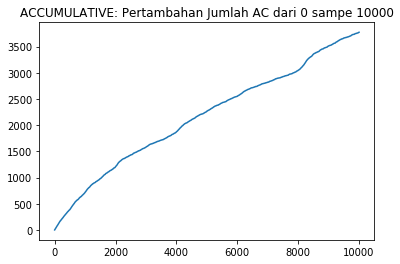

In [114]:
plt.plot(uwah)
plt.title("ACCUMULATIVE: Pertambahan Jumlah AC dari 0 sampe 10000")
plt.show()

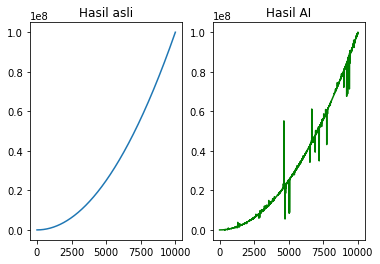

In [115]:
#RESULT VISUALIZATION
vis_angka = [i for i in range(jmlh)]
vis_hasil = [i**2 for i in vis_angka]

plt.subplot(1,2,1)
plt.title("Hasil asli")
plt.plot(vis_hasil)

vis_predict = [list_int_string_biner(string_biner(i)) for i in vis_angka]
ai_hasil = []
for k in md.predict(np.array(vis_predict)):
    ai_hasil.append(int_biner(stringto_int_biner(k)))

plt.subplot(1,2,2)
plt.title("Hasil AI")
plt.plot(ai_hasil, 'g')# 'g' = green line color in line plot

plt.show()

In [116]:
# saving AI to .json
md_json = md.to_json()
with open("MyAIgen3.json", 'w') as json_file:
    json_file.write(md_json)
# saving AI weights to .h5
md.save_weights("MyAIgen3.h5")
print("Saved model to disk")

Saved model to disk


In [117]:
#load json model
json_file = open("MyAIgen3.json", 'r')
md_load_from_json = json_file.read()
json_file.close()
md = model_from_json(md_load_from_json)
# load weights into the loaded model
md.load_weights("MyAIgen3.h5")
print("Loaded model from disk")

md.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#MyAIgen1 = ngaconya jauh tapi lebi bagus
#MyAIgen2 = gradiennya bagus tapi banyak hasil ngaco
#MyAIgen3 = train datanya shuffled, ngaconya lebi dikit

Loaded model from disk
